

---


**MÁSTER UNIVERSITARIO EN DATA ANALYTICS FOR BUSINESS** | **UPF Barcelona School of Management** | **Curso 2023-2024**

**Trabajo Final de Máster**

**Título del proyecto**: Vía Segura: Análisis de datos para la seguridad vial en Barcelona

**Script**: Análisis de la tipología de los vehículos

**Autores**: Joel Bullich Esquerra y Pablo García Prado

**Mentora**: Alexandra Abós Ortega


---




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import os
import random
from tabulate import tabulate
from matplotlib.patches import Patch
import plotly.graph_objs as go
import plotly.express as px

from google.colab import drive
drive.mount('/content/drive')

pd.set_option('display.max_columns', None)

Mounted at /content/drive


In [2]:
# Ruta del archivo
path = "/content/drive/MyDrive/TFM/clean_data/DatosTipoVehiculo.csv"

# Cargar el archivo en un DataFrame
df_tipovehiculo = pd.read_csv(path)

<ipython-input-2-9c189c5bf224>:5: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tipovehiculo = pd.read_csv(path)


In [3]:
df_tipovehiculo.shape

(118251, 23)

In [4]:
df_tipovehiculo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118251 entries, 0 to 118250
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Numero_expedient          118251 non-null  object 
 1   Codi_districte            118251 non-null  int64  
 2   Nom_districte             118251 non-null  object 
 3   Codi_barri                118251 non-null  int64  
 4   Nom_barri                 118251 non-null  object 
 5   Codi_carrer               118251 non-null  int64  
 6   Nom_carrer                118195 non-null  object 
 7   Num_postal                90312 non-null   object 
 8   Descripcio_dia_setmana    118251 non-null  object 
 9   Any                       118251 non-null  int64  
 10  Mes_any                   118251 non-null  int64  
 11  Dia_mes                   118251 non-null  int64  
 12  Hora_dia                  118251 non-null  int64  
 13  Descripcio_causa_vianant  118251 non-null  o

In [5]:
mapeo = {
    'Motocicleta':'Motocicleta',
    'Turismo': 'Automóvil',
    'Turisme': 'Automóvil',
    'Furgoneta': 'Vehículo Comercial',
    'Bicicleta': 'Bicicleta',
    'Ciclomotor': 'Motocicleta',
    'Taxi': 'Taxi',
    'Autobús': 'Autobús',
    'Veh. mobilitat personal amb motor': 'Vehículo_Personal_Motorizado',
    'Camió rígid <= 3,5 tones': 'Camión',
    'Camió rígid > 3,5 tones': 'Camión',
    'Autobús articulat': 'Autobús',
    'Autobús articulado': 'Autobús',
    'Tot terreny': 'Automóvil',
    'Todo terreno': 'Automóvil',
    'Camión <= 3,5 Tm': 'Camión',
    'Tractor camió': 'Camión',
    'Altres vehicles amb motor': 'Otros Vehículos Motorizados',
    'Desconegut': 'Desconocido',
    'Camión > 3,5 Tm': 'Camión',
    'Autocar':'Autobús',
    'Veh. mobilitat personal sense motor': 'Vehículo Personal No Motorizado',
    "Maquinària d'obres i serveis": 'Otros Vehículos Motorizados',
    'Ambulància': 'Ambulancia',
    'Tren o tramvia': 'Tren/Tranvía',
    'Tractocamión': 'Camión',
    'Altres vehicles sense motor': 'Otros Vehículos No Motorizados',
    'Otros vehíc. a motor': 'Otros Vehículos Motorizados',
    'Quadricicle < 75 cc': 'Motocicleta',
    'Tranvía o tren': 'Tren/Tranvía',
    'Autocaravana': 'Automóvil',
    'Pick-up': 'Vehículo Comercial',
    'Quadricicle > 75 cc': 'Motocicleta',
    'Microbús <= 17': 'Autobús',
    'Cuadriciclo <75cc': 'Motocicleta',
    'Carro': 'Otros Vehículos No Motorizados',
    'Cuadriciclo >=75cc': 'Motocicleta',
    'Maquinaria de obras': 'Otros Vehículos Motorizados',
    'Microbus <=17 plazas': 'Autobús',
    'Microbus <= 17': 'Autobús',
    'Tricicle': 'Bicicleta'
}
df_tipovehiculo['Descripcio_tipus_vehicle'] = df_tipovehiculo['Descripcio_tipus_vehicle'].map(mapeo)

In [6]:
mapeo={
    'B':'B',
    'BTP':'Otros',
    'A1':'A',
    'A2':'A',
    'A':'A',
    'AM':'A',
    'D':'Otros',
    'C':'Otros',
    'E C':'Otros',
    'D1':'Otros',
    'E D':'Otros',
    'B1':'Otros',
    'E C1':'Otros',
    'C1':'Otros',
    'E B':'Otros',
    'E D1':'Otros',
    'Es desconeix':'Otros',
    'Sense permís':'Otros',
    'Desconegut':'Otros',
    'Llicència':'Otros'
}
df_tipovehiculo['Descripcio_carnet'] = df_tipovehiculo['Descripcio_carnet'].map(mapeo)

In [7]:
#consideramos 74 el valor maximo aceptable
def categorizar_antiguedad_carnet(valor):
    if valor < 0:
        return 'Desconocido'
    elif valor <= 5:
        return 'AC_0-5'
    elif valor <= 10:
        return 'AC_5-10'
    elif valor <= 20:
        return 'AC_10-20'
    elif valor <= 30:
        return 'AC_20-30'
    elif valor <= 40:
        return 'AC_30-40'
    elif valor <= 50:
        return 'AC_40-50'
    elif valor <= 60:
        return 'AC_50-60'
    elif valor <=75:
      return 'AC_más de 60'
    else:
        return 'Desconocido'

df_tipovehiculo['Antiguitat_carnet'] = df_tipovehiculo['Antiguitat_carnet'].apply(categorizar_antiguedad_carnet)

## Funciones

In [8]:
def plotHorizontalBarplot(df, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    conteo = df[column].value_counts()
    conteo = conteo.sort_values(ascending=False)  # Ordenar en orden descendente

    total = len(df[column])  # Calcula el total de observaciones

    paleta = sns.color_palette("Blues", len(conteo))  # Usar la paleta Blues
    paleta.sort(reverse=False)
    ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y y para hacer un gráfico de barras horizontales

    for p in ax.patches:
        porcentaje = '{:.1f}%'.format(100 * p.get_width() / total)  # Calcula el porcentaje
        x = p.get_width()  # Posición x del texto
        y = p.get_y() + p.get_height() / 2  # Posición y del texto
        ax.annotate(porcentaje, (x, y), ha='left', va='center', fontsize=10)  # Anotación del porcentaje

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='x')  # Mostrar líneas de la cuadrícula solo en el eje x
    plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
    plt.show()

In [9]:
def plotHorizontalBarplot_TP_ByHorario(df, variable, horario_column, title, xlabel, ylabel):
    # Agrupar por 'variable' y 'Horario' y contar las ocurrencias
    conteo = df.groupby([variable, horario_column]).size().unstack()

    # Reordenar las columnas para que coincidan con el orden 'Matí', 'Tarda', 'Nit'
    conteo = conteo[['Matí', 'Tarda', 'Nit']]

    # Ordenar las barras por la suma de los valores de cada fila (es decir, por el total) en orden inverso
    conteo['Total'] = conteo.sum(axis=1)
    conteo = conteo.sort_values(by='Total', ascending=True).drop(columns='Total')

    # Definir colores para cada horario
    colores = {'Matí': 'green', 'Tarda': 'orange', 'Nit': 'navy'}

    # Gráfico de barras horizontales
    ax = conteo.plot(kind='barh', stacked=True, figsize=(10, 6), color=[colores[c] for c in conteo.columns])

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title='Horario')
    plt.grid(axis='x')  # Mostrar líneas de la cuadrícula solo en el eje x
    plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
    plt.show()

In [10]:
def plotGroupedBarplot_DescripcionTorn_DescripcionCausaVianant(df, distrito_column, causa_vianant_column, torn_column, title, xlabel, ylabel):
    # Filtrar el DataFrame por el distrito 'Eixample' y excluir 'No és causa del vianant'
    df_filtered = df[(df[distrito_column] == 'Eixample') & (df[causa_vianant_column] != 'No és causa del vianant')]

    # Agrupar por 'Descripcio_torn' y 'Descripcio_causa_vianant' y contar las ocurrencias
    conteo = df_filtered.groupby([torn_column, causa_vianant_column]).size().unstack()

    # Definir colores personalizados
    colores = {'Altres': 'orange', 'Creuar per fora pas de vianants': 'blue',
               'Desobeir el senyal del semàfor': 'green', 'Transitar a peu per la calçada': 'red',
               'Desobeir altres senyals': 'purple'}

    # Gráfico de barras agrupado
    ax = conteo.plot(kind='bar', stacked=False, figsize=(12, 8), color=[colores[col] for col in conteo.columns])

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para una mejor legibilidad
    plt.legend(title='Descripcio_causa_vianant', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [11]:
def plotHorizontalBarplot_CausaVianant_ByDiaSetmana(df, tipo_vianant1, tipo_vianant2, tipo_vianant3, distrito_column, dia_column, title, xlabel, ylabel):
    # Filtrar el DataFrame por los dos tipos de vehículo especificados
    df_filtered = df[(df['Descripcio_causa_vianant'] == tipo_vianant1) | (df['Descripcio_causa_vianant'] == tipo_vianant2) | (df['Descripcio_causa_vianant'] == tipo_vianant3)]

    # Agrupar por 'distrito', 'Descripcio_tipus_vehicle' y 'dia de la semana' y contar las ocurrencias
    conteo = df_filtered.groupby([distrito_column, 'Descripcio_causa_vianant', dia_column]).size().unstack()

    # Reemplazar los nombres de los días de la semana
    conteo = conteo.rename(columns={'Dilluns': 'Laborable', 'Dimarts': 'Laborable', 'Dimecres': 'Laborable',
                                    'Dijous': 'Laborable', 'Divendres': 'Laborable', 'Dissabte': 'Cap de setmana',
                                    'Diumenge': 'Cap de setmana'})

    # Crear un nuevo eje Y secundario
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Definir colores para las barras
    colores = {'Laborable': 'blue', 'Cap de setmana': 'orange'}

    # Graficar barras horizontales en el eje principal
    for label, color in colores.items():
        conteo[label].plot(kind='barh', stacked=True, ax=ax1, color=color, label=label)

    # Configurar el eje Y secundario con los valores de Descripcio_tipus_vehicle
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks([])
    ax2.set_xlabel('Descripcio_causa_vianant')

    legend_elements = [Patch(facecolor='blue', label='Laborable'), Patch(facecolor='orange', label='Cap de setmana')]
    ax1.legend(handles=legend_elements, title='Dia de la setmana')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='x')  # Mostrar líneas de la cuadrícula solo en el eje x
    plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
    plt.show()

In [12]:
def plotHorizontalBarplot_TipoVehiculo_ByHorario(df, tipo_vehiculo, distrito_column, horario_column, title, xlabel, ylabel):
    # Filtrar el DataFrame por un solo tipo de vehículo
    df_filtered = df[df['Descripcio_tipus_vehicle'] == tipo_vehiculo]

    # Agrupar por 'distrito' y 'horario' y contar las ocurrencias
    conteo = df_filtered.groupby([distrito_column, horario_column]).size().unstack()

    # Reordenar las columnas para que coincidan con el orden 'Matí', 'Tarda', 'Nit'
    conteo = conteo[['Matí', 'Tarda', 'Nit']]

    # Ordenar las barras por la suma de los valores de cada fila (es decir, por el total) en orden inverso
    conteo['Total'] = conteo.sum(axis=1)
    conteo = conteo.sort_values(by='Total', ascending=True).drop(columns='Total')

    # Definir colores para cada horario
    colores = {'Matí': 'green', 'Tarda': 'orange', 'Nit': 'navy'}

    # Gráfico de barras horizontales
    ax = conteo.plot(kind='barh', stacked=True, figsize=(10, 6), color=[colores[c] for c in conteo.columns])

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title='Horario')
    plt.grid(axis='x')  # Mostrar líneas de la cuadrícula solo en el eje x
    plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
    plt.show()

In [13]:
def plotHorizontalBarplot_TipoVehiculo2_ByHorario(df, tipo_vehiculo1, tipo_vehiculo2, distrito_column, horario_column, title, xlabel, ylabel):
    # Filtrar el DataFrame por dos tipos de vehículo
    df_filtered = df[(df['Descripcio_tipus_vehicle'] == tipo_vehiculo1) | (df['Descripcio_tipus_vehicle'] == tipo_vehiculo2)]

    # Agrupar por 'distrito' y 'horario' y contar las ocurrencias
    conteo = df_filtered.groupby([distrito_column, horario_column]).size().unstack()

    # Reordenar las columnas para que coincidan con el orden 'Matí', 'Tarda', 'Nit'
    conteo = conteo[['Matí', 'Tarda', 'Nit']]

    # Ordenar las barras por la suma de los valores de cada fila (es decir, por el total) en orden inverso
    conteo['Total'] = conteo.sum(axis=1)
    conteo = conteo.sort_values(by='Total', ascending=True).drop(columns='Total')

    # Definir colores para cada horario
    colores = {'Matí': 'green', 'Tarda': 'orange', 'Nit': 'navy'}

    # Gráfico de barras horizontales
    ax = conteo.plot(kind='barh', stacked=True, figsize=(10, 6), color=[colores[c] for c in conteo.columns])

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title='Horario')
    plt.grid(axis='x')  # Mostrar líneas de la cuadrícula solo en el eje x
    plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
    plt.show()


In [14]:
def plotHorizontalBarplot_TipoVehiculo2_EjeY_ByHorario(df, tipo_vehiculo1, tipo_vehiculo2, distrito_column, horario_column, title, xlabel, ylabel):
    # Filtrar el DataFrame por los dos tipos de vehículo especificados
    df_filtered = df[(df['Descripcio_tipus_vehicle'] == tipo_vehiculo1) | (df['Descripcio_tipus_vehicle'] == tipo_vehiculo2)]

    # Agrupar por 'distrito', 'Descripcio_tipus_vehicle' y 'horario' y contar las ocurrencias
    conteo = df_filtered.groupby([distrito_column, 'Descripcio_tipus_vehicle', horario_column]).size().unstack()

    # Reordenar las columnas para que coincidan con el orden 'Matí', 'Tarda', 'Nit'
    conteo = conteo[['Matí', 'Tarda', 'Nit']]

    # Crear un nuevo eje Y secundario
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Graficar barras horizontales en el eje principal
    conteo.plot(kind='barh', stacked=True, ax=ax1, color=['green', 'orange', 'navy'])

    # Configurar el eje Y secundario con los valores de Descripcio_tipus_vehicle
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks([])
    ax2.set_xlabel('Descripcio_tipus_vehicle')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='x')  # Mostrar líneas de la cuadrícula solo en el eje x
    plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
    plt.show()

In [15]:
def plotHorizontalBarplot_TipoVehiculo2_EjeY_ByDiaSetmana(df, tipo_vehiculo1, tipo_vehiculo2, distrito_column, dia_column, title, xlabel, ylabel):
    # Filtrar el DataFrame por los dos tipos de vehículo especificados
    df_filtered = df[(df['Descripcio_tipus_vehicle'] == tipo_vehiculo1) | (df['Descripcio_tipus_vehicle'] == tipo_vehiculo2)]

    # Agrupar por 'distrito', 'Descripcio_tipus_vehicle' y 'dia de la semana' y contar las ocurrencias
    conteo = df_filtered.groupby([distrito_column, 'Descripcio_tipus_vehicle', dia_column]).size().unstack()

    # Reemplazar los nombres de los días de la semana
    conteo = conteo.rename(columns={'Dilluns': 'Laborable', 'Dimarts': 'Laborable', 'Dimecres': 'Laborable',
                                    'Dijous': 'Laborable', 'Divendres': 'Laborable', 'Dissabte': 'Cap de setmana',
                                    'Diumenge': 'Cap de setmana'})

    # Crear un nuevo eje Y secundario
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Definir colores para las barras
    colores = {'Laborable': 'blue', 'Cap de setmana': 'orange'}

    # Graficar barras horizontales en el eje principal
    for label, color in colores.items():
        conteo[label].plot(kind='barh', stacked=True, ax=ax1, color=color, label=label)

    # Configurar el eje Y secundario con los valores de Descripcio_tipus_vehicle
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks([])
    ax2.set_xlabel('Descripcio_tipus_vehicle')

    legend_elements = [Patch(facecolor='blue', label='Laborable'), Patch(facecolor='orange', label='Cap de setmana')]
    ax1.legend(handles=legend_elements, title='Dia de la setmana')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='x')  # Mostrar líneas de la cuadrícula solo en el eje x
    plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
    plt.show()

In [16]:
def plotHorizontalBarplotByTipocarnet(df, variable, tipocarnet_column, title, xlabel, ylabel):
    # Agrupar por 'variable' y 'Horario' y contar las ocurrencias
    conteo = df.groupby([variable, tipocarnet_column]).size().unstack()

    # Reordenar las columnas para que coincidan con el orden 'Matí', 'Tarda', 'Nit'
    conteo = conteo[['A', 'B', 'Otros']]

    # Ordenar las barras por la suma de los valores de cada fila (es decir, por el total) en orden inverso
    conteo['Total'] = conteo.sum(axis=1)
    conteo = conteo.sort_values(by='Total', ascending=True).drop(columns='Total')

    # Definir colores para cada horario
    colores = {'A': 'green', 'B': 'blue', 'Otros': 'yellow'}

    # Gráfico de barras horizontales
    ax = conteo.plot(kind='barh', stacked=True, figsize=(10, 6), color=[colores[c] for c in conteo.columns])

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title='Tipo de Carnet')
    plt.grid(axis='x')  # Mostrar líneas de la cuadrícula solo en el eje x
    plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
    plt.show()

In [17]:
def plotHorizontalBarplot_top(df, column, title, xlabel, ylabel, num_barras):
    plt.figure(figsize=(10, 6))
    conteo = df[column].value_counts()
    conteo = conteo.sort_values(ascending=False)[:num_barras]  # Seleccionar solo las primeras 'num_barras' observaciones

    total = len(df[column])

    paleta = sns.color_palette("Blues", len(conteo))
    paleta.sort(reverse=False)
    ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)

    for p in ax.patches:
        porcentaje = '{:.1f}%'.format(100 * p.get_width() / total)
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax.annotate(porcentaje, (x, y), ha='left', va='center', fontsize=10)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

## Descripcio Causa Vianant

<ipython-input-8-e870d605bb35>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y y para hacer un gráfico de barras horizontales


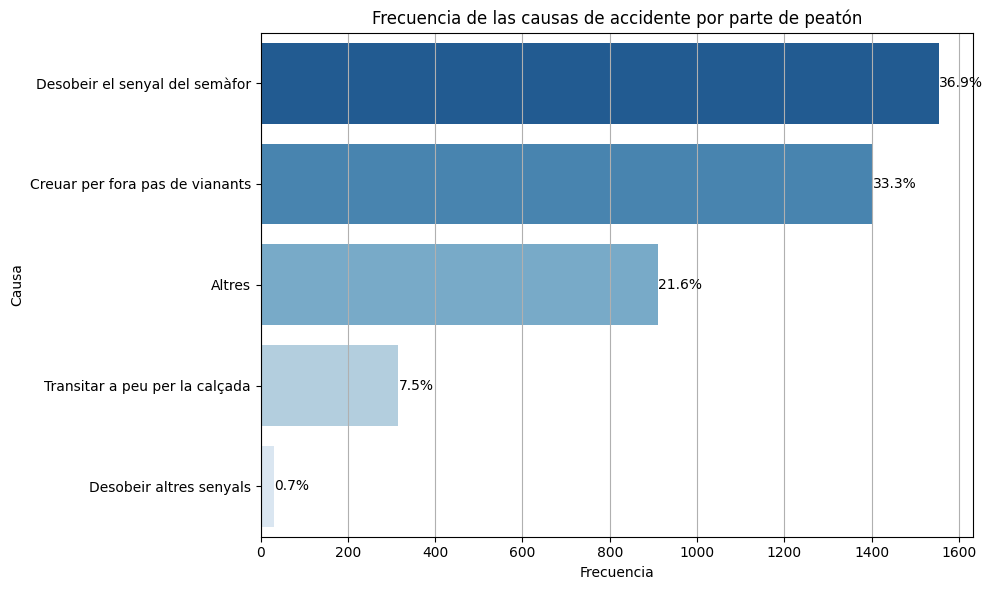

In [18]:
#excluimos cuando NO es culpa del peatón
df_descripcion_peaton_filtrado = df_tipovehiculo[df_tipovehiculo['Descripcio_causa_vianant'] != 'No és causa del  vianant']
plotHorizontalBarplot(df_descripcion_peaton_filtrado, 'Descripcio_causa_vianant', 'Frecuencia de las causas de accidente por parte de peatón', 'Frecuencia', 'Causa')

### Según turno

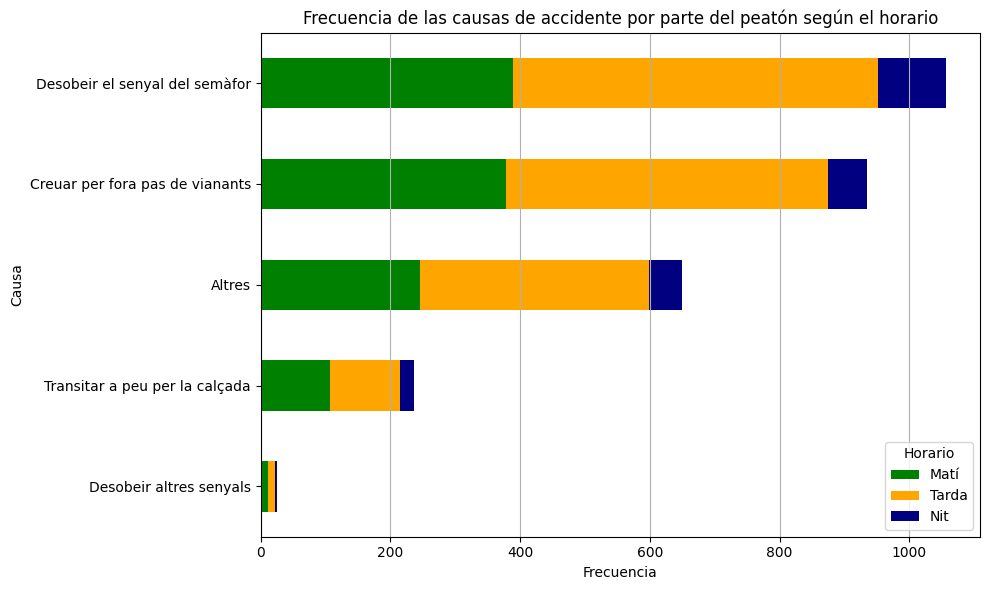

In [19]:
df_descripcion_peaton_filtrado = df_tipovehiculo[df_tipovehiculo['Descripcio_causa_vianant'] != 'No és causa del  vianant']
plotHorizontalBarplot_TP_ByHorario(df_descripcion_peaton_filtrado, 'Descripcio_causa_vianant', 'Descripcio_torn', 'Frecuencia de las causas de accidente por parte del peatón según el horario', 'Frecuencia', 'Causa')

### Según distrito

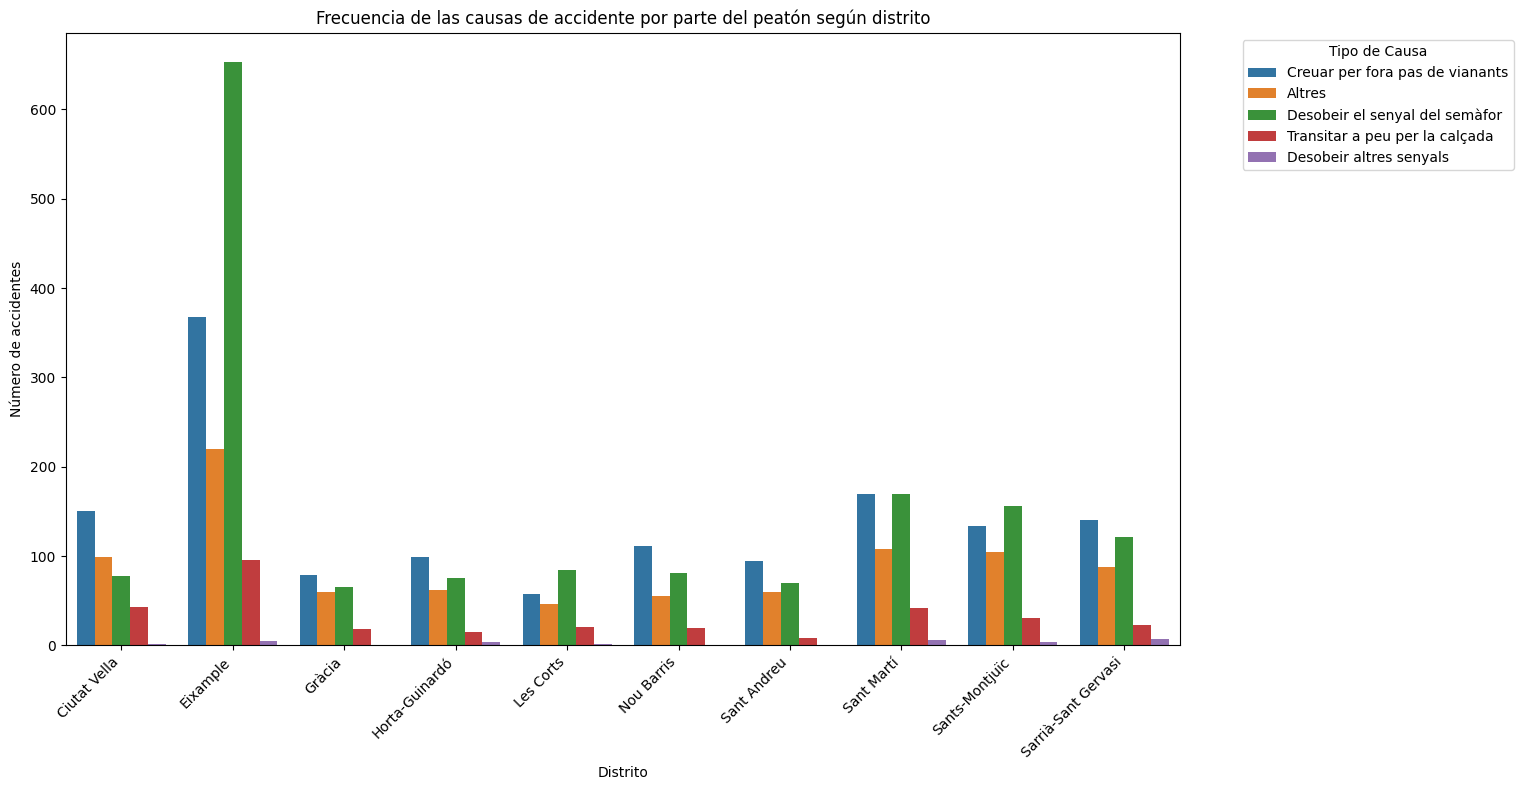

In [20]:
df_tipovehiculo_nomdistricte_descripcionpeaton_filtrado=df_tipovehiculo[(df_tipovehiculo['Nom_districte']!='Desconegut')&(df_tipovehiculo['Descripcio_causa_vianant']!='No és causa del  vianant')]
accidentes_por_distrito_descripcionpeaton = df_tipovehiculo_nomdistricte_descripcionpeaton_filtrado.groupby(['Nom_districte', 'Descripcio_causa_vianant']).size().reset_index(name='counts')
accidentes_por_distrito_descripcionpeaton_sorted = accidentes_por_distrito_descripcionpeaton.sort_values(by=['Nom_districte', 'counts'], ascending=[True, False])


plt.figure(figsize=(12, 8))
sns.barplot(x='Nom_districte', y='counts', hue='Descripcio_causa_vianant', data=accidentes_por_distrito_descripcionpeaton_sorted)
plt.title('Frecuencia de las causas de accidente por parte del peatón según distrito')
plt.xlabel('Distrito')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Tipo de Causa', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Observamos como en el Eixample se dan muchos más casos de accidentes donde no se ha respetado el semáforo, y en mayor proporción que en otros distritos. Vamos a analizar si hay algun patrón extraño que se repita por el hecho de ser el Eixample según cuando se produce el accidente.

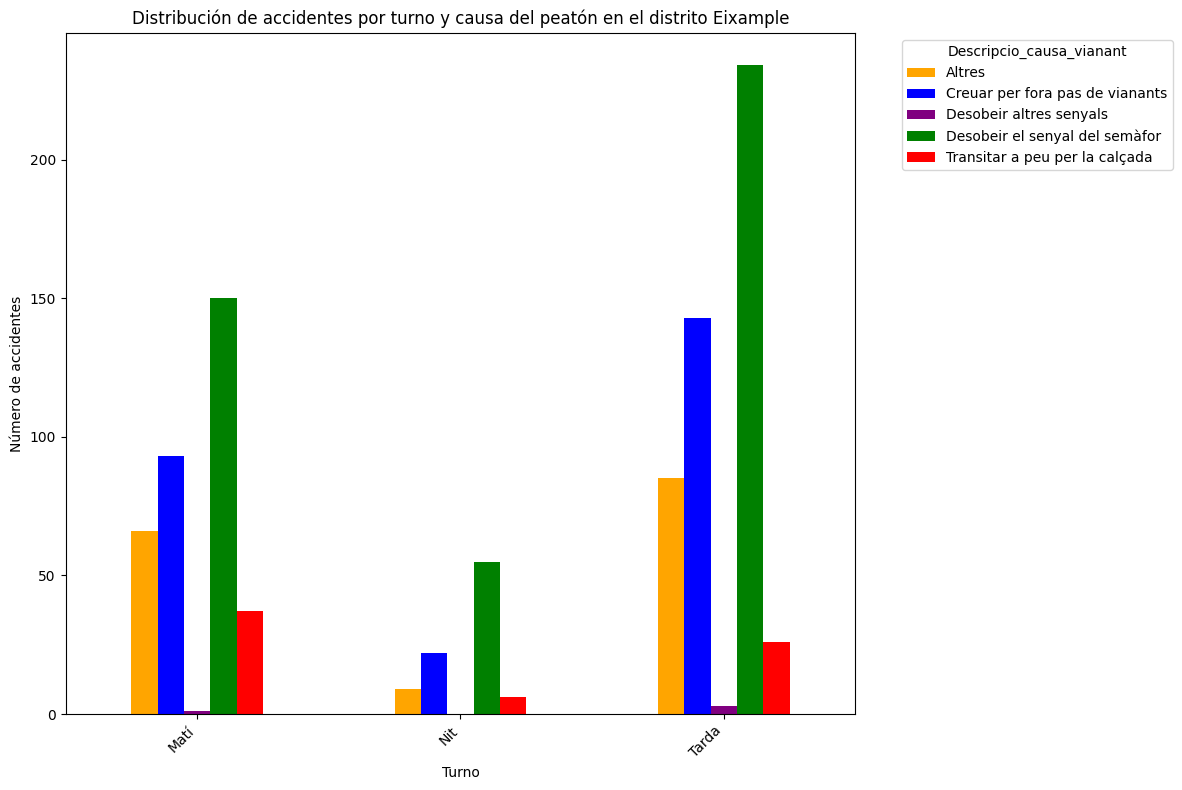

In [21]:
#empezamos viendo segun el turno
plotGroupedBarplot_DescripcionTorn_DescripcionCausaVianant(df_tipovehiculo_nomdistricte_descripcionpeaton_filtrado, 'Nom_districte', 'Descripcio_causa_vianant', 'Descripcio_torn',
                                                          'Distribución de accidentes por turno y causa del peatón en el distrito Eixample',
                                                          'Turno', 'Número de accidentes')

### Según dia de la semana

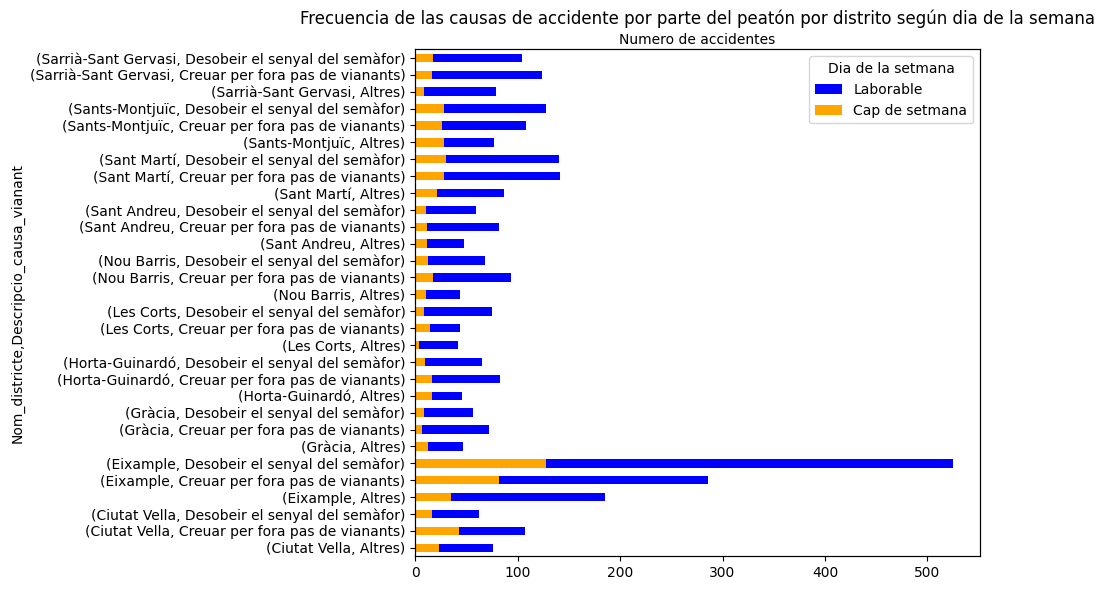

In [22]:
#podemos ver ahora segun el dia de la semana en que se producen: laborable o festivo en todos los distritos
plotHorizontalBarplot_CausaVianant_ByDiaSetmana(df_tipovehiculo_nomdistricte_descripcionpeaton_filtrado, 'Desobeir el senyal del semàfor', 'Creuar per fora pas de vianants', 'Altres',
                                                'Nom_districte', 'Descripcio_dia_setmana', 'Frecuencia de las causas de accidente por parte del peatón por distrito según dia de la semana',
                                                'Numero de accidentes', 'Distrito, Causa Peaton')

## Descripcio Tipus Vehicle

<ipython-input-8-e870d605bb35>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y y para hacer un gráfico de barras horizontales


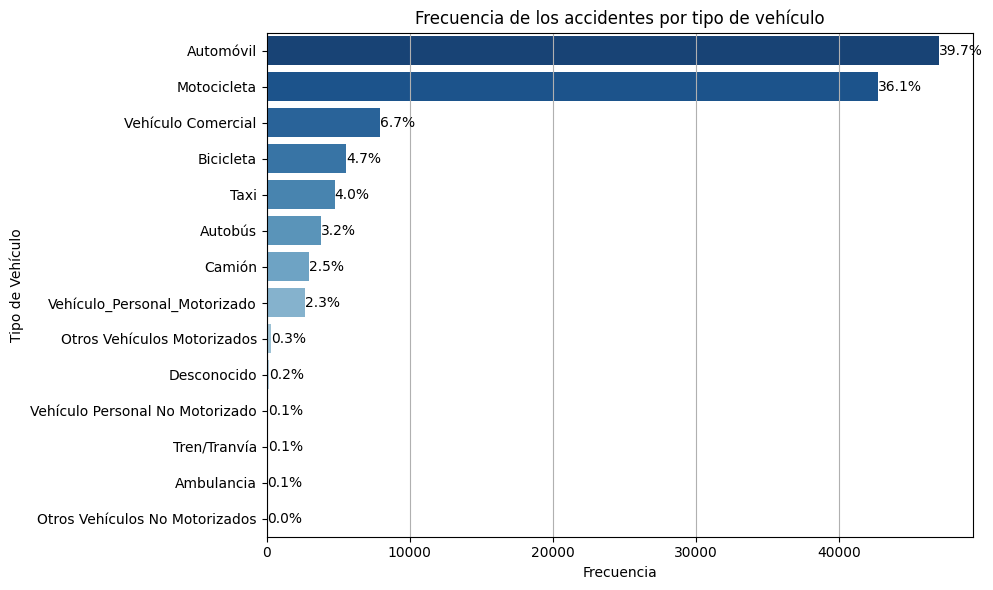

In [23]:
plotHorizontalBarplot(df_tipovehiculo, 'Descripcio_tipus_vehicle', 'Frecuencia de los accidentes por tipo de vehículo', 'Frecuencia', 'Tipo de Vehículo')

### Según turno

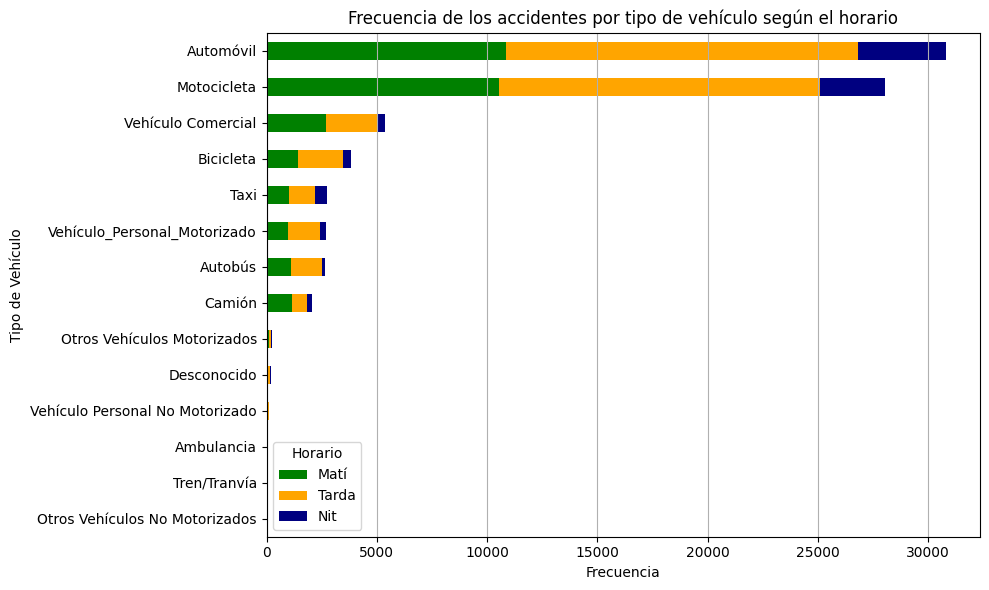

In [24]:
plotHorizontalBarplot_TP_ByHorario(df_tipovehiculo, 'Descripcio_tipus_vehicle', 'Descripcio_torn', 'Frecuencia de los accidentes por tipo de vehículo según el horario', 'Frecuencia', 'Tipo de Vehículo')

### Según distrito

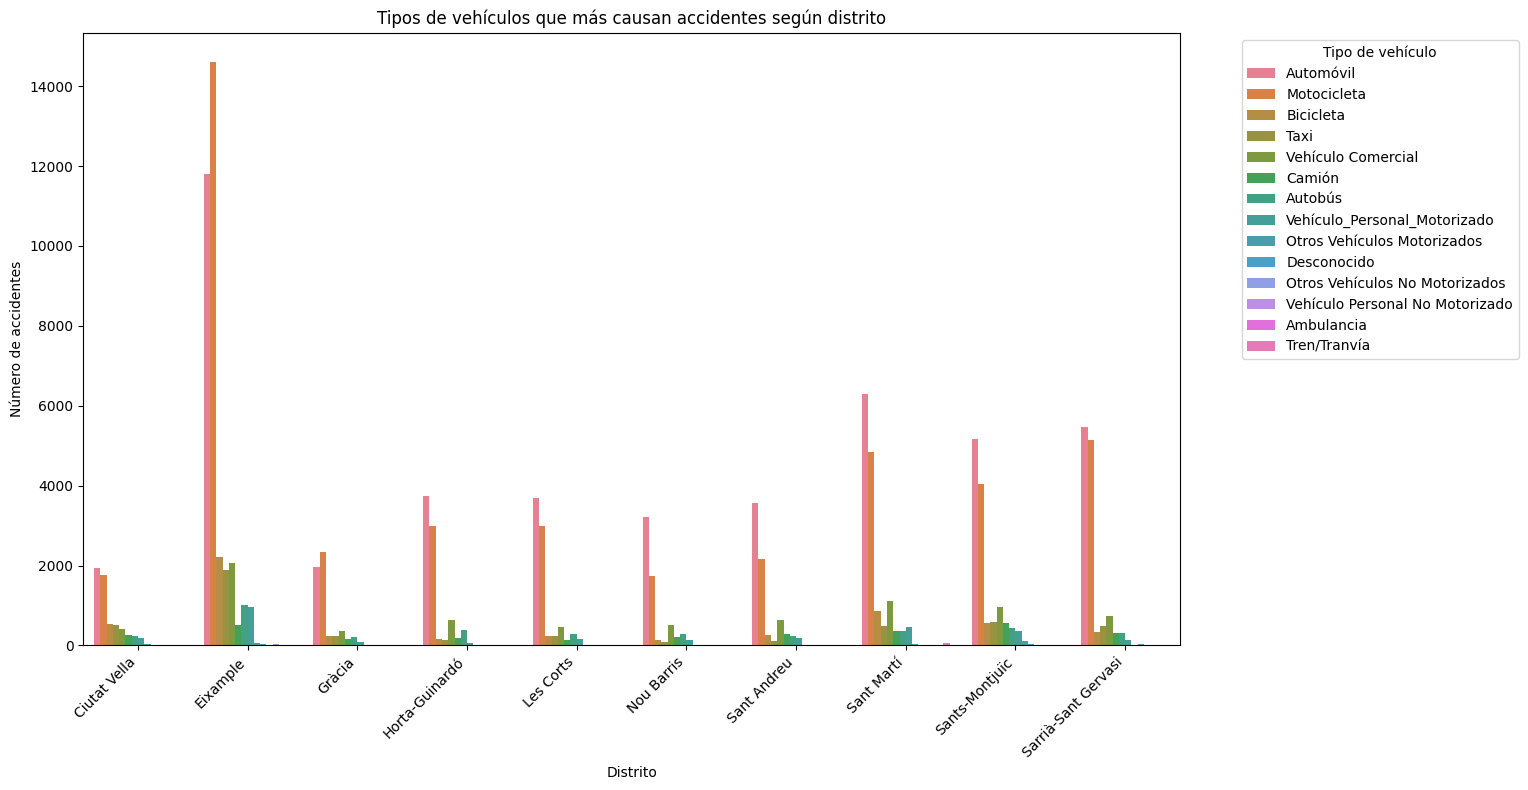

In [25]:
df_tipovehiculo_nomdistricte_filtrado=df_tipovehiculo[df_tipovehiculo['Nom_districte']!='Desconegut']
accidentes_por_distrito_vehiculo = df_tipovehiculo_nomdistricte_filtrado.groupby(['Nom_districte', 'Descripcio_tipus_vehicle']).size().reset_index(name='counts')
accidentes_por_distrito_vehiculo_sorted = accidentes_por_distrito_vehiculo.sort_values(by=['Nom_districte', 'counts'], ascending=[True, False])

plt.figure(figsize=(12, 8))
sns.barplot(x='Nom_districte', y='counts', hue='Descripcio_tipus_vehicle', data=accidentes_por_distrito_vehiculo_sorted)
plt.title('Tipos de vehículos que más causan accidentes según distrito')
plt.xlabel('Distrito')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Tipo de vehículo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Motos y Automóviles

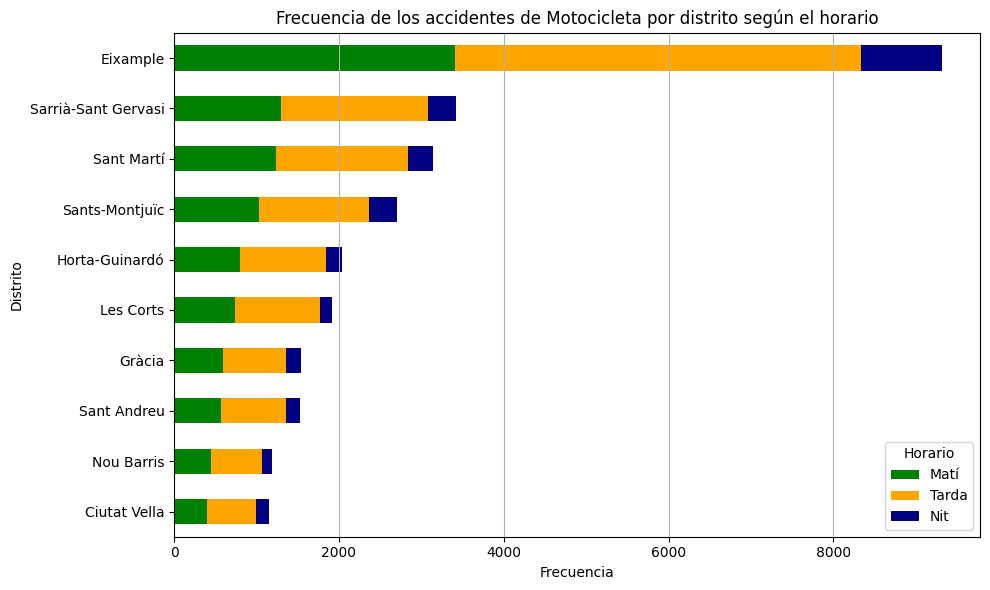

In [26]:
plotHorizontalBarplot_TipoVehiculo_ByHorario(df_tipovehiculo_nomdistricte_filtrado, 'Motocicleta','Nom_districte', 'Descripcio_torn', 'Frecuencia de los accidentes de Motocicleta por distrito según el horario', 'Frecuencia', 'Distrito')

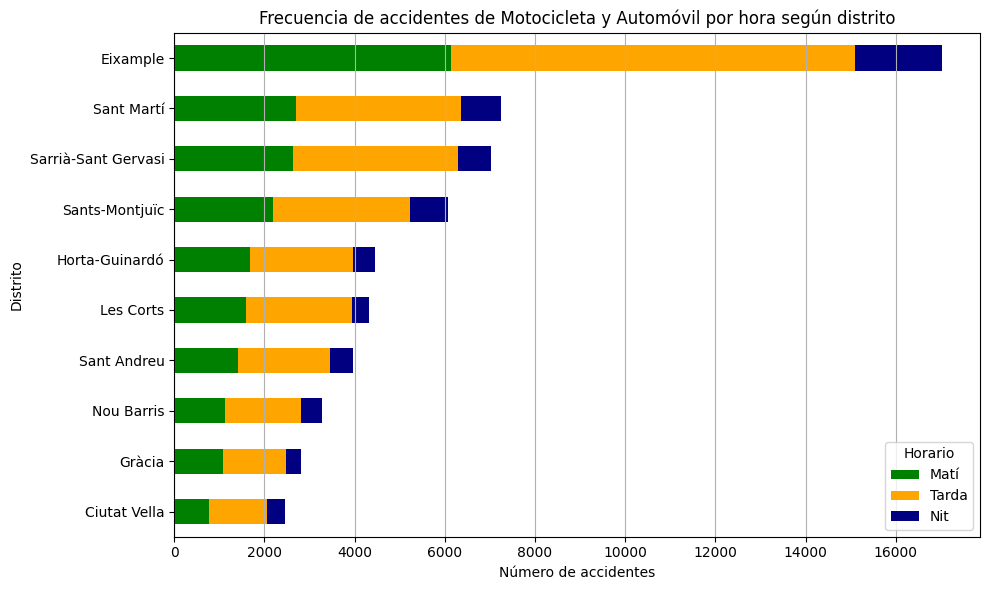

In [27]:
plotHorizontalBarplot_TipoVehiculo2_ByHorario(df_tipovehiculo_nomdistricte_filtrado, 'Motocicleta', 'Automóvil', 'Nom_districte', 'Descripcio_torn',
                                             'Frecuencia de accidentes de Motocicleta y Automóvil por hora según distrito',
                                             'Número de accidentes', 'Distrito')

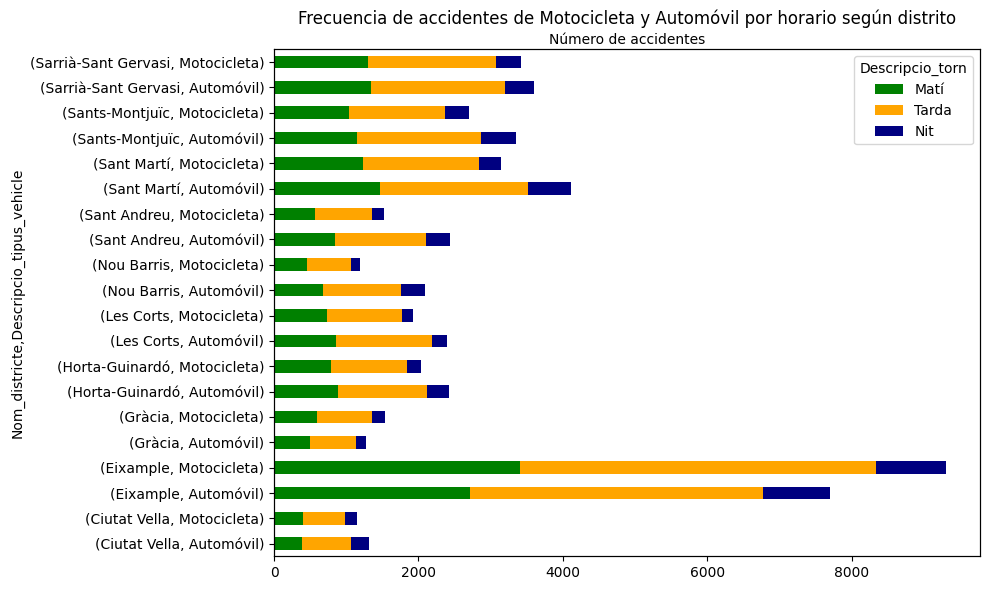

In [28]:
plotHorizontalBarplot_TipoVehiculo2_EjeY_ByHorario(df_tipovehiculo_nomdistricte_filtrado, 'Motocicleta', 'Automóvil', 'Nom_districte', 'Descripcio_torn',
                                             'Frecuencia de accidentes de Motocicleta y Automóvil por horario según distrito',
                                             'Número de accidentes', 'Distrito')

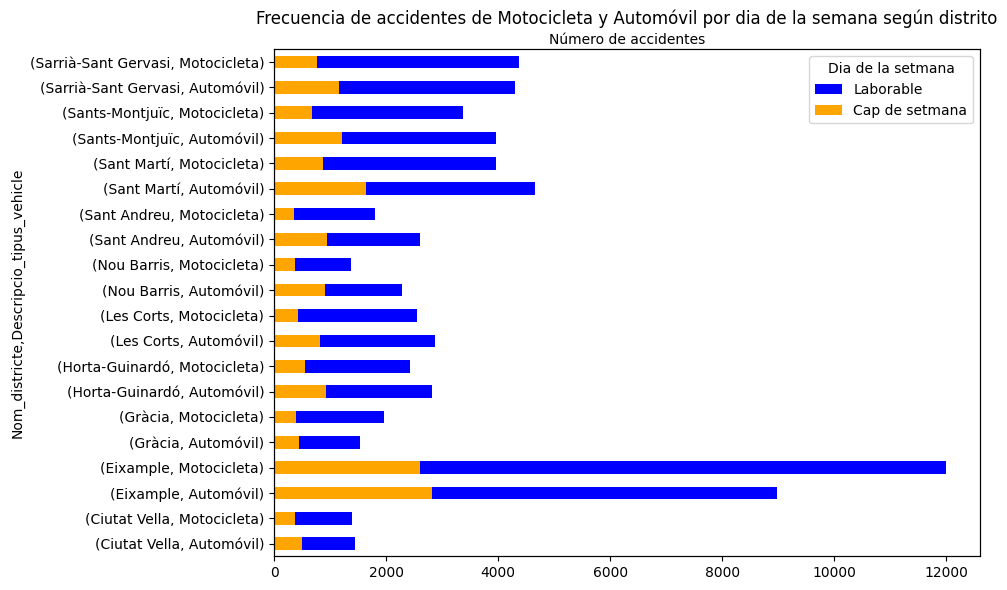

In [29]:
plotHorizontalBarplot_TipoVehiculo2_EjeY_ByDiaSetmana(df_tipovehiculo_nomdistricte_filtrado, 'Motocicleta', 'Automóvil', 'Nom_districte', 'Descripcio_dia_setmana',
                                             'Frecuencia de accidentes de Motocicleta y Automóvil por dia de la semana según distrito',
                                             'Número de accidentes', 'Distrito')

## Descripcio Model, Marca y Color

##*Análisis de las marcas de vehículos más frecuentes*

¿Cuál es el TOP 20 de  marcas de vehículos más implicados en los accidentes?

<ipython-input-17-02af5b907c9d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)


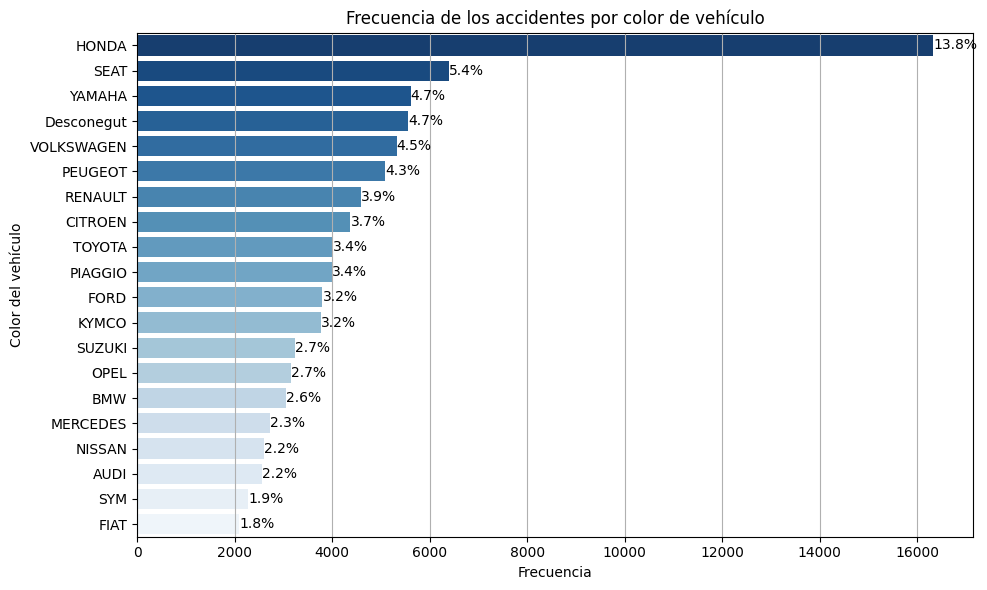

In [30]:
plotHorizontalBarplot_top(df_tipovehiculo, 'Descripcio_marca', 'Frecuencia de los accidentes por color de vehículo', 'Frecuencia', 'Color del vehículo', 20)

##*Análisis de los modelos de vehículos más frecuentes*

¿Cuál es el TOP 20 de modelos de vehículos más implicados en los accidentes?

<ipython-input-17-02af5b907c9d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)


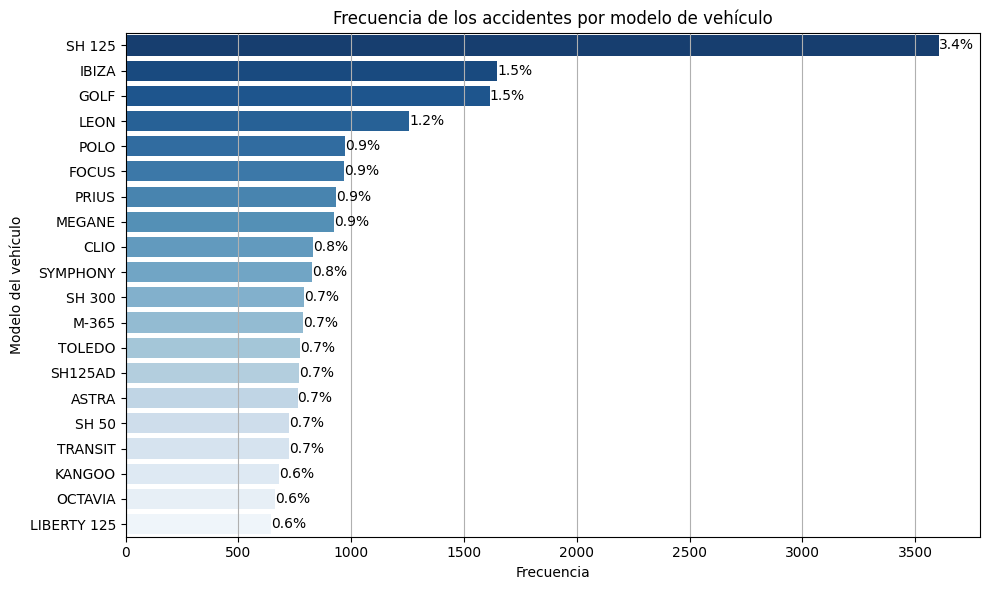

In [31]:
df_filtered = df_tipovehiculo[~df_tipovehiculo['Descripcio_model'].isin(['Desconegut', ' '])]
plotHorizontalBarplot_top(df_filtered, 'Descripcio_model', 'Frecuencia de los accidentes por modelo de vehículo', 'Frecuencia', 'Modelo del vehículo', 20)

¿Cuál es el TOP 10 de colores de vehículos más implicados en los accidentes?

<ipython-input-8-e870d605bb35>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y y para hacer un gráfico de barras horizontales


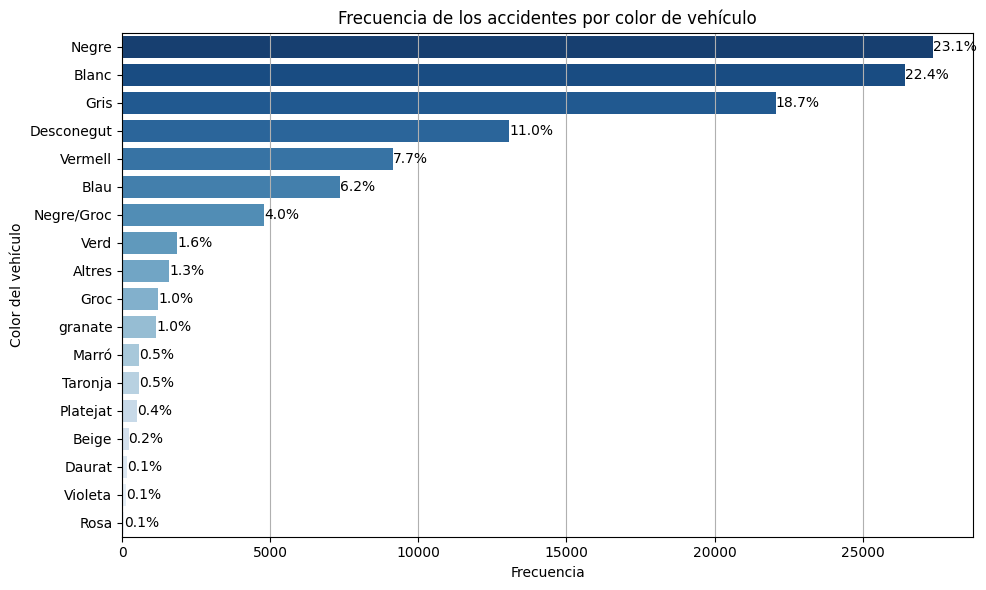

In [32]:
plotHorizontalBarplot(df_tipovehiculo, 'Descripcio_color', 'Frecuencia de los accidentes por color de vehículo', 'Frecuencia', 'Color del vehículo')

### Según turno

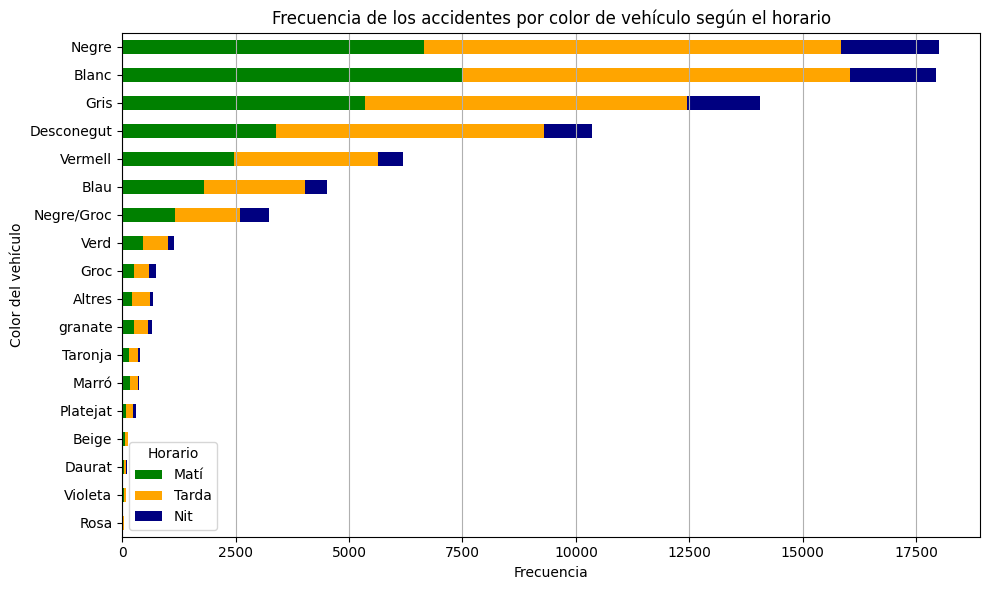

In [33]:
plotHorizontalBarplot_TP_ByHorario(df_tipovehiculo, 'Descripcio_color', 'Descripcio_torn', 'Frecuencia de los accidentes por color de vehículo según el horario', 'Frecuencia', 'Color del vehículo')

## Descripcio Carnet

<ipython-input-8-e870d605bb35>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y y para hacer un gráfico de barras horizontales


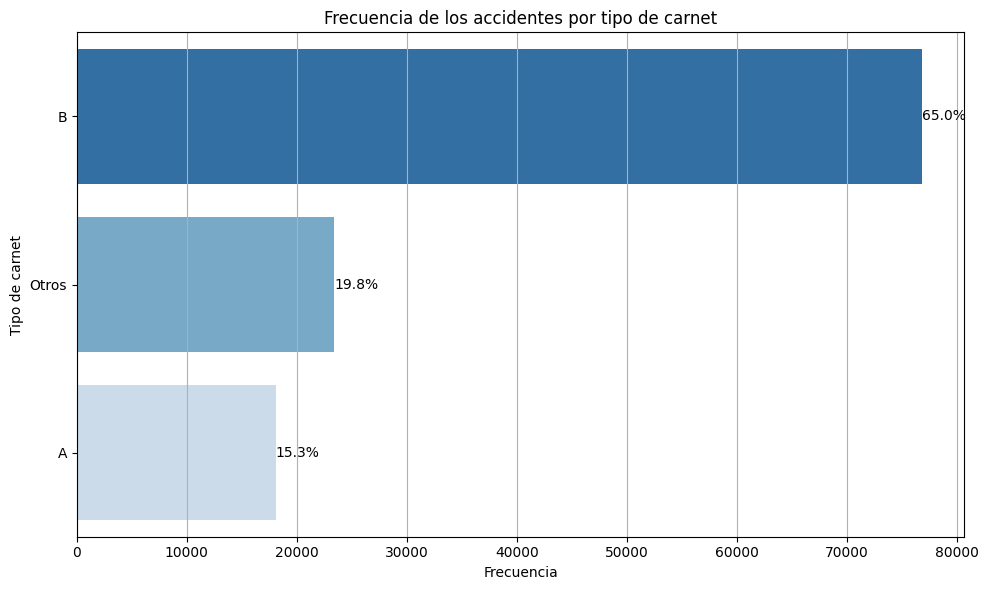

In [34]:
plotHorizontalBarplot(df_tipovehiculo, 'Descripcio_carnet', 'Frecuencia de los accidentes por tipo de carnet', 'Frecuencia', 'Tipo de carnet')

### Según turno

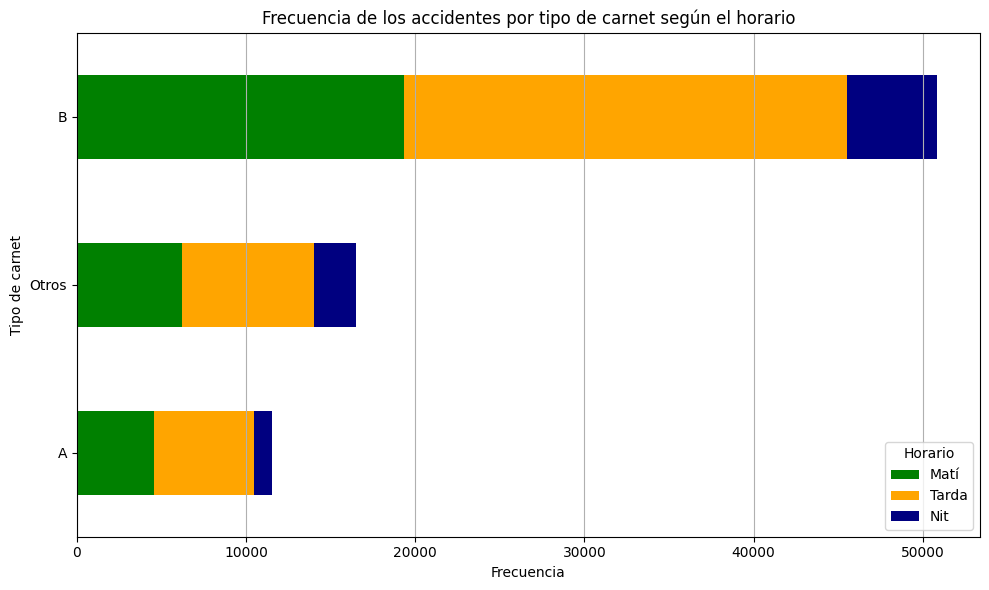

In [35]:
plotHorizontalBarplot_TP_ByHorario(df_tipovehiculo, 'Descripcio_carnet', 'Descripcio_torn', 'Frecuencia de los accidentes por tipo de carnet según el horario', 'Frecuencia', 'Tipo de carnet')

## Antiguitat Carnet

<ipython-input-8-e870d605bb35>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y y para hacer un gráfico de barras horizontales


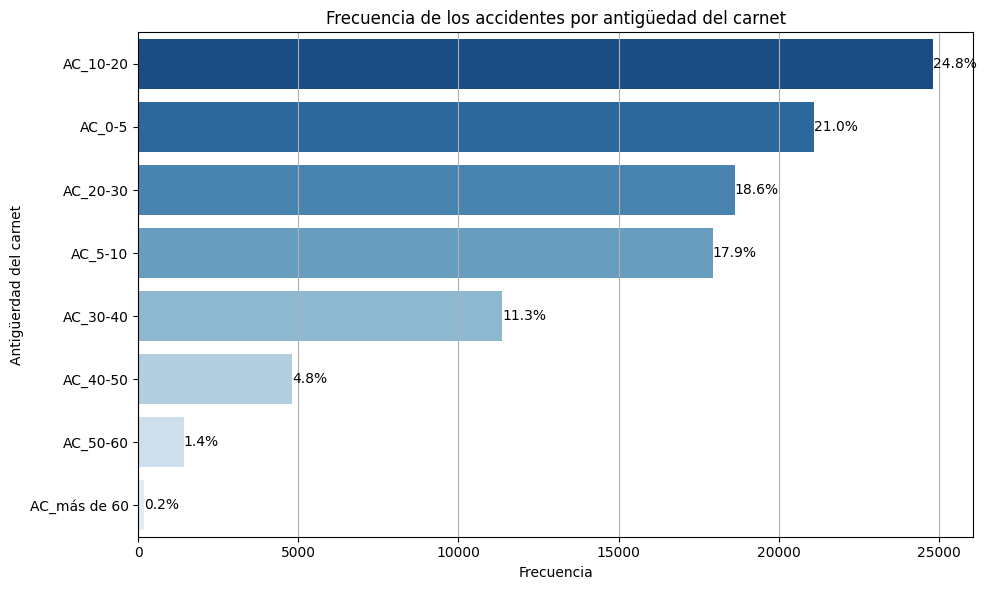

In [36]:
#excluimos los que tienen Antigüedad desconocida
df_antiguedad_carnet_filtrado = df_tipovehiculo[df_tipovehiculo['Antiguitat_carnet']!='Desconocido']
plotHorizontalBarplot(df_antiguedad_carnet_filtrado, 'Antiguitat_carnet', 'Frecuencia de los accidentes por antigüedad del carnet', 'Frecuencia', 'Antigüerdad del carnet')

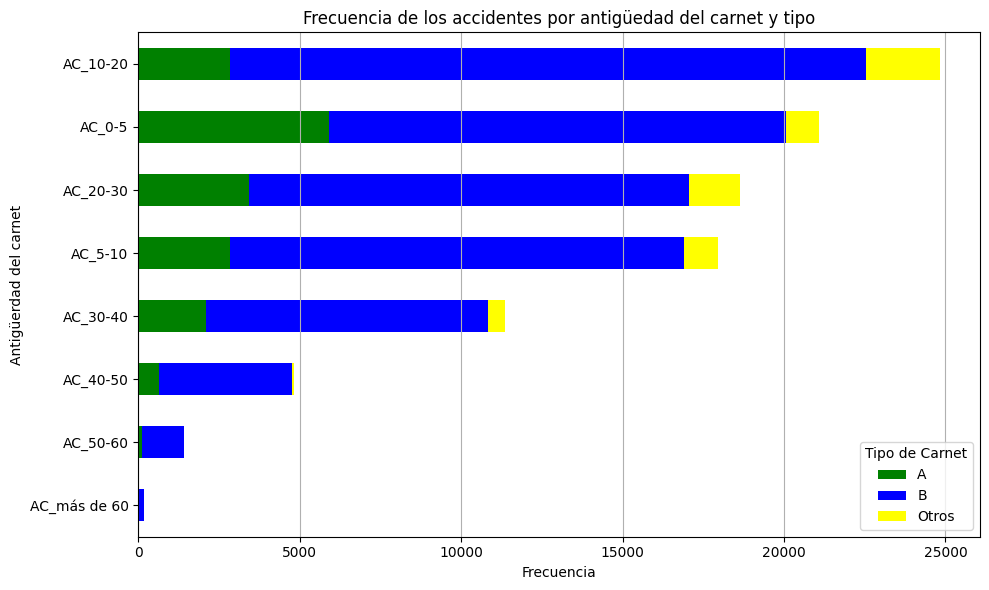

In [37]:
plotHorizontalBarplotByTipocarnet(df_antiguedad_carnet_filtrado, 'Antiguitat_carnet', 'Descripcio_carnet', 'Frecuencia de los accidentes por antigüedad del carnet y tipo', 'Frecuencia', 'Antigüerdad del carnet')

### Según turno

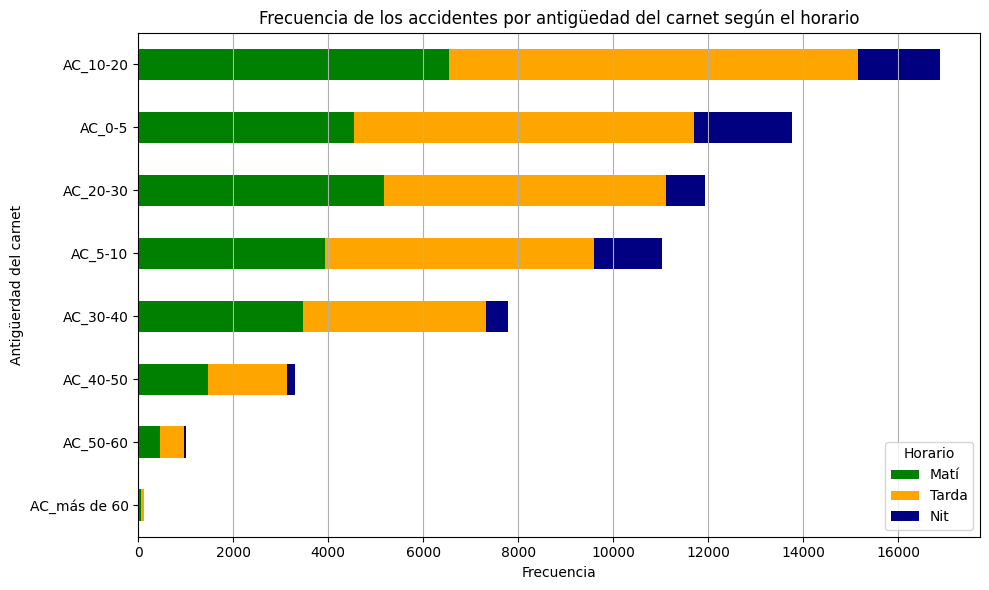

In [38]:
plotHorizontalBarplot_TP_ByHorario(df_antiguedad_carnet_filtrado, 'Antiguitat_carnet', 'Descripcio_torn', 'Frecuencia de los accidentes por antigüedad del carnet según el horario', 'Frecuencia', 'Antigüerdad del carnet')

## Evolución temporal

## Q&A

### ¿Hay algún tipo de vehículo mayormente implicado en los accidentes donde el peatón a cometido una infracción?

In [39]:
df_tipovehiculo['Descripcio_tipus_vehicle'].value_counts()

Descripcio_tipus_vehicle
Automóvil                          46979
Motocicleta                        42707
Vehículo Comercial                  7943
Bicicleta                           5536
Taxi                                4755
Autobús                             3791
Camión                              2998
Vehículo_Personal_Motorizado        2717
Otros Vehículos Motorizados          323
Desconocido                          191
Vehículo Personal No Motorizado      104
Tren/Tranvía                          90
Ambulancia                            72
Otros Vehículos No Motorizados        45
Name: count, dtype: int64

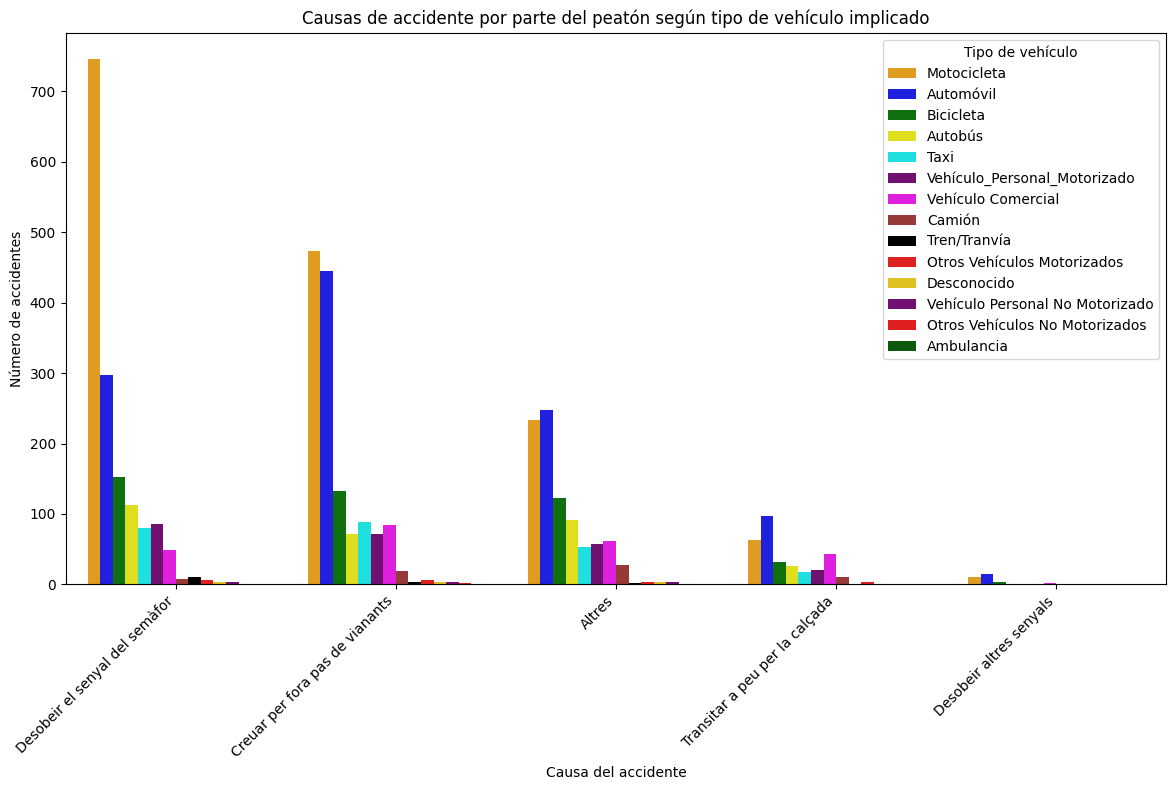

In [40]:
df_filtered = df_tipovehiculo[df_tipovehiculo['Descripcio_causa_vianant'] != 'No és causa del  vianant']
accidentes_por_causa_vehiculo = df_filtered.groupby(['Descripcio_causa_vianant', 'Descripcio_tipus_vehicle']).size().reset_index(name='counts')
accidentes_por_causa_vehiculo_sorted = accidentes_por_causa_vehiculo.sort_values(by='counts', ascending=False)

colores_vehiculo = {
    'Motocicleta': 'orange',
    'Automóvil': 'blue',
    'Bicicleta': 'green',
    'Otros Vehículos Motorizados': 'red',
    'Otros Vehículos No Motorizados':'red',
    'Vehículo_Personal_Motorizado': 'purple',
    'Vehículo Personal No Motorizado':'purple',
    'Autobús': 'yellow',
    'Tren/Tranvía':'black',
    'Ambulancia':'darkgreen',
    'Taxi': 'cyan',
    'Vehículo Comercial': 'magenta',
    'Camión': 'brown',
    'Desconocido':'gold',

}


plt.figure(figsize=(12, 8))
sns.barplot(x='Descripcio_causa_vianant', y='counts', hue='Descripcio_tipus_vehicle', data=accidentes_por_causa_vehiculo_sorted, palette=colores_vehiculo, dodge=True)
plt.title('Causas de accidente por parte del peatón según tipo de vehículo implicado')
plt.xlabel('Causa del accidente')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Tipo de vehículo')
plt.show()

### ¿Hay algún barrio donde se produzcan más accidentes por desobedecer las señales?

<ipython-input-41-4bcaf722d22b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y para hacer un gráfico de barras horizontales


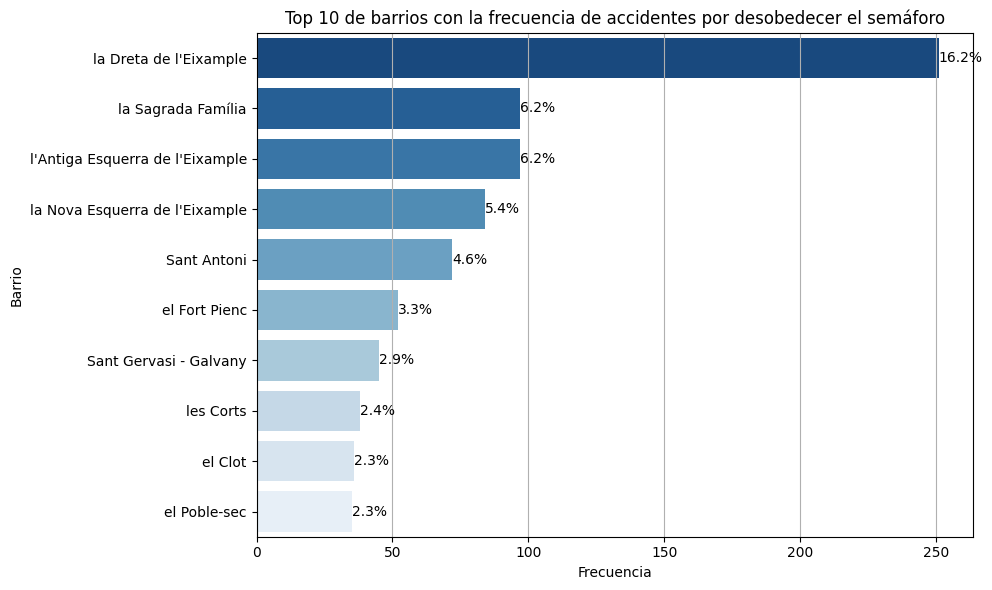

In [41]:
df_descripcion_peaton_filtrado_X = df_tipovehiculo[df_tipovehiculo['Descripcio_causa_vianant'] == 'Desobeir el senyal del semàfor']

def plotHorizontalBarplot_X(df, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    conteo = df[column].value_counts().head(10)  # Obtener el top 10 de valores
    conteo = conteo.sort_values(ascending=False)  # Ordenar en orden descendente

    total = len(df[column])  # Calcula el total de observaciones

    paleta = sns.color_palette("Blues", len(conteo))  # Usar la paleta Blues
    paleta.sort(reverse=False)

    ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y para hacer un gráfico de barras horizontales

    for p in ax.patches:
        porcentaje = '{:.1f}%'.format(100 * p.get_width() / total)  # Calcula el porcentaje
        x = p.get_width()  # Posición x del texto
        y = p.get_y() + p.get_height() / 2  # Posición y del texto
        ax.annotate(porcentaje, (x, y), ha='left', va='center', fontsize=10)  # Anotación del porcentaje

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='x')  # Mostrar líneas de la cuadrícula solo en el eje x
    plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
    plt.show()

plotHorizontalBarplot_X(df_descripcion_peaton_filtrado_X, 'Nom_barri', 'Top 10 de barrios con la frecuencia de accidentes por desobedecer el semáforo', 'Frecuencia', 'Barrio')

<ipython-input-41-4bcaf722d22b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y para hacer un gráfico de barras horizontales


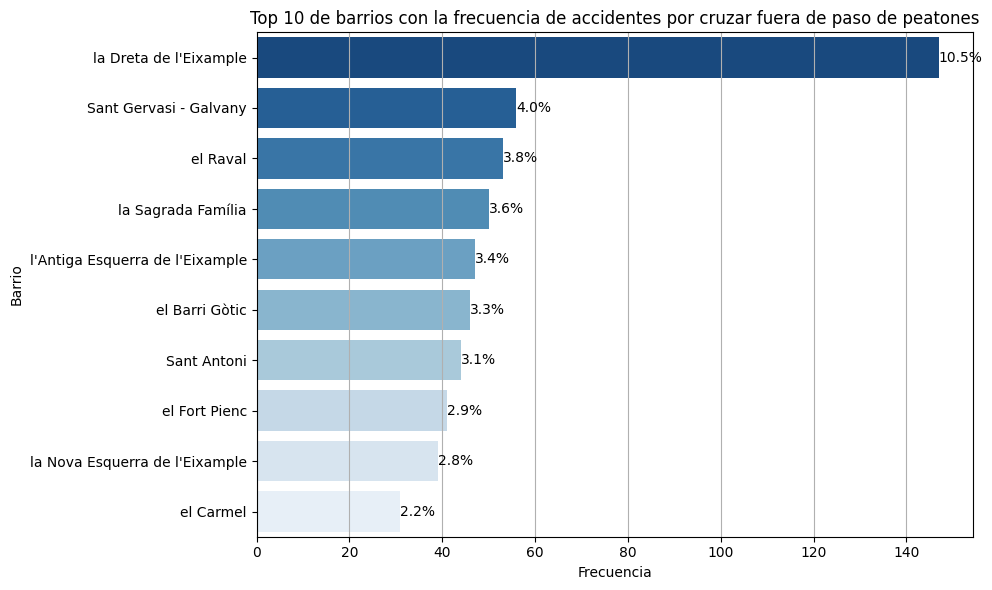

In [42]:
df_descripcion_peaton_filtrado_Y = df_tipovehiculo[df_tipovehiculo['Descripcio_causa_vianant'] == 'Creuar per fora pas de vianants']
plotHorizontalBarplot_X(df_descripcion_peaton_filtrado_Y, 'Nom_barri', 'Top 10 de barrios con la frecuencia de accidentes por cruzar fuera de paso de peatones', 'Frecuencia', 'Barrio')


<ipython-input-41-4bcaf722d22b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.values, y=conteo.index, palette=paleta)  # Intercambiar x y para hacer un gráfico de barras horizontales


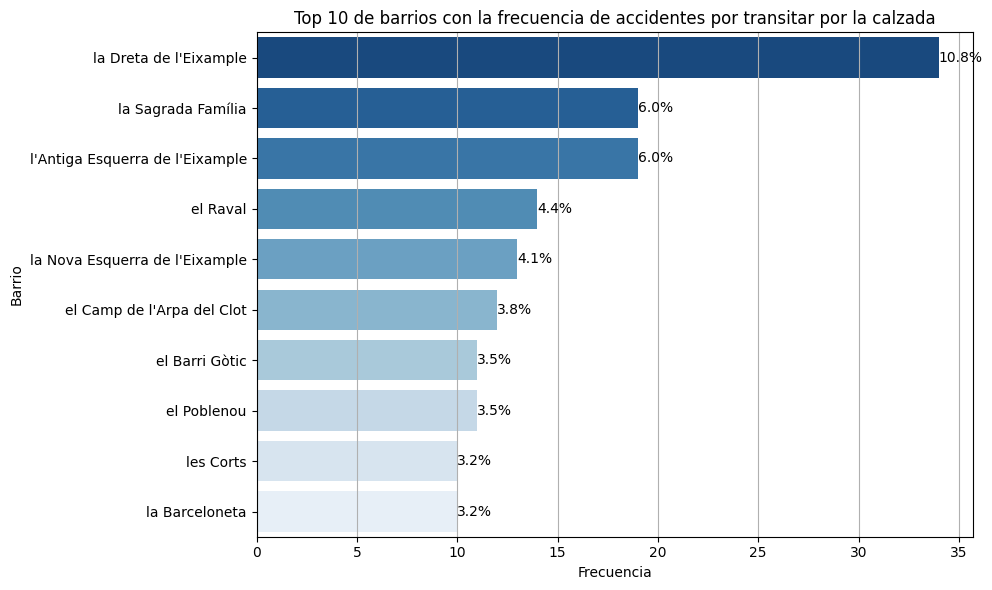

In [43]:
df_descripcion_peaton_filtrado_Z = df_tipovehiculo[df_tipovehiculo['Descripcio_causa_vianant'] == 'Transitar a peu per la calçada']
plotHorizontalBarplot_X(df_descripcion_peaton_filtrado_Z, 'Nom_barri', 'Top 10 de barrios con la frecuencia de accidentes por transitar por la calzada', 'Frecuencia', 'Barrio')

Parece ser que la dreta de l'eixample es el barrio que concentra más siniestralidad que viene dada por causa del peatón.

###*¿Cómo ha evolucionado temporalmente los accidentes en moto?*

In [44]:
df_tipovehiculo_nomdistricte_filtrado=df_tipovehiculo[df_tipovehiculo['Nom_districte']!='Desconegut']
df_tipovehiculo_motos_distrito = df_tipovehiculo_nomdistricte_filtrado[df_tipovehiculo_nomdistricte_filtrado['Descripcio_tipus_vehicle'] == 'Motocicleta']
df_tipovehiculo_motos_distrito_y_anyo = df_tipovehiculo_motos_distrito.groupby(['Any', 'Nom_districte']).size().reset_index(name='counts')

fig = px.line(df_tipovehiculo_motos_distrito_y_anyo, x='Any', y='counts', color='Nom_districte',
              title='Evolución de accidentes en moto por distrito',
              labels={'Any': 'Año', 'counts': 'Número de accidentes',
                      'Nom_districte': 'Distrito'})


fig.update_layout(xaxis_tickangle=-45, legend=dict(x=1.1, y=1.05))


fig.show()

In [45]:
df_tipovehiculo_eixample_filtrado=df_tipovehiculo[df_tipovehiculo['Nom_districte']=='Eixample']
df_tipovehiculo_motos_barrio = df_tipovehiculo_eixample_filtrado[df_tipovehiculo_eixample_filtrado['Descripcio_tipus_vehicle'] == 'Motocicleta']
df_tipovehiculo_motos_barrio_y_anyo = df_tipovehiculo_motos_barrio.groupby(['Any', 'Nom_barri']).size().reset_index(name='counts')

fig = px.line(df_tipovehiculo_motos_barrio_y_anyo, x='Any', y='counts', color='Nom_barri',
              title='Evolución de accidentes en moto en el Eixample por barrio',
              labels={'Any': 'Año', 'counts': 'Número de accidentes',
                      'Nom_barri': 'Barrio'})


fig.update_layout(xaxis_tickangle=-45, legend=dict(x=1.1, y=1.05))


fig.show()

### *¿Cómo han evolucionado temporalmente los accidentes en bicicleta?*

In [46]:
df_tipovehiculo_nomdistricte_filtrado=df_tipovehiculo[df_tipovehiculo['Nom_districte']!='Desconegut']
df_tipovehiculo_bicis_distrito = df_tipovehiculo_nomdistricte_filtrado[df_tipovehiculo_nomdistricte_filtrado['Descripcio_tipus_vehicle'] == 'Bicicleta']
df_tipovehiculo_bicis_distrito_y_anyo = df_tipovehiculo_bicis_distrito.groupby(['Any', 'Nom_districte']).size().reset_index(name='counts')

fig = px.line(df_tipovehiculo_bicis_distrito_y_anyo, x='Any', y='counts', color='Nom_districte',
              title='Evolución de accidentes en bicicleta por distrito',
              labels={'Any': 'Año', 'counts': 'Número de accidentes',
                      'Nom_districte': 'Distrito'})


fig.update_layout(xaxis_tickangle=-45, legend=dict(x=1.1, y=1.05))


fig.show()

In [47]:
df_tipovehiculo_eixample_filtrado=df_tipovehiculo[df_tipovehiculo['Nom_districte']=='Eixample']
df_tipovehiculo_bici_barrio = df_tipovehiculo_eixample_filtrado[df_tipovehiculo_eixample_filtrado['Descripcio_tipus_vehicle'] == 'Bicicleta']
df_tipovehiculo_bici_barrio_y_anyo = df_tipovehiculo_bici_barrio.groupby(['Any', 'Nom_barri']).size().reset_index(name='counts')

fig = px.line(df_tipovehiculo_bici_barrio_y_anyo, x='Any', y='counts', color='Nom_barri',
              title='Evolución de accidentes en bici en el Eixample por barrio',
              labels={'Any': 'Año', 'counts': 'Número de accidentes',
                      'Nom_barri': 'Barrio'})


fig.update_layout(xaxis_tickangle=-45, legend=dict(x=1.1, y=1.05))


fig.show()

In [48]:
df_tipovehiculo_eixample_filtrado=df_tipovehiculo[df_tipovehiculo['Nom_districte']=='Eixample']
df_tipovehiculo_bici_calle = df_tipovehiculo_eixample_filtrado[df_tipovehiculo_eixample_filtrado['Descripcio_tipus_vehicle'] == 'Bicicleta']
df_tipovehiculo_bici_calle_y_anyo = df_tipovehiculo_bici_calle.groupby(['Any', 'Nom_carrer']).size().reset_index(name='counts')

fig = px.line(df_tipovehiculo_bici_calle_y_anyo, x='Any', y='counts', color='Nom_carrer',
              title='Evolución de accidentes en bici en el Eixample por calle',
              labels={'Any': 'Año', 'counts': 'Número de accidentes',
                      'Nom_carrer': 'Calle'})


fig.update_layout(xaxis_tickangle=-45, legend=dict(x=1.1, y=1.05))


fig.show()

In [49]:
#ahora para el TOP 10 calles

df_tipovehiculo_eixample_bici = df_tipovehiculo[(df_tipovehiculo['Nom_districte'] == 'Eixample') & (df_tipovehiculo['Descripcio_tipus_vehicle'] == 'Bicicleta')]
df_tipovehiculo_eixample_bici_por_calle = df_tipovehiculo_eixample_bici.groupby(['Any', 'Nom_carrer']).size().reset_index(name='counts')
top_10_calles = df_tipovehiculo_eixample_bici_por_calle.groupby('Nom_carrer')['counts'].sum().nlargest(10).index
df_top_10_calles = df_tipovehiculo_eixample_bici_por_calle[df_tipovehiculo_eixample_bici_por_calle['Nom_carrer'].isin(top_10_calles)]


fig = px.line(df_top_10_calles, x='Any', y='counts', color='Nom_carrer',
              title='Evolución de accidentes en bicicleta en el Eixample por calle',
              labels={'Any': 'Año', 'counts': 'Número de accidentes',
                      'Nom_carrer': 'Calle'})


fig.update_layout(xaxis_tickangle=-45, legend=dict(x=1.1, y=1.05))


fig.show()

In [50]:
df_tipovehiculo_eixample_santantoni_bici = df_tipovehiculo[(df_tipovehiculo['Nom_districte'] == 'Eixample') & (df_tipovehiculo['Descripcio_tipus_vehicle'] == 'Bicicleta')&(df_tipovehiculo['Nom_barri']=='Sant Antoni')]
df_tipovehiculo_eixample_santantoni_bici_por_calle = df_tipovehiculo_eixample_santantoni_bici.groupby(['Any', 'Nom_carrer']).size().reset_index(name='counts')
top_10_calles_santantoni = df_tipovehiculo_eixample_santantoni_bici_por_calle.groupby('Nom_carrer')['counts'].sum().nlargest(10).index
df_top_10_calles_santantoni = df_tipovehiculo_eixample_santantoni_bici_por_calle[df_tipovehiculo_eixample_santantoni_bici_por_calle['Nom_carrer'].isin(top_10_calles)]


fig = px.line(df_top_10_calles_santantoni, x='Any', y='counts', color='Nom_carrer',
              title='Evolución de accidentes en bicicleta en el Eixample (barrio Sant Antoni) por calle',
              labels={'Any': 'Año', 'counts': 'Número de accidentes',
                      'Nom_carrer': 'Calle'})


fig.update_layout(xaxis_tickangle=-45, legend=dict(x=1.1, y=1.05))


fig.show()


Sería interesante ver cuáles son las calles que más han sufrido una evolución en la frecuencia de accidentes en bici en el Eixample.

Para ello, calcularemos el TOP 5 de calles con una mayor frecuencia acumulada de accidentes y el TOP 5 con una menor frecuencia. El cálculo a realizar consistirá en hacer la diferencia año a año de conteo de accidentes respecto el año anterior en cada calle, para sumar al final todas estas diferencias y sacar el valor de Diferencia Acumulada.

Este cáclulo nos parece que tiene más significancia que hacer una simple diferencia entre el último y el primer año de la serie para cada calle

### *¿Cómo han evolucionado temporalmente los accidentes en patinete?*

In [51]:
df_tipovehiculo.Descripcio_tipus_vehicle.value_counts()

Descripcio_tipus_vehicle
Automóvil                          46979
Motocicleta                        42707
Vehículo Comercial                  7943
Bicicleta                           5536
Taxi                                4755
Autobús                             3791
Camión                              2998
Vehículo_Personal_Motorizado        2717
Otros Vehículos Motorizados          323
Desconocido                          191
Vehículo Personal No Motorizado      104
Tren/Tranvía                          90
Ambulancia                            72
Otros Vehículos No Motorizados        45
Name: count, dtype: int64

In [52]:
df_tipovehiculo_nomdistricte_filtrado = df_tipovehiculo[df_tipovehiculo['Nom_districte'] != 'Desconegut']
df_tipovehiculo_patinetes_distrito = df_tipovehiculo_nomdistricte_filtrado[df_tipovehiculo_nomdistricte_filtrado['Descripcio_tipus_vehicle'] == 'Vehículo_Personal_Motorizado']

#
years_of_interest = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
df_tipovehiculo_patinetes_distrito = df_tipovehiculo_patinetes_distrito[df_tipovehiculo_patinetes_distrito['Any'].isin(years_of_interest)]

df_tipovehiculo_patinetes_distrito_y_anyo = df_tipovehiculo_patinetes_distrito.groupby(['Any', 'Nom_districte']).size().reset_index(name='counts')

# con esto se crea todas las combinaciones posibles de años y distritos
all_combinations = pd.MultiIndex.from_product([years_of_interest, df_tipovehiculo_patinetes_distrito['Nom_districte'].unique()], names=['Any', 'Nom_districte'])
df_all_combinations = pd.DataFrame(index=all_combinations).reset_index()

# unimos el DataFrame de todas las combinaciones con el DataFrame original
df_tipovehiculo_patinetes_distrito_y_anyo_full = pd.merge(df_all_combinations, df_tipovehiculo_patinetes_distrito_y_anyo, on=['Any', 'Nom_districte'], how='left')
df_tipovehiculo_patinetes_distrito_y_anyo_full['counts'].fillna(0, inplace=True)

#grafico
fig = px.line(df_tipovehiculo_patinetes_distrito_y_anyo_full, x='Any', y='counts', color='Nom_districte',
              title='Evolución de accidentes en patinete por distrito',
              labels={'Any': 'Año', 'counts': 'Número de accidentes', 'Nom_districte': 'Distrito'})

fig.update_layout(
    xaxis_tickangle=-45,
    legend=dict(x=1.1, y=1.05),
    xaxis=dict(
        tickmode='array',
        tickvals=years_of_interest,
        ticktext=[str(year) for year in years_of_interest]
    )
)

fig.show()

In [53]:
df_tipovehiculo_eixample_filtrado = df_tipovehiculo[df_tipovehiculo['Nom_districte'] == 'Eixample']
df_tipovehiculo_patinetes_barrio = df_tipovehiculo_eixample_filtrado[df_tipovehiculo_eixample_filtrado['Descripcio_tipus_vehicle'] == 'Vehículo_Personal_Motorizado']

#
years_of_interest = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
df_tipovehiculo_patinetes_barrio = df_tipovehiculo_patinetes_barrio[df_tipovehiculo_patinetes_barrio['Any'].isin(years_of_interest)]

df_tipovehiculo_patinetes_barrio_y_anyo = df_tipovehiculo_patinetes_barrio.groupby(['Any', 'Nom_barri']).size().reset_index(name='counts')

#
all_combinations = pd.MultiIndex.from_product([years_of_interest, df_tipovehiculo_patinetes_barrio['Nom_barri'].unique()], names=['Any', 'Nom_barri'])
df_all_combinations = pd.DataFrame(index=all_combinations).reset_index()

#
df_tipovehiculo_patinetes_barrio_y_anyo_full = pd.merge(df_all_combinations, df_tipovehiculo_patinetes_barrio_y_anyo, on=['Any', 'Nom_barri'], how='left')
df_tipovehiculo_patinetes_barrio_y_anyo_full['counts'].fillna(0, inplace=True)


fig = px.line(df_tipovehiculo_patinetes_barrio_y_anyo_full, x='Any', y='counts', color='Nom_barri',
              title='Evolución de accidentes en patinete en el Eixample por barrio',
              labels={'Any': 'Año', 'counts': 'Número de accidentes', 'Nom_barri': 'Barrio'})


fig.update_layout(
    xaxis_tickangle=-45,
    legend=dict(x=1.1, y=1.05),
    xaxis=dict(
        tickmode='array',
        tickvals=years_of_interest,
        ticktext=[str(year) for year in years_of_interest]
    )
)


fig.show()

In [54]:

df_tipovehiculo_eixample_patinetes = df_tipovehiculo[
    (df_tipovehiculo['Nom_districte'] == 'Eixample') &
    (df_tipovehiculo['Descripcio_tipus_vehicle'] == 'Vehículo_Personal_Motorizado')
]


all_years = pd.DataFrame({'Any': range(2016, 2023)})
all_streets = df_tipovehiculo_eixample_patinetes['Nom_carrer'].unique()
all_combinations = pd.MultiIndex.from_product([all_years['Any'], all_streets], names=['Any', 'Nom_carrer'])


df_tipovehiculo_eixample_patinetes_grouped = df_tipovehiculo_eixample_patinetes.groupby(
    ['Any', 'Nom_carrer']
).size().reset_index(name='counts')

# Reindexar para incluir todos los años y calles, llenando con ceros los valores faltantes
df_tipovehiculo_eixample_patinetes_grouped = df_tipovehiculo_eixample_patinetes_grouped.set_index(
    ['Any', 'Nom_carrer']
).reindex(all_combinations, fill_value=0).reset_index()

# top 10 calles con más accidentes
top_10_calles = df_tipovehiculo_eixample_patinetes_grouped.groupby('Nom_carrer')['counts'].sum().nlargest(10).index

# Filtramos los datos para incluir solo las top 10 calles
df_top_10_calles = df_tipovehiculo_eixample_patinetes_grouped[
    df_tipovehiculo_eixample_patinetes_grouped['Nom_carrer'].isin(top_10_calles)
]


fig = px.line(df_top_10_calles, x='Any', y='counts', color='Nom_carrer',
              title='Evolución de accidentes en patinete en el Eixample por calle',
              labels={'Any': 'Año', 'counts': 'Número de accidentes',
                      'Nom_carrer': 'Calle'})


fig.update_layout(
    xaxis_tickangle=-45,
    legend=dict(x=1.1, y=1.05),
    xaxis=dict(
        tickmode='linear',
        tick0=2016,
        dtick=1,
        tickformat='d'
    )
)


fig.show()

nota: en 2022 se contabilizan mas los cruces que las calles por eso sale como 1- EN cambio, en 2016 practicamente no se registran accientes en patinete, y menos para estas calles del top 10 total

### ¿Cuáles son las calles del Eixample donde más y menos accidentes en bici se han producido?

#### Limpieza mapeo calles (Eixample-Bici)

In [55]:
#Hay que hacer el mapeo de calles para que cuente todas las variaciones de cruces como la misma calle.
calle_mapping = {
    'Villarroel / Provença': 'Villarroel',
    'Diagonal / Aragó': 'Diagonal',
    'Almogàvers / Wellington': 'Almogàvers',
    'Alí Bei / Marina': 'Alí Bei',
    'Aragó / Bruc': 'Aragó',
    'Aragó / Casanova': 'Aragó',
    'Aragó / Castillejos': 'Aragó',
    'Aragó / Comte d\'Urgell': 'Aragó',
    'Aragó / Girona': 'Aragó',
    'Aragó / Muntaner': 'Aragó',
    'Aragó / Pau Claris': 'Aragó',
    'Aragó / Roger de Llúria': 'Aragó',
    'Aragó / Sant Joan': 'Aragó',
    'Aragó / Sardenya': 'Aragó',
    'Aragó / Sicília': 'Aragó',
    'Aragó / Vilamarí': 'Aragó',
    'Aragó / Villarroel': 'Aragó',
    'Aribau / València': 'Aribau',
    'Ausiàs Marc / Girona': 'Ausiàs Marc',
    'Bailèn / Corts Catalanes': 'Bailèn',
    'Bailèn / Provença': 'Bailèn',
    'Balmes / Consell de Cent': 'Balmes',
    'Balmes / Còrsega': 'Balmes',
    'Balmes / Diputació': 'Balmes',
    'Balmes / París': 'Balmes',
    'Balmes / Provença': 'Balmes',
    'Balmes / Universitat': 'Balmes',
    'Bruc / Còrsega': 'Bruc',
    'Bruc / Diagonal': 'Bruc',
    'Bruc / Mallorca': 'Bruc',
    'Bruc / Provença': 'Bruc',
    'Carrer Buenaventura Muñoz / Gran Via de les Corts Catalanes': 'Buenaventura Muñoz',
    'Calàbria / València': 'Calàbria',
    'Calàbria / Consell de Cent': 'Calàbria',
    'Calàbria / Corts Catalanes': 'Calàbria',
    'Calàbria / Diputació': 'Calàbria',
    'Calàbria / Mallorca': 'Calàbria',
    'Calàbria / Provença': 'Calàbria',
    'Calàbria / Roma': 'Calàbria',
    'Calàbria / Rosselló': 'Calàbria',
    'Calàbria / Sepúlveda': 'Calàbria',
    'Calàbria / Tamarit': 'Calàbria',
    'Cartagena / Rosselló': 'Cartagena',
    'Cartagena / Sant Antoni Maria Claret': 'Cartagena',
    'Casanova / Consell de Cent': 'Casanova',
    'Casanova / Provença': 'Casanova',
    'Casp / Bailèn': 'Casp',
    'Casp / Pau Claris': 'Casp',
    'Casp / Roger de Llúria': 'Casp',
    'Castillejos / Consell de Cent': 'Castillejos',
    'Catalunya / Aragó': 'Catalunya',
    'Catalunya / Consell de Cent': 'Catalunya',
    'Catalunya / Diagonal': 'Catalunya',
    'Catalunya / Mallorca': 'Catalunya',
    'Catalunya / Provença': 'Catalunya',
    'Cinc d\'Oros': 'Cinc d\'Oros',
    'Comte Borrell / Provença': 'Comte Borrell',
    'Comte d\'Urgell / Aragó': 'Comte d\'Urgell',
    'Comte d\'Urgell / Buenos Aires': 'Comte d\'Urgell',
    'Comte d\'Urgell / Consell de Cent': 'Comte d\'Urgell',
    'Comte d\'Urgell / Corts Catalanes': 'Comte d\'Urgell',
    'Comte d\'Urgell / Diputació': 'Comte d\'Urgell',
    'Comte d\'Urgell / Floridablanca': 'Comte d\'Urgell',
    'Comte d\'Urgell / Londres': 'Comte d\'Urgell',
    'Comte d\'Urgell / Provença': 'Comte d\'Urgell',
    'Comte d\'Urgell / Roma': 'Comte d\'Urgell',
    'Comte d\'Urgell / Rosselló': 'Comte d\'Urgell',
    'Comte d\'Urgell / Sant Antoni': 'Comte d\'Urgell',
    'Comte d\'Urgell / Sepúlveda': 'Comte d\'Urgell',
    'Comte d\'Urgell / Tamarit': 'Comte d\'Urgell',
    'Comte d\'Urgell / València': 'Comte d\'Urgell',
    'Consell de Cent / Bailèn': 'Consell de Cent',
    'Consell de Cent / Bruc': 'Consell de Cent',
    'Consell de Cent / Calàbria': 'Consell de Cent',
    'Consell de Cent / Comte Borrell': 'Consell de Cent',
    'Consell de Cent / Comte d\'Urgell': 'Consell de Cent',
    'Consell de Cent / Diagonal': 'Consell de Cent',
    'Consell de Cent / Dos de Maig': 'Consell de Cent',
    'Consell de Cent / Gràcia': 'Consell de Cent',
    'Consell de Cent / Lepant': 'Consell de Cent',
    'Consell de Cent / Marina': 'Consell de Cent',
    'Consell de Cent / Nàpols': 'Consell de Cent',
    'Consell de Cent / Rocafort': 'Consell de Cent',
    'Consell de Cent / Roger de Llúria': 'Consell de Cent',
    'Consell de Cent / Sant Joan': 'Consell de Cent',
    'Consell de Cent / Sardenya': 'Consell de Cent',
    'Consell de Cent / Sicília': 'Consell de Cent',
    'Consell de Cent / Villarroel': 'Consell de Cent',
    'Corts Catalanes / Aribau': 'Corts Catalanes',
    'Corts Catalanes / Bailèn': 'Corts Catalanes',
    'Corts Catalanes / Balmes': 'Corts Catalanes',
    'Corts Catalanes / Bruc': 'Corts Catalanes',
    'Corts Catalanes / Calàbria': 'Corts Catalanes',
    'Corts Catalanes / Casanova': 'Corts Catalanes',
    'Corts Catalanes / Castillejos': 'Corts Catalanes',
    'Corts Catalanes / Catalunya': 'Corts Catalanes',
    'Corts Catalanes / Comte Borrell': 'Corts Catalanes',
    'Corts Catalanes / Comte d\'Urgell': 'Corts Catalanes',
    'Corts Catalanes / Girona': 'Corts Catalanes',
    'Corts Catalanes / Gràcia': 'Corts Catalanes',
    'Corts Catalanes / Llança': 'Corts Catalanes',
    'Corts Catalanes / Marina': 'Corts Catalanes',
    'Corts Catalanes / Muntaner': 'Corts Catalanes',
    'Corts Catalanes / Nàpols': 'Corts Catalanes',
    'Corts Catalanes / Padilla': 'Corts Catalanes',
    'Corts Catalanes / Rocafort': 'Corts Catalanes',
    'Corts Catalanes / Roger de Llúria': 'Corts Catalanes',
    'Corts Catalanes / Sardenya': 'Corts Catalanes',
    'Corts Catalanes / Viladomat': 'Corts Catalanes',
    'Corts Catalanes / Vilamarí': 'Corts Catalanes',
    'Còrsega / Dos de Maig': 'Còrsega',
    'Còrsega / Lepant': 'Còrsega',
    'Còrsega / Padilla': 'Còrsega',
    'Diagonal / Augusta': 'Diagonal',
    'Diagonal / Balmes': 'Diagonal',
    'Diagonal / Bruc': 'Diagonal',
    'Diagonal / Casanova': 'Diagonal',
    'Diagonal / Consell de Cent': 'Diagonal',
    'Diagonal / Girona': 'Diagonal',
    'Diagonal / Gràcia': 'Diagonal',
    'Diagonal / Lepant': 'Diagonal',
    'Diagonal / Mallorca': 'Diagonal',
    'Diagonal / Muntaner': 'Diagonal',
    'Diagonal / Padilla': 'Diagonal',
    'Diagonal / Roger de Llúria': 'Diagonal',
    'Diagonal / Sant Joan': 'Diagonal',
    'Diagonal / Sardenya': 'Diagonal',
    'Diagonal / Sicília': 'Diagonal',
    'Diagonal / València': 'Diagonal',
    'Diagonal / Villarroel': 'Diagonal',
    'Diputació / Aribau': 'Diputació',
    'Diputació / Bruc': 'Diputació',
    'Diputació / Calàbria': 'Diputació',
    'Diputació / Catalunya': 'Diputació',
    'Diputació / Comte Borrell': 'Diputació',
    'Diputació / Girona': 'Diputació',
    'Diputació / Gràcia': 'Diputació',
    'Diputació / Lepant': 'Diputació',
    'Diputació / Roger de Flor': 'Diputació',
    'Diputació / Sardenya': 'Diputació',
    'Diputació / Sicília': 'Diputació',
    'Diputació / Tarragona': 'Diputació',
    'Diputació / Vilamarí': 'Diputació',
    'Dos de Maig / Provença': 'Dos de Maig',
    'Enric Granados / Provença': 'Enric Granados',
    'Entença / Corts Catalanes': 'Entença',
    'Entença / Còrsega': 'Entença',
    'Entença / Provença': 'Entença',
    'Floridablanca / Calàbria': 'Floridablanca',
    'Floridablanca / Comte d\'Urgell': 'Floridablanca',
    'Glòries Catalanes / Corts Catalanes': 'Glòries Catalanes',
    'Gran Via / Llúria': 'Gran Via',
    'Gran Via / Pau Claris': 'Gran Via',
    'Gran Via / Provença': 'Gran Via',
    'Gran Via de les Corts Catalanes / Pau Claris': 'Gran Via',
    'Gran Via de les Corts Catalanes / Provença': 'Gran Via',
    'Gran Via de les Corts Catalanes / València': 'Gran Via',
    'Gran Via de les Corts Catalanes / Viladomat': 'Gran Via',
    'Gràcia / Aragó': 'Gràcia',
    'Gràcia / Consell de Cent': 'Gràcia',
    'Gràcia / Diagonal': 'Gràcia',
    'Gràcia / Provença': 'Gràcia',
    'Josep Tarradellas / Londres': 'Josep Tarradellas',
    'Josep Tarradellas / París': 'Josep Tarradellas',
    'Josep Tarradellas / Viladomat': 'Josep Tarradellas',
    'Lepant / Corts Catalanes': 'Lepant',
    'Lepant / Diagonal': 'Lepant',
    'Lepant / Diputació': 'Lepant',
    'Lepant / Gaudí': 'Lepant',
    'Lepant / Provença': 'Lepant',
    'Lepant / València': 'Lepant',
    'Londres / Marina': 'Londres',
    'Marina / Almogàvers': 'Marina',
    'Marina / Aragó': 'Marina',
    'Marina / Corts Catalanes': 'Marina',
    'Marina / Diputació': 'Marina',
    'Marina / Meridiana': 'Marina',
    'Pau Claris / Aragó': 'Pau Claris',
    'Pau Claris / Corts Catalanes': 'Pau Claris',
    'Pau Claris / Diagonal': 'Pau Claris',
    'Pau Claris / Diputació': 'Pau Claris',
    'Pau Claris / Provença': 'Pau Claris',
    'Pau Claris / Pujades': 'Pau Claris',
    'Pelai / Plaza Catalunya': 'Pelai',
    'Provença / Bailèn': 'Provença',
    'Provença / Calàbria': 'Provença',
    'Provença / Cartagena': 'Provença',
    'Provença / Casanova': 'Provença',
    'Provença / Castillejos': 'Provença',
    'Provença / Catalunya': 'Provença',
    'Provença / Comte Borrell': 'Provença',
    'Provença / Dos de Maig': 'Provença',
    'Provença / Girona': 'Provença',
    'Provença / Gràcia': 'Provença',
    'Provença / Lepant': 'Provença',
    'Provença / Muntaner': 'Provença',
    'Provença / Nicaragua': 'Provença',
    'Provença / Padilla': 'Provença',
    'Provença / Pau Claris': 'Provença',
    'Provença / Rocafort': 'Provença',
    'Provença / Roger de Llúria': 'Provença',
    'Provença / Sant Joan': 'Provença',
    'Provença / Sicília': 'Provença',
    'Provença / Viladomat': 'Provença',
    'Provença / Villarroel': 'Provença',
    'Rambla Catalunya / Aragó': 'Rambla Catalunya',
    'Rambla Catalunya / Mallorca': 'Rambla Catalunya',
    'Rambla Catalunya / Passeig de Gràcia': 'Rambla Catalunya',
    'Rambla Catalunya / Provença': 'Rambla Catalunya',
    'Rambla de Catalunya / Aragó': 'Rambla de Catalunya',
    'Rambla de Catalunya / Provença': 'Rambla de Catalunya',
    'Ronda de la Universitat / Plaça de la Universitat': 'Ronda de la Universitat',
    'Ronda de la Universitat / Plaça de Urquinaona': 'Ronda de la Universitat',
    'Ronda Sant Antoni / Pelai': 'Ronda Sant Antoni',
    'Rosselló / Bailèn': 'Rosselló',
    'Rosselló / Cartagena': 'Rosselló',
    'Rosselló / Girona': 'Rosselló',
    'Rosselló / Lepant': 'Rosselló',
    'Sant Antoni Maria Claret / Lleida': 'Sant Antoni Maria Claret',
    'Sant Pau / Urgell': 'Sant Pau',
    'Sardenya / Aragó': 'Sardenya',
    'Sardenya / Corts Catalanes': 'Sardenya',
    'Sardenya / Còrsega': 'Sardenya',
    'Sardenya / Diputació': 'Sardenya',
    'Sardenya / Indústria': 'Sardenya',
    'Sardenya / Provença': 'Sardenya',
    'Sepúlveda / Villarroel': 'Sepúlveda',
    'Sicília / Casp': 'Sicília',
    'Sicília / Diagonal': 'Sicília',
    'Sicília / Diputació': 'Sicília',
    'Sicília / València': 'Sicília',
    'Tamarit / Consell de Cent': 'Tamarit',
    'Tarragona / Diputació': 'Tarragona',
    'Tetuan / Corts Catalanes': 'Tetuan',
    'Tetuan / Sant Joan': 'Tetuan',
    'Trafalgar / Diagonal': 'Trafalgar',
    'Universitat / Aribau': 'Universitat',
    'Universitat / Balmes': 'Universitat',
    'Universitat / Catalunya': 'Universitat',
    'Universitat / Ronda San Antonio': 'Universitat',
    'València / Calàbria': 'València',
    'València / Catalunya': 'València',
    'València / Comte d\'Urgell': 'València',
    'València / Enric Granados': 'València',
    'València / Gràcia': 'València',
    'València / Lepant': 'València',
    'València / Marina': 'València',
    'València / Padilla': 'València',
    'València / Rocafort': 'València',
    'València / Roger de Llúria': 'València',
    'València / Sant Joan': 'València',
    'València / Sardenya': 'València',
    'València / Sicília': 'València',
    'València / Tarragona': 'València',
    'Viladomat / Parlament': 'Viladomat',
    'Vilamarí / Aragó': 'Vilamarí',
    'Vilamarí / Corts Catalanes': 'Vilamarí',
    'Vilamarí / Mistral': 'Vilamarí',
    'Vilanova / Viladomat': 'Vilanova'
}

def limpiar_nombre_calle(calle):
    for nombre_limpiado, nombre_original in calle_mapping.items():
        if nombre_original in calle:
            return nombre_original
    return calle

#### Respuesta

In [56]:
# Filramos el distrito 'Eixample' y el tipo de vehículo 'Bicicleta'
df_filtered = df_tipovehiculo[(df_tipovehiculo['Nom_districte'] == 'Eixample') & (df_tipovehiculo['Descripcio_tipus_vehicle'] == 'Bicicleta')]
#aplicamos el mapeo anterior
df_filtered['Nom_carrer'] = df_filtered['Nom_carrer'].apply(limpiar_nombre_calle)

# Agrupamos por calle y año, luego se cuenta la frecuencia de accidentes y se calcula la diferencia respecto al año anterior
df_grouped = df_filtered.groupby(['Nom_carrer', 'Any']).size().reset_index(name='counts')
df_grouped['diff'] = df_grouped.groupby('Nom_carrer')['counts'].diff()

# A continuacion, sumamos las diferencias y calculamos el top 5 positivas y top 5 negativas
df_sum_diff = df_grouped.groupby('Nom_carrer')['diff'].sum().reset_index()
top_positives = df_sum_diff.nlargest(5, 'diff')
top_negatives = df_sum_diff.nsmallest(5, 'diff')

print("TOP 5 calles con un mayor aumento de accidentes en bicicleta:")
print(tabulate(top_positives[['Nom_carrer', 'diff']], headers=['Nombre de la calle', 'Diferencia Acumulada'], tablefmt='grid'))

print("\nTOP 5 calles con una mayor reducción de accidentes en bicicleta:")
print(tabulate(top_negatives[['Nom_carrer', 'diff']], headers=['Nombre de la calle', 'Diferencia Acumulada'], tablefmt='grid'))

TOP 5 calles con un mayor aumento de accidentes en bicicleta:
+-----+----------------------+------------------------+
|     | Nombre de la calle   |   Diferencia Acumulada |
+=====+======================+========================+
|   4 | Aragó                |                     27 |
+-----+----------------------+------------------------+
|  11 | Calàbria             |                     11 |
+-----+----------------------+------------------------+
|  24 | Diagonal             |                      9 |
+-----+----------------------+------------------------+
| 111 | Villarroel           |                      6 |
+-----+----------------------+------------------------+
| 107 | València             |                      5 |
+-----+----------------------+------------------------+

TOP 5 calles con una mayor reducción de accidentes en bicicleta:
+----+----------------------+------------------------+
|    | Nombre de la calle   |   Diferencia Acumulada |
+====+======================+=====

<ipython-input-56-c0936b72aa24>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Ahora queremos ver más a detalle estas diferencias, asi que decidimos analizar el desglose de diferencias año a año.

In [57]:
# Tabla con diferencias año a año
df_filtered = df_tipovehiculo[(df_tipovehiculo['Nom_districte'] == 'Eixample') & (df_tipovehiculo['Descripcio_tipus_vehicle'] == 'Bicicleta')]
df_filtered['Nom_carrer'] = df_filtered['Nom_carrer'].apply(limpiar_nombre_calle)
df_grouped = df_filtered.groupby(['Nom_carrer', 'Any']).size().reset_index(name='counts')
df_grouped['diff'] = df_grouped.groupby('Nom_carrer')['counts'].diff()

# Creamos una pivot table para mostrar las diferencias año a año
pivot_table = df_grouped.pivot_table(index='Nom_carrer', columns='Any', values='counts', fill_value=0)
pivot_table['2016-2017'] = pivot_table[2017] - pivot_table[2016]
pivot_table['2017-2018'] = pivot_table[2018] - pivot_table[2017]
pivot_table['2018-2019'] = pivot_table[2019] - pivot_table[2018]
pivot_table['2019-2020'] = pivot_table[2020] - pivot_table[2019]
pivot_table['2020-2021'] = pivot_table[2021] - pivot_table[2020]
pivot_table['2021-2022'] = pivot_table[2022] - pivot_table[2021]

# Eliminamos las columnas de las frecuencias en cada uno de los años individuales
pivot_table = pivot_table.drop(columns=[2016, 2017, 2018, 2019, 2020, 2021, 2022])

# Calculamos la diferencia acumulada como la suma de los valores en las columnas específicas
pivot_table['Diferencia acumulada'] = pivot_table[['2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022']].sum(axis=1)

# TOP 5 de calles con un mayor aumento y reduccion de accidentes
top_positives = df_grouped.groupby('Nom_carrer')['diff'].sum().nlargest(5).reset_index()
top_negatives = df_grouped.groupby('Nom_carrer')['diff'].sum().nsmallest(5).reset_index()

print("Diferencias año a año y diferencia acumulada para el TOP 5 calles con un mayor aumento de accidentes en bicicleta:")
print(tabulate(pivot_table.loc[top_positives['Nom_carrer']], headers='keys', tablefmt='grid', showindex=True))

print("\nDiferencias año a año y diferencia acumulada para el TOP 5 calles con una mayor reducción de accidentes en bicicleta:")
print(tabulate(pivot_table.loc[top_negatives['Nom_carrer']], headers='keys', tablefmt='grid', showindex=True))

Diferencias año a año y diferencia acumulada para el TOP 5 calles con un mayor aumento de accidentes en bicicleta:
+--------------+-------------+-------------+-------------+-------------+-------------+-------------+------------------------+
| Nom_carrer   |   2016-2017 |   2017-2018 |   2018-2019 |   2019-2020 |   2020-2021 |   2021-2022 |   Diferencia acumulada |
+==============+=============+=============+=============+=============+=============+=============+========================+
| Aragó        |          -2 |           8 |          -4 |          -6 |          27 |           4 |                     27 |
+--------------+-------------+-------------+-------------+-------------+-------------+-------------+------------------------+
| Calàbria     |           2 |           0 |           0 |           1 |          -2 |          10 |                     11 |
+--------------+-------------+-------------+-------------+-------------+-------------+-------------+------------------------+
| D

<ipython-input-57-3f72e68f10a1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
df_filtered = df_tipovehiculo[(df_tipovehiculo['Nom_districte'] == 'Eixample') & (df_tipovehiculo['Descripcio_tipus_vehicle'] == 'Bicicleta')]
df_filtered['Nom_carrer'] = df_filtered['Nom_carrer'].apply(limpiar_nombre_calle)
df_grouped = df_filtered.groupby(['Nom_carrer', 'Any']).size().reset_index(name='counts')
df_grouped['diff'] = df_grouped.groupby('Nom_carrer')['counts'].diff()

pivot_table = df_grouped.pivot_table(index='Nom_carrer', columns='Any', values='counts', fill_value=0)
pivot_table['2016-2017'] = pivot_table[2017] - pivot_table[2016]
pivot_table['2017-2018'] = pivot_table[2018] - pivot_table[2017]
pivot_table['2018-2019'] = pivot_table[2019] - pivot_table[2018]
pivot_table['2019-2020'] = pivot_table[2020] - pivot_table[2019]
pivot_table['2020-2021'] = pivot_table[2021] - pivot_table[2020]
pivot_table['2021-2022'] = pivot_table[2022] - pivot_table[2021]
pivot_table['Diferencia acumulada'] = pivot_table[['2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022']].sum(axis=1)

# TOP 5 de calles con un mayor aumento y reduccion de accidentes
top_positives = df_grouped.groupby('Nom_carrer')['diff'].sum().nlargest(5).reset_index()
top_negatives = df_grouped.groupby('Nom_carrer')['diff'].sum().nsmallest(5).reset_index()

print("Frecuencias y Diferencias año a año y diferencia acumulada para el TOP 5 calles con un mayor aumento de accidentes en bicicleta:")
print(tabulate(pivot_table.loc[top_positives['Nom_carrer']], headers='keys', tablefmt='grid', showindex=True))

print("\nFrecuencias y Diferencias año a año y diferencia acumulada para el TOP 5 calles con una mayor reducción de accidentes en bicicleta:")
print(tabulate(pivot_table.loc[top_negatives['Nom_carrer']], headers='keys', tablefmt='grid', showindex=True))

<ipython-input-58-7818249b5d4b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Frecuencias y Diferencias año a año y diferencia acumulada para el TOP 5 calles con un mayor aumento de accidentes en bicicleta:
+--------------+--------+--------+--------+--------+--------+--------+--------+-------------+-------------+-------------+-------------+-------------+-------------+------------------------+
| Nom_carrer   |   2016 |   2017 |   2018 |   2019 |   2020 |   2021 |   2022 |   2016-2017 |   2017-2018 |   2018-2019 |   2019-2020 |   2020-2021 |   2021-2022 |   Diferencia acumulada |
+==============+========+========+========+========+========+========+========+=============+=============+=============+=============+=============+=============+========================+
| Aragó        |     12 |     10 |     18 |     14 |      8 |     35 |     39 |          -2 |           8 |          -4 |          -6 |          27 |           4 |                     27 |
+--------------+--------+--------+--------+--------+--------+--------+--------+-------------+-------------+--------

In [59]:
df_filtered = df_tipovehiculo[(df_tipovehiculo['Nom_districte'] == 'Eixample') & (df_tipovehiculo['Descripcio_tipus_vehicle'] == 'Bicicleta')]
df_filtered['Nom_carrer'] = df_filtered['Nom_carrer'].apply(limpiar_nombre_calle)
df_grouped = df_filtered.groupby(['Nom_carrer', 'Any']).size().reset_index(name='counts')
df_grouped['diff'] = df_grouped.groupby('Nom_carrer')['counts'].diff()

pivot_table = df_grouped.pivot_table(index='Nom_carrer', columns='Any', values='counts', fill_value=0)
pivot_table['2016-2017'] = pivot_table[2017] - pivot_table[2016]
pivot_table['2017-2018'] = pivot_table[2018] - pivot_table[2017]
pivot_table['2018-2019'] = pivot_table[2019] - pivot_table[2018]
pivot_table['2019-2020'] = pivot_table[2020] - pivot_table[2019]
pivot_table['2020-2021'] = pivot_table[2021] - pivot_table[2020]
pivot_table['2021-2022'] = pivot_table[2022] - pivot_table[2021]

# TOP 5 de calles con un mayor aumento y reduccion de accidentes
top_positives = df_grouped.groupby('Nom_carrer')['diff'].sum().nlargest(5).reset_index()
top_negatives = df_grouped.groupby('Nom_carrer')['diff'].sum().nsmallest(5).reset_index()

print("Frecuencias y Diferencias año a año para el TOP 5 calles con un mayor aumento de accidentes en bicicleta:")
print(tabulate(pivot_table.loc[top_positives['Nom_carrer']], headers='keys', tablefmt='grid'))

print("\nFrecuencias y Diferencias año a año para el TOP 5 calles con una mayor reducción de accidentes en bicicleta:")
print(tabulate(pivot_table.loc[top_negatives['Nom_carrer']], headers='keys', tablefmt='grid'))

Frecuencias y Diferencias año a año para el TOP 5 calles con un mayor aumento de accidentes en bicicleta:
+--------------+--------+--------+--------+--------+--------+--------+--------+-------------+-------------+-------------+-------------+-------------+-------------+
| Nom_carrer   |   2016 |   2017 |   2018 |   2019 |   2020 |   2021 |   2022 |   2016-2017 |   2017-2018 |   2018-2019 |   2019-2020 |   2020-2021 |   2021-2022 |
+==============+========+========+========+========+========+========+========+=============+=============+=============+=============+=============+=============+
| Aragó        |     12 |     10 |     18 |     14 |      8 |     35 |     39 |          -2 |           8 |          -4 |          -6 |          27 |           4 |
+--------------+--------+--------+--------+--------+--------+--------+--------+-------------+-------------+-------------+-------------+-------------+-------------+
| Calàbria     |      7 |      9 |      9 |      9 |     10 |      8 |    

<ipython-input-59-e1215880a05a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Como conclusión: hemos visto como las calles donde más ha aumentado la frecuencia de accidentes, de manera acumulada, ha sido en las calles:

- Aragó
- Calàbria
- Diagonal
- Villarroel
- Valencia

Y donde más se han reducido, ha sido en:

- Gran Via de les Corts Catalanes
- Consell de Cent
- Diputació
- Sant Joan
- Marina


Por último, analizaremos con más detalle aquellas calles (TOP 5) donde se ha producido una mayor diferencia en frecuencia de accidentes a lo largo de todo el periodo.

In [60]:
df_filtered = df_tipovehiculo[(df_tipovehiculo['Nom_districte'] == 'Eixample') & (df_tipovehiculo['Descripcio_tipus_vehicle'] == 'Bicicleta')]
# Aplicamos el mapeo de nombres de calles
df_filtered['Nom_carrer'] = df_filtered['Nom_carrer'].apply(limpiar_nombre_calle)

#Agrupamos y contamos segun año
df_grouped = df_filtered.groupby(['Nom_carrer', 'Any']).size().reset_index(name='counts')
df_grouped['diff'] = df_grouped.groupby('Nom_carrer')['counts'].diff()

# Empezamos obteniendo las diferencias más altas (positivas) para cada año
max_diff_per_street = df_grouped.groupby('Nom_carrer')['diff'].max().reset_index()
# Escogemos las 5 calles con las diferencias positivas más altas
top_pos_diff_streets = max_diff_per_street.nlargest(5, 'diff')
# Lo pasamos a una tabla
top_pos_diff_table = pd.merge(top_pos_diff_streets, df_grouped, on=['Nom_carrer', 'diff'], how='inner')
# añadimos la columna para mostrar el periodo de la diferencia
top_pos_diff_table['Periodo de diferencia'] = top_pos_diff_table['Any'].astype(str) + '-' + (top_pos_diff_table['Any'] + 1).astype(str)
# Ajustaremos el periodo de referencia restando 1 al año final para mostrarlo igual que en las tablas anteriores
top_pos_diff_table['Periodo de diferencia'] = top_pos_diff_table['Periodo de diferencia'].apply(lambda x: x.replace('2017','2016').replace('2018','2017').replace('2019','2018').replace('2020','2019').replace('2021','2020').replace('2022', '2021').replace('2023', '2022'))

print("TOP 5 calles con un mayor aumento de accidentes detectado año a año en bicicleta:")
print(tabulate(top_pos_diff_table[['Nom_carrer', 'diff', 'Periodo de diferencia']], headers='keys', tablefmt='grid', showindex=False))

# Hacemos lo mismo pero con las menores diferencias (o las más altas negativas)
min_diff_per_street = df_grouped.groupby('Nom_carrer')['diff'].min().reset_index()
top_neg_diff_streets = min_diff_per_street.nsmallest(5, 'diff')
top_neg_diff_table = pd.merge(top_neg_diff_streets, df_grouped, on=['Nom_carrer', 'diff'], how='inner')
top_neg_diff_table['Periodo de diferencia'] = top_neg_diff_table['Any'].astype(str) + '-' + (top_neg_diff_table['Any'] + 1).astype(str)
top_neg_diff_table['Periodo de diferencia'] = top_neg_diff_table['Periodo de diferencia'].apply(lambda x: x.replace('2017','2016').replace('2018','2017').replace('2019','2018').replace('2020','2019').replace('2021','2020').replace('2022', '2021').replace('2023', '2022'))


print("\nTOP 5 calles con una mayor reducción de accidentes detectado año a año en bicicleta:")
print(tabulate(top_neg_diff_table[['Nom_carrer', 'diff', 'Periodo de diferencia']], headers='keys', tablefmt='grid', showindex=False))


TOP 5 calles con un mayor aumento de accidentes detectado año a año en bicicleta:
+-----------------+--------+-------------------------+
| Nom_carrer      |   diff | Periodo de diferencia   |
+=================+========+=========================+
| Aragó           |     27 | 2020-2021               |
+-----------------+--------+-------------------------+
| Diagonal        |     18 | 2021-2022               |
+-----------------+--------+-------------------------+
| Comte d'Urgell  |     13 | 2020-2021               |
+-----------------+--------+-------------------------+
| Calàbria        |     10 | 2021-2022               |
+-----------------+--------+-------------------------+
| Consell de Cent |     10 | 2017-2018               |
+-----------------+--------+-------------------------+

TOP 5 calles con una mayor reducción de accidentes detectado año a año en bicicleta:
+-----------------+--------+-------------------------+
| Nom_carrer      |   diff | Periodo de diferencia   |
+======

<ipython-input-60-d5e10ae53a61>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C/ Aragó: gran aumento en el año 2021 (periodo 2020-2021), teniendo en cuenta que se instaló el carril bici a principios de 2021 (Enero)

### ¿Cuáles son las calles del Eixample donde más y menos accidentes en moto se han producido?

#### Limpieza mapeo calles (Eixample-Moto)

In [61]:
df_tipovehiculo_moto_eixample = df_tipovehiculo[(df_tipovehiculo['Nom_districte']=='Eixample')&(df_tipovehiculo['Descripcio_tipus_vehicle']=='Motocicleta')]

In [62]:
df_tipovehiculo_moto_eixample['Nom_carrer'].fillna('Desconegut',inplace=True)
df_tipovehiculo_moto_eixample['Nom_carrer'] = df_tipovehiculo_moto_eixample['Nom_carrer'].astype(str)

<ipython-input-62-5178a2ed4377>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-5178a2ed4377>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:

valores_unicos = sorted(df_tipovehiculo_moto_eixample['Nom_carrer'].unique())

# Mostrar los valores únicos en orden alfabético
for valor in valores_unicos:
    print(valor)

AV DIAGONAL / Pau Claris                          
Aldana
Almogàvers
Alí Bei
Alí Bei                                           
Alí Bei / Bailèn                                  
Alí Bei / Meridiana                               
Alí Bei / Roger de Flor                           
Alí Bei / Sant Joan                               
Alí Bei / Sant Pere                               
Aragó
Aragó                                             
Aragó / Aribau                                    
Aragó / Bailèn                                    
Aragó / Balmes                                    
Aragó / Bruc                                      
Aragó / Calàbria                                  
Aragó / Cartagena                                 
Aragó / Casanova                                  
Aragó / Castillejos                               
Aragó / Catalunya                                 
Aragó / Comte Borrell                             
Aragó / Comte d'Urgell                            

In [64]:
mapeo_calles_moto_eixample = {
    "Alí Bei / Bailèn": "Alí Bei",
    "Alí Bei / Meridiana": "Alí Bei",
    "Alí Bei / Roger de Flor": "Alí Bei",
    "Alí Bei / Sant Joan": "Alí Bei",
    "Alí Bei / Sant Pere": "Alí Bei",
    "Aragó / Aribau": "Aragó",
    "Aragó / Bailèn": "Aragó",
    "Aragó / Balmes": "Aragó",
    "Aragó / Bruc": "Aragó",
    "Aragó / Calàbria": "Aragó",
    "Aragó / Cartagena": "Aragó",
    "Aragó / Casanova": "Aragó",
    "Aragó / Castillejos": "Aragó",
    "Aragó / Catalunya": "Aragó",
    "Aragó / Comte Borrell": "Aragó",
    "Aragó / Comte d'Urgell": "Aragó",
    "Aragó / Diagonal": "Aragó",
    "Aragó / Doctor Letamendi": "Aragó",
    "Aragó / Entença": "Aragó",
    "Aragó / Girona": "Aragó",
    "Aragó / Gràcia": "Aragó",
    "Aragó / Lepant": "Aragó",
    "Aragó / Llança": "Aragó",
    "Aragó / Marina": "Aragó",
    "Aragó / Muntaner": "Aragó",
    "Aragó / Nàpols": "Aragó",
    "Aragó / Padilla": "Aragó",
    "Aragó / Pau Claris": "Aragó",
    "Aragó / Rocafort": "Aragó",
    "Aragó / Roger de Flor": "Aragó",
    "Aragó / Roger de Llúria": "Aragó",
    "Aragó / Roma": "Aragó",
    "Aragó / Sant Joan": "Aragó",
    "Aragó / Sardenya": "Aragó",
    "Aragó / Sicília": "Aragó",
    "Aragó / Tarragona": "Aragó",
    "Aragó / Viladomat": "Aragó",
    "Aragó / Vilamarí": "Aragó",
    "Aragó / Villarroel": "Aragó",
    "Aribau / Consell de Cent": "Aribau",
    "Aribau / Diagonal": "Aribau",
    "Aribau / Diputació": "Aribau",
    "Aribau / Londres": "Aribau",
    "Aribau / Mallorca": "Aribau",
    "Aribau / Provença": "Aribau",
    "Aribau / Rosselló": "Aribau",
    "Aribau / València": "Aribau",
    "Ausiàs Marc / Bailèn": "Ausiàs Marc",
    "Ausiàs Marc / Bruc": "Ausiàs Marc",
    "Ausiàs Marc / Girona": "Ausiàs Marc",
    "Ausiàs Marc / Marina": "Ausiàs Marc",
    "Ausiàs Marc / Roger de Flor": "Ausiàs Marc",
    "Ausiàs Marc / Sant Joan": "Ausiàs Marc",
    "Ausiàs Marc / Urquinaona": "Ausiàs Marc",
    "Bailèn / Aragó": "Bailèn",
    "Bailèn / Casp": "Bailèn",
    "Bailèn / Consell de Cent": "Bailèn",
    "Bailèn / Corts Catalanes": "Bailèn",
    "Bailèn / Diagonal": "Bailèn",
    "Bailèn / Diputació": "Bailèn",
    "Bailèn / Mallorca": "Bailèn",
    "Bailèn / Provença": "Bailèn",
    "Bailèn / Rosselló": "Bailèn",
    "Bailèn / València": "Bailèn",
    "Balmes / Aragó": "Balmes",
    "Balmes / Bergara": "Balmes",
    "Balmes / Consell de Cent": "Balmes",
    "Balmes / Corts Catalanes": "Balmes",
    "Balmes / Còrsega": "Balmes",
    "Balmes / Diagonal": "Balmes",
    "Balmes / Diputació": "Balmes",
    "Balmes / Mallorca": "Balmes",
    "Balmes / París": "Balmes",
    "Balmes / Provença": "Balmes",
    "Balmes / Rosselló": "Balmes",
    "Balmes / Universitat": "Balmes",
    "Balmes / València": "Balmes",
    "Batlló": "Batlló",
    "Bergara": "Bergara",
    "Berlín / Entença": "Berlín",
    "Berlín / Josep Tarradellas": "Berlín",
    "Bruc / Ausiàs Marc": "Bruc",
    "Bruc / Casp": "Bruc",
    "Bruc / Consell de Cent": "Bruc",
    "Bruc / Diagonal": "Bruc",
    "Bruc / Diputació": "Bruc",
    "Bruc / Mallorca": "Bruc",
    "Bruc / Provença": "Bruc",
    "Bruc / Rosselló": "Bruc",
    "Bruc / Sant Pere": "Bruc",
    "Bruc / Trafalgar": "Bruc",
    "Bruc / València": "Bruc",
    "Buenos Aires / Villarroel": "Buenos Aires",
    "C-31":"Carretera",
    "CALÀBRIA / València": "Calàbria",
    "CASANOVA / Consell de Cent": "Casanova",
    "Calàbria / Aragó": "Calàbria",
    "Calàbria / Consell de Cent": "Calàbria",
    "Calàbria / Corts Catalanes": "Calàbria",
    "Calàbria / Còrsega": "Calàbria",
    "Calàbria / París": "Calàbria",
    "Calàbria / Provença": "Calàbria",
    "Calàbria / Sepúlveda": "Calàbria",
    "Calàbria / Tamarit": "Calàbria",
    "Camps Elisis / Mallorca": "Camps Elisis",
    "Canonge Cuffí": "Canonge Cuffí",
    "Caputxins": "Caputxins",
    "Cartagena / Centelles": "Cartagena",
    "Cartagena / Còrsega": "Cartagena",
    "Cartagena / Indústria": "Cartagena",
    "Cartagena / Mallorca": "Cartagena",
    "Cartagena / Provença": "Cartagena",
    "Cartagena / Sant Antoni Maria Claret": "Cartagena",
    "Casanova / Aragó": "Casanova",
    "Casanova / Consell de Cent": "Casanova",
    "Casanova / Corts Catalanes": "Casanova",
    "Casanova / Còrsega": "Casanova",
    "Casanova / Diagonal": "Casanova",
    "Casanova / Diputació": "Casanova",
    "Casanova / Mallorca": "Casanova",
    "Casanova / París": "Casanova",
    "Casanova / Provença": "Casanova",
    "Casanova / Rosselló": "Casanova",
    "Casanova / Sepúlveda": "Casanova",
    "Casanova / València": "Casanova",
    "Casp / Bruc": "Casp",
    "Casp / Girona": "Casp",
    "Casp / Pau Claris": "Casp",
    "Casp / Roger de Llúria": "Casp",
    "Casp / Sant Joan": "Casp",
    "Casp / Sardenya": "Casp",
    "Castillejos / Aragó": "Castillejos",
    "Castillejos / Corts Catalanes": "Castillejos",
    "Castillejos / Enamorats": "Castillejos",
    "Castillejos / Indústria": "Castillejos",
    "Castillejos / Mallorca": "Castillejos",
    "Castillejos / Provença": "Castillejos",
    "Castillejos / Ribes": "Castillejos",
    "Castillejos / Rosselló": "Castillejos",
    "Castillejos / València": "Castillejos",
    "Catalunya / Aragó": "Catalunya",
    "Catalunya / Catalunya": "Catalunya",
    "Catalunya / Consell de Cent": "Catalunya",
    "Catalunya / Corts Catalanes": "Catalunya",
    "Catalunya / Diputació": "Catalunya",
    "Catalunya / Mallorca": "Catalunya",
    "Catalunya / Provença": "Catalunya",
    "Catalunya / Rosselló": "Catalunya",
    "Catalunya / València": "Catalunya",
    "Catalunya M T": "Catalunya M T",
    "Centelles": "Centelles",
    "Cinc d'Oros": "Cinc d'Oros",
    "Comte Borrell / Consell de Cent": "Comte Borrell",
    "Comte Borrell / Corts Catalanes": "Comte Borrell",
    "Comte Borrell / Diputació": "Comte Borrell",
    "Comte Borrell / Marquès de Campo Sagrado": "Comte Borrell",
    "Comte Borrell / Sepúlveda": "Comte Borrell",
    "Comte d'Urgell / Aragó": "Comte d'Urgell",
    "Comte d'Urgell / Buenos Aires": "Comte d'Urgell",
    "Comte d'Urgell / Consell de Cent": "Comte d'Urgell",
    "Comte d'Urgell / Corts Catalanes": "Comte d'Urgell",
    "Comte d'Urgell / Diputació": "Comte d'Urgell",
    "Comte d'Urgell / Floridablanca": "Comte d'Urgell",
    "Comte d'Urgell / Londres": "Comte d'Urgell",
    "Comte d'Urgell / Mallorca": "Comte d'Urgell",
    "Comte d'Urgell / París": "Comte d'Urgell",
    "Comte d'Urgell / Provença": "Comte d'Urgell",
    "Comte d'Urgell / Rosselló": "Comte d'Urgell",
    "Comte d'Urgell / Sant Antoni": "Comte d'Urgell",
    "Comte d'Urgell / Sarrià": "Comte d'Urgell",
    "Comte d'Urgell / Sepúlveda": "Comte d'Urgell",
    "Comte d'Urgell / Tamarit": "Comte d'Urgell",
    "Comte d'Urgell / València": "Comte d'Urgell",
    "Concepció": "Concepció",
    "Consell de Cent / Aribau": "Consell de Cent",
    "Consell de Cent / Bruc": "Consell de Cent",
    "Consell de Cent / Cartagena": "Consell de Cent",
    "Consell de Cent / Casanova": "Consell de Cent",
    "Consell de Cent / Castillejos": "Consell de Cent",
    "Consell de Cent / Catalunya": "Consell de Cent",
    "Consell de Cent / Comte Borrell": "Consell de Cent",
    "Consell de Cent / Comte d'Urgell": "Consell de Cent",
    "Consell de Cent / Córcega": "Consell de Cent",
    "Consell de Cent / Diputació": "Consell de Cent",
    "Consell de Cent / Gran Via": "Consell de Cent",
    "Consell de Cent / Girona": "Consell de Cent",
    "Consell de Cent / Independència": "Consell de Cent",
    "Consell de Cent / Mallorca": "Consell de Cent",
    "Consell de Cent / Marina": "Consell de Cent",
    "Consell de Cent / Nàpols": "Consell de Cent",
    "Consell de Cent / Provença": "Consell de Cent",
    "Consell de Cent / Rambla Catalunya": "Consell de Cent",
    "Consell de Cent / Rocafort": "Consell de Cent",
    "Consell de Cent / Roger de Flor": "Consell de Cent",
    "Consell de Cent / Roger de Llúria": "Consell de Cent",
    "Consell de Cent / Rosselló": "Consell de Cent",
    "Consell de Cent / Sant Antoni Maria Claret": "Consell de Cent",
    "Consell de Cent / Sepúlveda": "Consell de Cent",
    "Consell de Cent / Tamarit": "Consell de Cent",
    "Consell de Cent / València": "Consell de Cent",
    "Consell de Cent / Viladomat": "Consell de Cent",
    "Consell de Cent / Villarroel": "Consell de Cent",
    "Consell de Cent / Vilà i Vilà": "Consell de Cent",
    "Corts Catalanes / Alí Bei": "Corts Catalanes",
    "Corts Catalanes / Aragó": "Corts Catalanes",
    "Corts Catalanes / Ausiàs Marc": "Corts Catalanes",
    "Corts Catalanes / Bruc": "Corts Catalanes",
    "Corts Catalanes / Calàbria": "Corts Catalanes",
    "Corts Catalanes / Consell de Cent": "Corts Catalanes",
    "Corts Catalanes / Còrsega": "Corts Catalanes",
    "Corts Catalanes / Diputació": "Corts Catalanes",
    "Corts Catalanes / Gran Via": "Corts Catalanes",
    "Corts Catalanes / Girona": "Corts Catalanes",
    "Corts Catalanes / Mallorca": "Corts Catalanes",
    "Corts Catalanes / Nàpols": "Corts Catalanes",
    "Corts Catalanes / Passeig de Gràcia": "Corts Catalanes",
    "Corts Catalanes / Pl. Catalunya": "Corts Catalanes",
    "Corts Catalanes / Provença": "Corts Catalanes",
    "Corts Catalanes / Rambla Catalunya": "Corts Catalanes",
    "Corts Catalanes / Ronda de la Universitat": "Corts Catalanes",
    "Corts Catalanes / Roger de Llúria": "Corts Catalanes",
    "Corts Catalanes / Rosselló": "Corts Catalanes",
    "Corts Catalanes / Sepúlveda": "Corts Catalanes",
    "Corts Catalanes / Tarragona": "Corts Catalanes",
    "Corts Catalanes / Urgell": "Corts Catalanes",
    "Corts Catalanes / València": "Corts Catalanes",
    "Corts Catalanes / Vilamarí": "Corts Catalanes",
    "Corts Catalanes / Villarroel": "Corts Catalanes",
    "Còrsega / Aribau": "Còrsega",
    "Còrsega / Ausiàs Marc": "Còrsega",
    "Còrsega / Casanova": "Còrsega",
    "Còrsega / Consell de Cent": "Còrsega",
    "Còrsega / Diagonal": "Còrsega",
    "Còrsega / Diputació": "Còrsega",
    "Còrsega / Mallorca": "Còrsega",
    "Còrsega / Pau Claris": "Còrsega",
    "Còrsega / Provença": "Còrsega",
    "Còrsega / Rosselló": "Còrsega",
    "Còrsega / Sant Antoni": "Còrsega",
    "Còrsega / Sepúlveda": "Còrsega",
    "Còrsega / València": "Còrsega",
    "Córcega / Bailèn": "Córcega",
    "Córcega / Diagonal": "Córcega",
    "Córcega / Roger de Flor": "Córcega",
    "Córcega / Sant Joan": "Córcega",
    "Córcega / València": "Córcega",
    "Dante": "Dante",
    "Diagonal / Aribau": "Diagonal",
    "Diagonal / Ausiàs Marc": "Diagonal",
    "Diagonal / Bailèn": "Diagonal",
    "Diagonal / Bruc": "Diagonal",
    "Diagonal / Calàbria": "Diagonal",
    "Diagonal / Cartagena": "Diagonal",
    "Diagonal / Casanova": "Diagonal",
    "Diagonal / Castillejos": "Diagonal",
    "Diagonal / Catalunya": "Diagonal",
    "Diagonal / Comte Borrell": "Diagonal",
    "Diagonal / Consell de Cent": "Diagonal",
    "Diagonal / Córsega": "Diagonal",
    "Diagonal / Diputació": "Diagonal",
    "Diagonal / Gran Via": "Diagonal",
    "Diagonal / Girona": "Diagonal",
    "Diagonal / Independència": "Diagonal",
    "Diagonal / Mallorca": "Diagonal",
    "Diagonal / Muntaner": "Diagonal",
    "Diagonal / Nàpols": "Diagonal",
    "Diagonal / Passeig de Gràcia": "Diagonal",
    "Diagonal / Pl. Catalunya": "Diagonal",
    "Diagonal / Provença": "Diagonal",
    "Diagonal / Rambla Catalunya": "Diagonal",
    "Diagonal / Ronda de la Universitat": "Diagonal",
    "Diagonal / Rosselló": "Diagonal",
    "Diagonal / Sagrada Família": "Diagonal",
    "Diagonal / Sant Joan": "Diagonal",
    "Diagonal / Sant Pere": "Diagonal",
    "Diagonal / Sicília": "Diagonal",
    "Diagonal / Tarragona": "Diagonal",
    "Diagonal / Urgell": "Diagonal",
    "Diagonal / València": "Diagonal",
    "Diagonal / Viladomat": "Diagonal",
    "Diagonal / Vilamarí": "Diagonal",
    "Diagonal / Villarroel": "Diagonal",
    "Diagonal / Vilà i Vilà": "Diagonal",
    "Diagonal M T": "Diagonal M T",
    "Diagonal T M": "Diagonal T M",
    "Diputació / Aribau": "Diputació",
    "Diputació / Ausiàs Marc": "Diputació",
    "Diputació / Balmes": "Diputació",
    "Diputació / Bruc": "Diputació",
    "Diputació / Calàbria": "Diputació",
    "Diputació / Cartagena": "Diputació",
    "Diputació / Casanova": "Diputació",
    "Diputació / Castillejos": "Diputació",
    "Diputació / Córcega": "Diputació",
    "Diputació / Gran Via": "Diputació",
    "Diputació / Girona": "Diputació",
    "Diputació / Mallorca": "Diputació",
    "Diputació / Nàpols": "Diputació",
    "Diputació / Pl. Catalunya": "Diputació",
    "Diputació / Provença": "Diputació",
    "Diputació / Rambla Catalunya": "Diputació",
    "Diputació / Ronda de la Universitat": "Diputació",
    "Diputació / Rosselló": "Diputació",
    "Diputació / Sagrada Família": "Diputació",
    "Diputació / Sant Antoni": "Diputació",
    "Diputació / Sant Joan": "Diputació",
    "Diputació / Sicília": "Diputació",
    "Diputació / Tarragona": "Diputació",
    "Diputació / València": "Diputació",
    "Diputació / Viladomat": "Diputació",
    "Diputació / Vilamarí": "Diputació",
    "Diputació / Villarroel": "Diputació",
    "Diputació / Vilà i Vilà": "Diputació",
    "Eixample": "Eixample",
    "Enamorats": "Enamorats",
    "Entença / Aribau": "Entença",
    "Entença / Bruc": "Entença",
    "Entença / Cartagena": "Entença",
    "Entença / Còrsega": "Entença",
    "Entença / Diputació": "Entença",
    "Entença / Gran Via": "Entença",
    "Entença / Girona": "Entença",
    "Entença / Londres": "Entença",
    "Entença / Mallorca": "Entença",
    "Entença / Nàpols": "Entença",
    "Entença / Provença": "Entença",
    "Entença / Rocafort": "Entença",
    "Entença / Rosselló": "Entença",
    "Entença / Sepúlveda": "Entença",
    "Entença / Urgell": "Entença",
    "Entença / València": "Entença",
    "Entença / Viladomat": "Entença",
    "Entença / Vilamarí": "Entença",
    "Entença / Villarroel": "Entença",
    "Entença / Vilà i Vilà": "Entença",
    "Escoles Pies / Sant Antoni Maria Claret": "Escoles Pies",
    "Espronceda / Mallorca": "Espronceda",
    "Espronceda / Rosselló": "Espronceda",
    "Floridablanca / Aragó": "Floridablanca",
    "Floridablanca / Consell de Cent": "Floridablanca",
    "Floridablanca / Corts Catalanes": "Floridablanca",
    "Floridablanca / Diputació": "Floridablanca",
    "Floridablanca / Gran Via": "Floridablanca",
    "Floridablanca / Mallorca": "Floridablanca",
    "Floridablanca / Nàpols": "Floridablanca",
    "Floridablanca / París": "Floridablanca",
    "Floridablanca / Provença": "Floridablanca",
    "Floridablanca / Rosselló": "Floridablanca",
    "Floridablanca / Sant Antoni": "Floridablanca",
    "Floridablanca / Sepúlveda": "Floridablanca",
    "Floridablanca / Tamarit": "Floridablanca",
    "Floridablanca / València": "Floridablanca",
    "Floridablanca / Viladomat": "Floridablanca",
    "Floridablanca / Vilamarí": "Floridablanca",
    "Floridablanca / Villarroel": "Floridablanca",
    "Girona / Aribau": "Girona",
    "Girona / Ausiàs Marc": "Girona",
    "Girona / Bruc": "Girona",
    "Girona / Casanova": "Girona",
    "Girona / Còrsega": "Girona",
    "Girona / Diagonal": "Girona",
    "Girona / Diputació": "Girona",
    "Girona / Gran Via": "Girona",
    "Girona / Mallorca": "Girona",
    "Girona / Provença": "Girona",
    "Girona / Rosselló": "Girona",
    "Girona / València": "Girona",
    "Gran Via / Aribau": "Gran Via",
    "Gran Via / Ausiàs Marc": "Gran Via",
    "Gran Via / Bailèn": "Gran Via",
    "Gran Via / Bruc": "Gran Via",
    "Gran Via / Calàbria": "Gran Via",
    "Gran Via / Casanova": "Gran Via",
    "Gran Via / Castillejos": "Gran Via",
    "Gran Via / Catalunya": "Gran Via",
    "Gran Via / Comte Borrell": "Gran Via",
    "Gran Via / Consell de Cent": "Gran Via",
    "Gran Via / Còrsega": "Gran Via",
    "Gran Via / Diagonal": "Gran Via",
    "Gran Via / Diputació": "Gran Via",
    "Gran Via / Girona": "Gran Via",
    "Gran Via / Mallorca": "Gran Via",
    "Gran Via / Nàpols": "Gran Via",
    "Gran Via / Passeig de Gràcia": "Gran Via",
    "Gran Via / Pl. Catalunya": "Gran Via",
    "Gran Via / Provença": "Gran Via",
    "Gran Via / Rambla Catalunya": "Gran Via",
    "Gran Via / Ronda de la Universitat": "Gran Via",
    "Gran Via / Rosselló": "Gran Via",
    "Gran Via / València": "Gran Via",
    "Gran Via / Viladomat": "Gran Via",
    "Gran Via / Vilamarí": "Gran Via",
    "Gran Via / Villarroel": "Gran Via",
    "Gran Via / Vilà i Vilà": "Gran Via",
    "Gran Via / Zamora": "Gran Via",
    "Guadiana": "Guadiana",
    "Guitard": "Guitard",
    "Jaume I": "Jaume I",
    "Jocs Florals": "Jocs Florals",
    "Joventut / Sant Antoni Maria Claret": "Joventut",
    "Lepant / Aragó": "Lepant",
    "Lepant / Ausiàs Marc": "Lepant",
    "Lepant / Bruc": "Lepant",
    "Lepant / Cartagena": "Lepant",
    "Lepant / Castillejos": "Lepant",
    "Lepant / Consell de Cent": "Lepant",
    "Lepant / Còrsega": "Lepant",
    "Lepant / Diagonal": "Lepant",
    "Lepant / Diputació": "Lepant",
    "Lepant / Gran Via": "Lepant",
    "Lepant / Girona": "Lepant",
    "Lepant / Mallorca": "Lepant",
    "Lepant / Nàpols": "Lepant",
    "Lepant / Provença": "Lepant",
    "Lepant / Ronda de la Universitat": "Lepant",
    "Lepant / Rosselló": "Lepant",
    "Lepant / Sant Antoni": "Lepant",
    "Lepant / Sicília": "Lepant",
    "Lepant / Tamarit": "Lepant",
    "Lepant / València": "Lepant",
    "Lleida": "Lleida",
    "Mallorca / Aribau": "Mallorca",
    "Mallorca / Ausiàs Marc": "Mallorca",
    "Mallorca / Bruc": "Mallorca",
    "Mallorca / Casanova": "Mallorca",
    "Mallorca / Còrsega": "Mallorca",
    "Mallorca / Diagonal": "Mallorca",
    "Mallorca / Diputació": "Mallorca",
    "Mallorca / Gran Via": "Mallorca",
    "Mallorca / Girona": "Mallorca",
    "Mallorca / Provença": "Mallorca",
    "Mallorca / Rosselló": "Mallorca",
    "Mallorca / València": "Mallorca",
    "Mallorca / Viladomat": "Mallorca",
    "Mallorca / Vilamarí": "Mallorca",
    "Mallorca / Villarroel": "Mallorca",
    "Marina / Aribau": "Marina",
    "Marina / Ausiàs Marc": "Marina",
    "Marina / Bailèn": "Marina",
    "Marina / Bruc": "Marina",
    "Marina / Calàbria": "Marina",
    "Marina / Cartagena": "Marina",
    "Marina / Casanova": "Marina",
    "Marina / Còrsega": "Marina",
    "Marina / Diagonal": "Marina",
    "Marina / Diputació": "Marina",
    "Marina / Gran Via": "Marina",
    "Marina / Girona": "Marina",
    "Marina / Mallorca": "Marina",
    "Marina / Provença": "Marina",
    "Marina / Rosselló": "Marina",
    "Marina / València": "Marina",
    "Marquès de Campo Sagrado": "Marquès de Campo Sagrado",
    "Mata": "Mata",
    "Méndez Núñez": "Méndez Núñez",
    "Muntaner / Aribau": "Muntaner",
    "Muntaner / Ausiàs Marc": "Muntaner",
    "Muntaner / Bailèn": "Muntaner",
    "Muntaner / Casanova": "Muntaner",
    "Muntaner / Còrsega": "Muntaner",
    "Muntaner / Diagonal": "Muntaner",
    "Muntaner / Diputació": "Muntaner",
    "Muntaner / Gran Via": "Muntaner",
    "Muntaner / Mallorca": "Muntaner",
    "Muntaner / Nàpols": "Muntaner",
    "Muntaner / Provença": "Muntaner",
    "Muntaner / Rosselló": "Muntaner",
    "Muntaner / Sant Antoni": "Muntaner",
    "Muntaner / Sicília": "Muntaner",
    "Muntaner / Tarragona": "Muntaner",
    "Muntaner / València": "Muntaner",
    "Muntaner / Viladomat": "Muntaner",
    "Muntaner / Vilamarí": "Muntaner",
    "Muntaner / Villarroel": "Muntaner",
    "Muntaner / Vilà i Vilà": "Muntaner",
    "Méndez Núñez": "Méndez Núñez",
    "Nicaragua": "Nicaragua",
    "Nicaragua / Josep Tarradellas": "Nicaragua",
    "Nicaragua / Rosselló": "Nicaragua",
    "Nàpols": "Nàpols",
    "Nàpols / Almogàvers": "Nàpols",
    "Nàpols / Alí Bei": "Nàpols",
    "Nàpols / Ausiàs Marc": "Nàpols",
    "Nàpols / Corts Catalanes": "Nàpols",
    "Nàpols / Diagonal": "Nàpols",
    "Pablo Neruda": "Pablo Neruda",
    "Padilla": "Padilla",
    "Padilla / Carsi": "Padilla",
    "Padilla / Consell de Cent": "Padilla",
    "Padilla / Corts Catalanes": "Padilla",
    "Padilla / Còrsega": "Padilla",
    "Padilla / Diagonal": "Padilla",
    "Padilla / Diputació": "Padilla",
    "Padilla / Indústria": "Padilla",
    "Padilla / Mallorca": "Padilla",
    "Padilla / Provença": "Padilla",
    "Padilla / Ribes": "Padilla",
    "Padilla / Rosselló": "Padilla",
    "Padilla / València": "Padilla",
    "Paral·lel": "Paral·lel",
    "Paral·lel / Espanya": "Paral·lel",
    "Paral·lel / Lleida": "Paral·lel",
    "Paral·lel / Manso": "Paral·lel",
    "Paral·lel / Sant Pau": "Paral·lel",
    "Paral·lel / Sepúlveda": "Paral·lel",
    "Paral·lel / Tamarit": "Paral·lel",
    "Parlament": "Parlament",
    "Parlament / Comte Borrell": "Parlament",
    "Parlament / Viladomat": "Parlament",
    "París": "París",
    "París / Aribau": "París",
    "París / Calàbria": "París",
    "París / Casanova": "París",
    "París / Comte Borrell": "París",
    "París / Comte d'Urgell": "París",
    "París / Enric Granados": "París",
    "París / Josep Tarradellas": "París",
    "París / Muntaner": "París",
    "París / Rocafort": "París",
    "París / Sarrià": "París",
    "París / Viladomat": "París",
    "París / Villarroel": "París",
    "Pau Claris": "Pau Claris",
    "Pau Claris / Aragó": "Pau Claris",
    "Pau Claris / Casp": "Pau Claris",
    "Pau Claris / Consell de Cent": "Pau Claris",
    "Pau Claris / Corts Catalanes": "Pau Claris",
    "Pau Claris / Diagonal": "Pau Claris",
    "Pau Claris / Diputació": "Pau Claris",
    "Pau Claris / Mallorca": "Pau Claris",
    "Pau Claris / Provença": "Pau Claris",
    "Pau Claris / Rosselló": "Pau Claris",
    "Pau Claris / Urquinaona": "Pau Claris",
    "Pau Claris / València": "Pau Claris",
    "Paula Montal": "Paula Montal",
    "Pelai": "Pelai",
    "Pelai / Rambla": "Pelai",
    "Permanyer": "Permanyer",
    "Provença": "Provença",
    "Provença / Aribau": "Provença",
    "Provença / Bailèn": "Provença",
    "Provença / Balmes": "Provença",
    "Provença / Calàbria": "Provença",
    "Provença / Cartagena": "Provença",
    "Provença / Casanova": "Provença",
    "Provença / Catalunya": "Provença",
    "Provença / Comte Borrell": "Provença",
    "Provença / Comte d'Urgell": "Provença",
    "Provença / Entença": "Provença",
    "Provença / Girona": "Provença",
    "Provença / Gràcia": "Provença",
    "Provença / Muntaner": "Provença",
    "Provença / Nicaragua": "Provença",
    "Provença / Pau Claris": "Provença",
    "Provença / Roger de Llúria": "Provença",
    "Provença / Sant Joan": "Provença",
    "Provença / Viladomat": "Provença",
    "Provença / Villarroel": "Provença",
    "ROCAFORT / Rosselló": "Rocafort",
    "Reina Victòria": "Reina Victòria",
    "Ribes": "Ribes",
    "Ribes / Lepant": "Ribes",
    "Rocafort": "Rocafort",
    "Rocafort / Diputació": "Rocafort",
    "Rocafort / Floridablanca": "Rocafort",
    "Rocafort / Mallorca": "Rocafort",
    "Rocafort / Roma": "Rocafort",
    "Rocafort / Sepúlveda": "Rocafort",
    "Rocafort / Tamarit": "Rocafort",
    "Roger de Flor": "Roger de Flor",
    "Roger de Flor / Alí Bei": "Roger de Flor",
    "Roger de Flor / Aragó": "Roger de Flor",
    "Roger de Flor / Ausiàs Marc": "Roger de Flor",
    "Roger de Flor / Consell de Cent": "Roger de Flor",
    "Roger de Flor / Corts Catalanes": "Roger de Flor",
    "Roger de Flor / Diputació": "Roger de Flor",
    "Roger de Flor / Rosselló": "Roger de Flor",
    "Roger de Flor / València": "Roger de Flor",
    "Roger de Llúria": "Roger de Llúria",
    "Roger de Llúria / Aragó": "Roger de Llúria",
    "Roger de Llúria / Ausiàs Marc": "Roger de Llúria",
    "Roger de Llúria / Casp": "Roger de Llúria",
    "Roger de Llúria / Consell de Cent": "Roger de Llúria",
    "Roger de Llúria / Corts Catalanes": "Roger de Llúria",
    "Roger de Llúria / Diagonal": "Roger de Llúria",
    "Roger de Llúria / Diputació": "Roger de Llúria",
    "Roger de Llúria / Mallorca": "Roger de Llúria",
    "Roger de Llúria / Provença": "Roger de Llúria",
    "Roger de Llúria / Rosselló": "Roger de Llúria",
    "Roger de Llúria / Urquinaona": "Roger de Llúria",
    "Roger de Llúria / València": "Roger de Llúria",
    "Roma": "Roma",
    "Roma / Casanova": "Roma",
    "Roma / Entença": "Roma",
    "Roma / Rocafort": "Roma",
    "Roma / Viladomat": "Roma",
    "Roma / Vilamarí": "Roma",
    "Roma / Villarroel": "Roma",
    "Rosellon / Girona": "Roselló",
    "Rosselló": "Rosselló",
    "Rosselló / Aribau": "Rosselló",
    "Rosselló / Bailèn": "Rosselló",
    "Rosselló / Bruc": "Rosselló",
    "Rosselló / Cartagena": "Rosselló",
    "Rosselló / Castillejos": "Rosselló",
    "Rosselló / Catalunya": "Rosselló",
    "Rosselló / Comte d'Urgell": "Rosselló",
    "Rosselló / Diagonal": "Rosselló",
    "Rosselló / Gaudí": "Rosselló",
    "Rosselló / Girona": "Rosselló",
    "Rosselló / Gràcia": "Rosselló",
    "Rosselló / Lepant": "Rosselló",
    "Rosselló / Marina": "Rosselló",
    "Rosselló / Padilla": "Rosselló",
    "Rosselló / Pau Claris": "Rosselló",
    "Rosselló / Roger de Llúria": "Rosselló",
    "Rosselló / Sant Joan": "Rosselló",
    "Rosselló / Sicília": "Rosselló",
    "Rosselló / Viladomat": "Rosselló",
    "Sagrada Família": "Sagrada Família",
    "Sant Antoni": "Sant Antoni",
    "Sant Antoni / Sepúlveda": "Sant Antoni",
    "Sant Antoni / Torres i Amat": "Sant Antoni",
    "Sant Antoni Abat": "Sant Antoni Abat",
    "Sant Antoni Maria Claret": "Sant Antoni Maria Claret",
    "Sant Antoni Maria Claret / Cartagena": "Sant Antoni Maria Claret",
    "Sant Antoni Maria Claret / Dos de Maig": "Sant Antoni Maria Claret",
    "Sant Antoni Maria Claret / Gaudí": "Sant Antoni Maria Claret",
    "Sant Antoni Maria Claret / Sardenya": "Sant Antoni Maria Claret",
    "Sant Joan": "Sant Joan",
    "Sant Joan / Alí Bei": "Sant Joan",
    "Sant Joan / Aragó": "Sant Joan",
    "Sant Joan / Ausiàs Marc": "Sant Joan",
    "Sant Joan / Casp": "Sant Joan",
    "Sant Joan / Consell de Cent": "Sant Joan",
    "Sant Joan / Diagonal": "Sant Joan",
    "Sant Joan / Diputació": "Sant Joan",
    "Sant Joan / Provença": "Sant Joan",
    "Sant Joan / Rosselló": "Sant Joan",
    "Sant Joan / Sant Pere": "Sant Joan",
    "Sant Joan / Tetuan": "Sant Joan",
    "Sant Joan / València": "Sant Joan",
    "Sant Joan / Vilanova": "Sant Joan",
    "Sant Pau": "Sant Pau",
    "Sant Pau / Manso": "Sant Pau",
    "Sant Pau / Parlament": "Sant Pau",
    "Sant Pere": "Sant Pere",
    "Sant Pere / Catalunya": "Sant Pere",
    "Sant Pere / Girona": "Sant Pere",
    "Sant Pere / Gràcia": "Sant Pere",
    "Sant Pere / Urquinaona": "Sant Pere",
    "Sardenya": "Sardenya",
    "Sardenya / Aragó": "Sardenya",
    "Sardenya / Ausiàs Marc": "Sardenya",
    "Sardenya / Casp": "Sardenya",
    "Sardenya / Consell de Cent": "Sardenya",
    "Sardenya / Mallorca": "Sardenya",
    "Sardenya / Rosselló": "Sardenya",
    "Sardenya / València": "Sardenya",
    "Sarrià": "Sarrià",
    "Sarrià / Comte Borrell": "Sarrià",
    "Sarrià / Josep Tarradellas": "Sarrià",
    "Sarrià / Londres": "Sarrià",
    "Sebastià Gasch": "Sebastià Gasch",
    "Sepúlveda": "Sepúlveda",
    "Sepúlveda / Calàbria": "Sepúlveda",
    "Sepúlveda / Casanova": "Sepúlveda",
    "Sepúlveda / Comte Borrell": "Sepúlveda",
    "Sepúlveda / Comte d'Urgell": "Sepúlveda",
    "Sepúlveda / Entença": "Sepúlveda",
    "Sepúlveda / Muntaner": "Sepúlveda",
    "Sepúlveda / Paral·lel": "Sepúlveda",
    "Sepúlveda / Rocafort": "Sepúlveda",
    "Sepúlveda / Viladomat": "Sepúlveda",
    "Sepúlveda / Vilamarí": "Sepúlveda",
    "Sepúlveda / Villarroel": "Sepúlveda",
    "Sicília": "Sicília",
    "Sicília / Diputació": "Sicília",
    "Sicília / Provença": "Sicília",
    "Sicília / Rosselló": "Sicília",
    "Sicília / València": "Sicília",
    "Simó": "Simó",
    "Tamarit": "Tamarit",
    "Tamarit / Calàbria": "Tamarit",
    "Tamarit / Comte d'Urgell": "Tamarit",
    "Tarragona": "Tarragona",
    "Tarragona / Consell de Cent": "Tarragona",
    "Tarragona / Diputació": "Tarragona",
    "Tarragona / València": "Tarragona",
    "Tetuan": "Tetuan",
    "Tetuan / Corts Catalanes": "Tetuan",
    "Tetuan / Sant Joan": "Tetuan",
    "Torres": "Torres",
    "Trafalgar": "Trafalgar",
    "Tànger / Meridiana": "Tànger",
    "Universitat": "Universitat",
    "Universitat / Aribau": "Universitat",
    "Universitat / Balmes": "Universitat",
    "Universitat / Catalunya": "Universitat",
    "Universitat / Corts Catalanes": "Universitat",
    "Universitat / Pelai": "Universitat",
    "Universitat / Ronda San Antonio": "Universitat",
    "Urquinaona": "Urquinaona",
    "Urquinaona / Ausiàs Marc": "Urquinaona",
    "Urquinaona / Fontanella": "Urquinaona",
    "Urquinaona / Jonqueres": "Urquinaona",
    "Urquinaona / Pau Claris": "Urquinaona",
    "Valeri Serra": "Valeri Serra",
    "València": "València",
    "València / Aribau": "València",
    "València / Bailèn": "València",
    "València / Balmes": "València",
    "València / Bruc": "València",
    "València / Calàbria": "València",
    "València / Camps Elisis": "València",
    "València / Cartagena": "València",
    "València / Casanova": "València",
    "València / Castillejos": "València",
    "València / Catalunya": "València",
    "València / Comte Borrell": "València",
    "València / Comte d'Urgell": "València",
    "València / Diagonal": "València",
    "València / Dos de Maig": "València",
    "València / Enric Granados": "València",
    "València / Font": "València",
    "València / Girona": "València",
    "València / Gràcia": "València",
    "València / Lepant": "València",
    "València / Marina": "València",
    "València / Muntaner": "València",
    "València / Nàpols": "València",
    "València / Padilla": "València",
    "València / Pau Claris": "València",
    "València / Rocafort": "València",
    "València / Roger de Flor": "València",
    "València / Roger de Llúria": "València",
    "València / Sant Joan": "València",
    "València / Sardenya": "València",
    "València / Sicília": "València",
    "València / Viladomat": "València",
    "València / Vilamarí": "València",
    "València / Villarroel": "València",
    "Viladomat": "Viladomat",
    "Viladomat / Aragó": "Viladomat",
    "Viladomat / Consell de Cent": "Viladomat",
    "Viladomat / Corts Catalanes": "Viladomat",
    "Viladomat / Còrsega": "Viladomat",
    "Viladomat / Diputació": "Viladomat",
    "Viladomat / Mallorca": "Viladomat",
    "Viladomat / Manso": "Viladomat",
    "Viladomat / PARIS": "Viladomat",
    "Viladomat / Parlament": "Viladomat",
    "Viladomat / París": "Viladomat",
    "Viladomat / Provença": "Viladomat",
    "Viladomat / Rosselló": "Viladomat",
    "Viladomat / Sepúlveda": "Viladomat",
    "Vilamarí": "Vilamarí",
    "Vilamarí / Aragó": "Vilamarí",
    "Vilamarí / Diputació": "Vilamarí",
    "Vilamarí / Paral·lel": "Vilamarí",
    "Vilamarí / Sepúlveda": "Vilamarí",
    "Vilamarí / València": "Vilamarí",
    "Vilanova": "Vilanova",
    "Vilanova / Lluís Companys": "Vilanova",
    "Vilanova / Sant Joan": "Vilanova",
    "Vilaret": "Vilaret",
    "Villarroel": "Villarroel",
    "Villarroel / Aragó": "Villarroel",
    "Villarroel / Consell de Cent": "Villarroel",
    "Villarroel / Corts Catalanes": "Villarroel",
    "Villarroel / Còrsega": "Villarroel",
    "Villarroel / Diputació": "Villarroel",
    "Villarroel / Gran Via": "Villarroel",
    "Villarroel / Muntaner": "Villarroel",
    "Villarroel / París": "Villarroel",
    "Villarroel / Provença": "Villarroel",
    "Villarroel / Rosselló": "Villarroel",
    "Villarroel / València": "Villarroel",
    "Villarroel / Viladomat": "Villarroel",
    "Villarroel / Vilamarí": "Villarroel",
    "Vilà Vila": "Vilà Vila",
    "Vinyet": "Vinyet"
}

def limpiar_nombre_calle_moto(calle):
    if isinstance(calle, str):
        for nombre_limpiado, nombre_original in mapeo_calles_moto_eixample.items():
            if nombre_original in calle:
                return nombre_original
    return calle

#### Respuesta

In [65]:
df_tipovehiculo_moto_eixample = df_tipovehiculo[(df_tipovehiculo['Nom_districte']=='Eixample')&(df_tipovehiculo['Descripcio_tipus_vehicle']=='Motocicleta')]
df_tipovehiculo_moto_eixample['Nom_carrer'] = df_tipovehiculo_moto_eixample['Nom_carrer'].apply(limpiar_nombre_calle_moto)
df_grouped_moto_eixample = df_tipovehiculo_moto_eixample.groupby(['Nom_carrer', 'Any']).size().reset_index(name='counts')
df_grouped_moto_eixample['diff'] = df_grouped_moto_eixample.groupby('Nom_carrer')['counts'].diff()

df_sum_diff = df_grouped_moto_eixample.groupby('Nom_carrer')['diff'].sum().reset_index()
top_positives = df_sum_diff.nlargest(5, 'diff')
top_negatives = df_sum_diff.nsmallest(5, 'diff')

print("TOP 5 calles con un mayor aumento de accidentes en moto:")
print(tabulate(top_positives[['Nom_carrer', 'diff']], headers=['Nombre de la calle', 'Diferencia Acumulada'], tablefmt='grid'))

print("\nTOP 5 calles con una mayor reducción de accidentes en moto:")
print(tabulate(top_negatives[['Nom_carrer', 'diff']], headers=['Nombre de la calle', 'Diferencia Acumulada'], tablefmt='grid'))

TOP 5 calles con un mayor aumento de accidentes en moto:
+-----+----------------------+------------------------+
|     | Nombre de la calle   |   Diferencia Acumulada |
+=====+======================+========================+
|  22 | Castillejos          |                     14 |
+-----+----------------------+------------------------+
|  19 | Cartagena            |                     10 |
+-----+----------------------+------------------------+
|   7 | Bailèn               |                      9 |
+-----+----------------------+------------------------+
| 114 | Sarrià               |                      7 |
+-----+----------------------+------------------------+
|   6 | Ausiàs Marc          |                      6 |
+-----+----------------------+------------------------+

TOP 5 calles con una mayor reducción de accidentes en moto:
+-----+----------------------+------------------------+
|     | Nombre de la calle   |   Diferencia Acumulada |
+=====+======================+============

<ipython-input-65-176f2fd38f86>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
df_tipovehiculo_moto_eixample = df_tipovehiculo[(df_tipovehiculo['Nom_districte']=='Eixample')&(df_tipovehiculo['Descripcio_tipus_vehicle']=='Motocicleta')]
df_tipovehiculo_moto_eixample['Nom_carrer'] = df_tipovehiculo_moto_eixample['Nom_carrer'].apply(limpiar_nombre_calle_moto)
df_grouped_moto_eixample = df_tipovehiculo_moto_eixample.groupby(['Nom_carrer', 'Any']).size().reset_index(name='counts')
df_grouped_moto_eixample['diff'] = df_grouped_moto_eixample.groupby('Nom_carrer')['counts'].diff()

pivot_table = df_grouped_moto_eixample.pivot_table(index='Nom_carrer', columns='Any', values='counts', fill_value=0)
pivot_table['2016-2017'] = pivot_table[2017] - pivot_table[2016]
pivot_table['2017-2018'] = pivot_table[2018] - pivot_table[2017]
pivot_table['2018-2019'] = pivot_table[2019] - pivot_table[2018]
pivot_table['2019-2020'] = pivot_table[2020] - pivot_table[2019]
pivot_table['2020-2021'] = pivot_table[2021] - pivot_table[2020]
pivot_table['2021-2022'] = pivot_table[2022] - pivot_table[2021]

pivot_table = pivot_table.drop(columns=[2016, 2017, 2018, 2019, 2020, 2021, 2022])
pivot_table['Diferencia acumulada'] = pivot_table[['2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022']].sum(axis=1)

top_positives = df_grouped_moto_eixample.groupby('Nom_carrer')['diff'].sum().nlargest(5).reset_index()
top_negatives = df_grouped_moto_eixample.groupby('Nom_carrer')['diff'].sum().nsmallest(5).reset_index()

print("Diferencias año a año y diferencia acumulada para el TOP 5 calles con un mayor aumento de accidentes de moto:")
print(tabulate(pivot_table.loc[top_positives['Nom_carrer']], headers='keys', tablefmt='grid', showindex=True))

print("\nDiferencias año a año y diferencia acumulada para el TOP 5 calles con una mayor reducción de accidentes de moto:")
print(tabulate(pivot_table.loc[top_negatives['Nom_carrer']], headers='keys', tablefmt='grid', showindex=True))

Diferencias año a año y diferencia acumulada para el TOP 5 calles con un mayor aumento de accidentes de moto:
+--------------+-------------+-------------+-------------+-------------+-------------+-------------+------------------------+
| Nom_carrer   |   2016-2017 |   2017-2018 |   2018-2019 |   2019-2020 |   2020-2021 |   2021-2022 |   Diferencia acumulada |
+==============+=============+=============+=============+=============+=============+=============+========================+
| Castillejos  |           5 |           9 |         -18 |          -3 |          -3 |          24 |                     14 |
+--------------+-------------+-------------+-------------+-------------+-------------+-------------+------------------------+
| Cartagena    |           2 |           5 |          -8 |          -1 |          -2 |          14 |                     10 |
+--------------+-------------+-------------+-------------+-------------+-------------+-------------+------------------------+
| Bailèn

<ipython-input-66-16a5a147c1e9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
df_tipovehiculo_moto_eixample = df_tipovehiculo[(df_tipovehiculo['Nom_districte']=='Eixample')&(df_tipovehiculo['Descripcio_tipus_vehicle']=='Motocicleta')]
df_tipovehiculo_moto_eixample['Nom_carrer'] = df_tipovehiculo_moto_eixample['Nom_carrer'].apply(limpiar_nombre_calle_moto)
df_grouped_moto_eixample = df_tipovehiculo_moto_eixample.groupby(['Nom_carrer', 'Any']).size().reset_index(name='counts')
df_grouped_moto_eixample['diff'] = df_grouped_moto_eixample.groupby('Nom_carrer')['counts'].diff()

pivot_table = df_grouped_moto_eixample.pivot_table(index='Nom_carrer', columns='Any', values='counts', fill_value=0)
pivot_table['2016-2017'] = pivot_table[2017] - pivot_table[2016]
pivot_table['2017-2018'] = pivot_table[2018] - pivot_table[2017]
pivot_table['2018-2019'] = pivot_table[2019] - pivot_table[2018]
pivot_table['2019-2020'] = pivot_table[2020] - pivot_table[2019]
pivot_table['2020-2021'] = pivot_table[2021] - pivot_table[2020]
pivot_table['2021-2022'] = pivot_table[2022] - pivot_table[2021]
pivot_table['Diferencia acumulada'] = pivot_table[['2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022']].sum(axis=1)

top_positives = df_grouped_moto_eixample.groupby('Nom_carrer')['diff'].sum().nlargest(5).reset_index()
top_negatives = df_grouped_moto_eixample.groupby('Nom_carrer')['diff'].sum().nsmallest(5).reset_index()

print("Frecuencias y Diferencias año a año y diferencia acumulada para el TOP 5 calles con un mayor aumento de accidentes de moto:")
print(tabulate(pivot_table.loc[top_positives['Nom_carrer']], headers='keys', tablefmt='grid', showindex=True))

print("\nFrecuencias y Diferencias año a año y diferencia acumulada para el TOP 5 calles con una mayor reducción de accidentes de moto:")
print(tabulate(pivot_table.loc[top_negatives['Nom_carrer']], headers='keys', tablefmt='grid', showindex=True))

Frecuencias y Diferencias año a año y diferencia acumulada para el TOP 5 calles con un mayor aumento de accidentes de moto:
+--------------+--------+--------+--------+--------+--------+--------+--------+-------------+-------------+-------------+-------------+-------------+-------------+------------------------+
| Nom_carrer   |   2016 |   2017 |   2018 |   2019 |   2020 |   2021 |   2022 |   2016-2017 |   2017-2018 |   2018-2019 |   2019-2020 |   2020-2021 |   2021-2022 |   Diferencia acumulada |
+==============+========+========+========+========+========+========+========+=============+=============+=============+=============+=============+=============+========================+
| Castillejos  |     17 |     22 |     31 |     13 |     10 |      7 |     31 |           5 |           9 |         -18 |          -3 |          -3 |          24 |                     14 |
+--------------+--------+--------+--------+--------+--------+--------+--------+-------------+-------------+-------------

<ipython-input-67-f2b99430d416>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
df_tipovehiculo_moto_eixample = df_tipovehiculo[(df_tipovehiculo['Nom_districte']=='Eixample')&(df_tipovehiculo['Descripcio_tipus_vehicle']=='Motocicleta')]
df_tipovehiculo_moto_eixample['Nom_carrer'] = df_tipovehiculo_moto_eixample['Nom_carrer'].apply(limpiar_nombre_calle_moto)
df_grouped_moto_eixample = df_tipovehiculo_moto_eixample.groupby(['Nom_carrer', 'Any']).size().reset_index(name='counts')
df_grouped_moto_eixample['diff'] = df_grouped_moto_eixample.groupby('Nom_carrer')['counts'].diff()

max_diff_per_street = df_grouped_moto_eixample.groupby('Nom_carrer')['diff'].max().reset_index()
top_pos_diff_streets = max_diff_per_street.nlargest(5, 'diff')
top_pos_diff_table = pd.merge(top_pos_diff_streets, df_grouped_moto_eixample, on=['Nom_carrer', 'diff'], how='inner')
top_pos_diff_table['Periodo de diferencia'] = top_pos_diff_table['Any'].astype(str) + '-' + (top_pos_diff_table['Any'] + 1).astype(str)
top_pos_diff_table['Periodo de diferencia'] = top_pos_diff_table['Periodo de diferencia'].apply(lambda x: x.replace('2017','2016').replace('2018','2017').replace('2019','2018').replace('2020','2019').replace('2021','2020').replace('2022', '2021').replace('2023', '2022'))

print("TOP 5 calles con un mayor aumento de accidentes en moto detectado año a año:")
print(tabulate(top_pos_diff_table[['Nom_carrer', 'diff', 'Periodo de diferencia']], headers='keys', tablefmt='grid', showindex=False))

min_diff_per_street = df_grouped_moto_eixample.groupby('Nom_carrer')['diff'].min().reset_index()
top_neg_diff_streets = min_diff_per_street.nsmallest(5, 'diff')
top_neg_diff_table = pd.merge(top_neg_diff_streets, df_grouped_moto_eixample, on=['Nom_carrer', 'diff'], how='inner')
top_neg_diff_table['Periodo de diferencia'] = top_neg_diff_table['Any'].astype(str) + '-' + (top_neg_diff_table['Any'] + 1).astype(str)
top_neg_diff_table['Periodo de diferencia'] = top_neg_diff_table['Periodo de diferencia'].apply(lambda x: x.replace('2017','2016').replace('2018','2017').replace('2019','2018').replace('2020','2019').replace('2021','2020').replace('2022', '2021').replace('2023', '2022'))


print("\nTOP 5 calles con una mayor reducción de accidentes en moto detectado año a año:")
print(tabulate(top_neg_diff_table[['Nom_carrer', 'diff', 'Periodo de diferencia']], headers='keys', tablefmt='grid', showindex=False))

TOP 5 calles con un mayor aumento de accidentes en moto detectado año a año:
+----------------+--------+-------------------------+
| Nom_carrer     |   diff | Periodo de diferencia   |
+================+========+=========================+
| Aragó          |    232 | 2017-2018               |
+----------------+--------+-------------------------+
| València       |     66 | 2018-2019               |
+----------------+--------+-------------------------+
| Pau Claris     |     42 | 2018-2019               |
+----------------+--------+-------------------------+
| Diagonal       |     40 | 2017-2018               |
+----------------+--------+-------------------------+
| Comte d'Urgell |     38 | 2017-2018               |
+----------------+--------+-------------------------+

TOP 5 calles con una mayor reducción de accidentes en moto detectado año a año:
+-----------------+--------+-------------------------+
| Nom_carrer      |   diff | Periodo de diferencia   |
+=================+========+==

<ipython-input-68-28b30124880f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##*Cuál es el TOP 10 de cruces con más frecuencia de accidentes por tipo de vehiculo?*

In [69]:
# Quitamos los NaNs
df_tipovehiculo['Nom_carrer'] = df_tipovehiculo['Nom_carrer'].fillna('')

# los cruces son las calles que tienen "/"
df_cruces = df_tipovehiculo[df_tipovehiculo['Nom_carrer'].str.contains('/')]


grupo_top10_cruces = df_cruces.groupby(['Descripcio_tipus_vehicle', 'Nom_carrer'])['Numero_expedient'].count().reset_index(name='frecuencia').sort_values(by=['Descripcio_tipus_vehicle', 'frecuencia'], ascending=False)


pivot_table_cruces = pd.pivot_table(df_cruces,
                                    index='Nom_carrer',
                                    columns='Descripcio_tipus_vehicle',
                                    values='Numero_expedient',
                                    aggfunc='count',
                                    fill_value=0)


pivot_table_cruces['Total'] = pivot_table_cruces.sum(axis=1)


pivot_table_cruces = pivot_table_cruces.sort_values(by='Total', ascending=False)

top10_por_tipo_cruces = {}
for column in pivot_table_cruces.columns[:-1]:
    top10_por_tipo_cruces[column] = pivot_table_cruces.nlargest(10, column)[[column, 'Total']]


from tabulate import tabulate

for tipo_vehiculo, top10_df in top10_por_tipo_cruces.items():
    print(f"Top 10 de cruces para {tipo_vehiculo}:")
    print(tabulate(top10_df, headers='keys', tablefmt='pretty'))
    print()


Top 10 de cruces para Ambulancia:
+-------------------------------+------------+-------+
|          Nom_carrer           | Ambulancia | Total |
+-------------------------------+------------+-------+
|    Aragó / Roger de Llúria    |     1      |  39   |
|     València / Catalunya      |     1      |  36   |
|       Mallorca / Lepant       |     1      |  25   |
|      Diagonal / Ganduxer      |     1      |  24   |
|        Roma / Entença         |     1      |  21   |
|        Balmes / Aragó         |     1      |  18   |
|  Josep Tarradellas / Sarrià   |     1      |  17   |
|  Corts Catalanes / Casanova   |     1      |  17   |
| Bac de Roda / Corts Catalanes |     1      |  15   |
|   Tetuan / Corts Catalanes    |     1      |  13   |
+-------------------------------+------------+-------+

Top 10 de cruces para Autobús:
+---------------------------------+---------+-------+
|           Nom_carrer            | Autobús | Total |
+---------------------------------+---------+-------+
| 

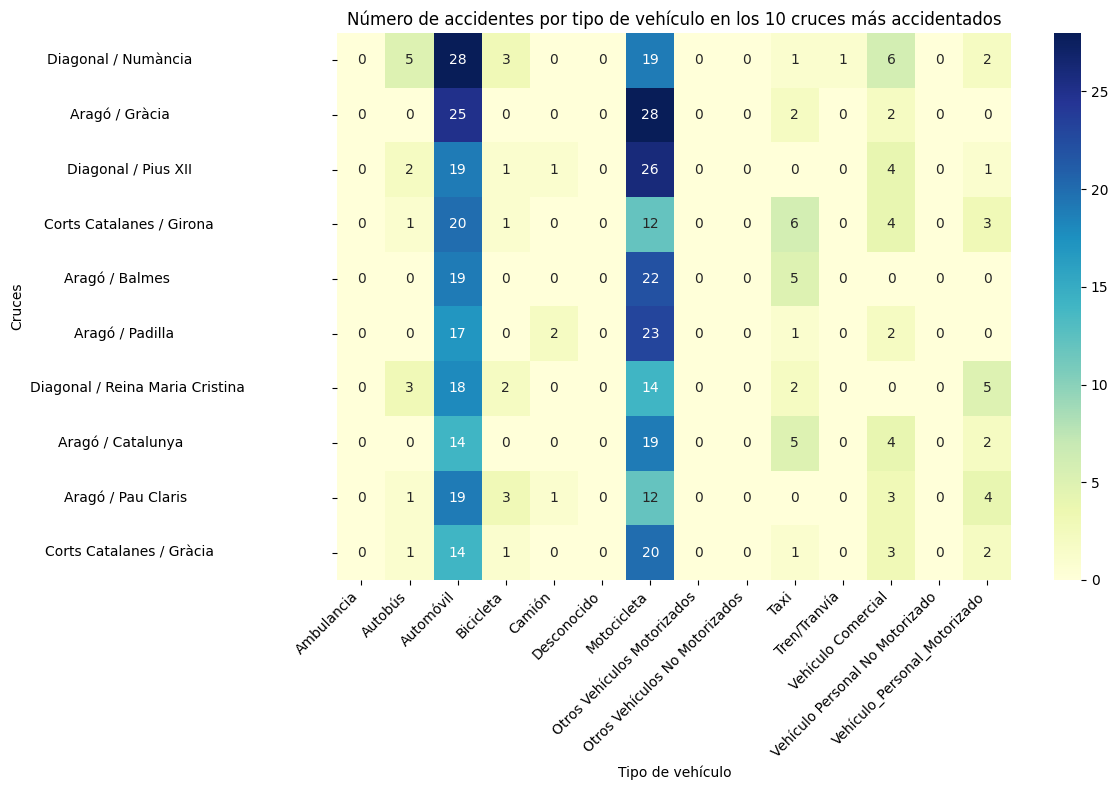

In [70]:
# Calcular el total de siniestros para cada cruce
total_por_cruce = pivot_table_cruces[['Total']].reset_index()

# Ordenar por el total de siniestros
top10_cruces_accidentados = total_por_cruce.nlargest(10, 'Total')

# sacamos para el top 10 de cruces con mas siniestros, el conteo de accidentes por tipo de vehiculo
cruces = top10_cruces_accidentados['Nom_carrer']
tipos_vehiculos = pivot_table_cruces.columns[:-1]

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_cruces.loc[cruces, tipos_vehiculos], annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Tipo de vehículo')
plt.ylabel('Cruces')
plt.title('Número de accidentes por tipo de vehículo en los 10 cruces más accidentados')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

In [71]:
#lo vemos de manera tabular

total_por_cruce = pivot_table_cruces[['Total']].reset_index()
top10_cruces_accidentados = total_por_cruce.nlargest(10, 'Total')

print("Top 10 de cruces con más accidentados en total:")
print(tabulate(top10_cruces_accidentados, headers='keys', tablefmt='pretty'))
print()


top10_cruces_vehiculos = pivot_table_cruces.loc[top10_cruces_accidentados['Nom_carrer']]
print("Tabla de los 10 cruces más accidentados:")
print(tabulate(top10_cruces_vehiculos, headers='keys', tablefmt='pretty'))


Top 10 de cruces con más accidentados en total:
+---+---------------------------------+-------+
|   |           Nom_carrer            | Total |
+---+---------------------------------+-------+
| 0 |       Diagonal / Numància       |  65   |
| 1 |         Aragó / Gràcia          |  57   |
| 2 |       Diagonal / Pius XII       |  54   |
| 3 |    Corts Catalanes / Girona     |  47   |
| 4 |         Aragó / Balmes          |  46   |
| 5 |         Aragó / Padilla         |  45   |
| 6 | Diagonal / Reina Maria Cristina |  44   |
| 7 |        Aragó / Catalunya        |  44   |
| 8 |       Aragó / Pau Claris        |  43   |
| 9 |    Corts Catalanes / Gràcia     |  42   |
+---+---------------------------------+-------+

Tabla de los 10 cruces más accidentados:
+---------------------------------+------------+---------+-----------+-----------+--------+-------------+-------------+-----------------------------+--------------------------------+------+--------------+--------------------+-------------

##*Motos: Evolución por localización*

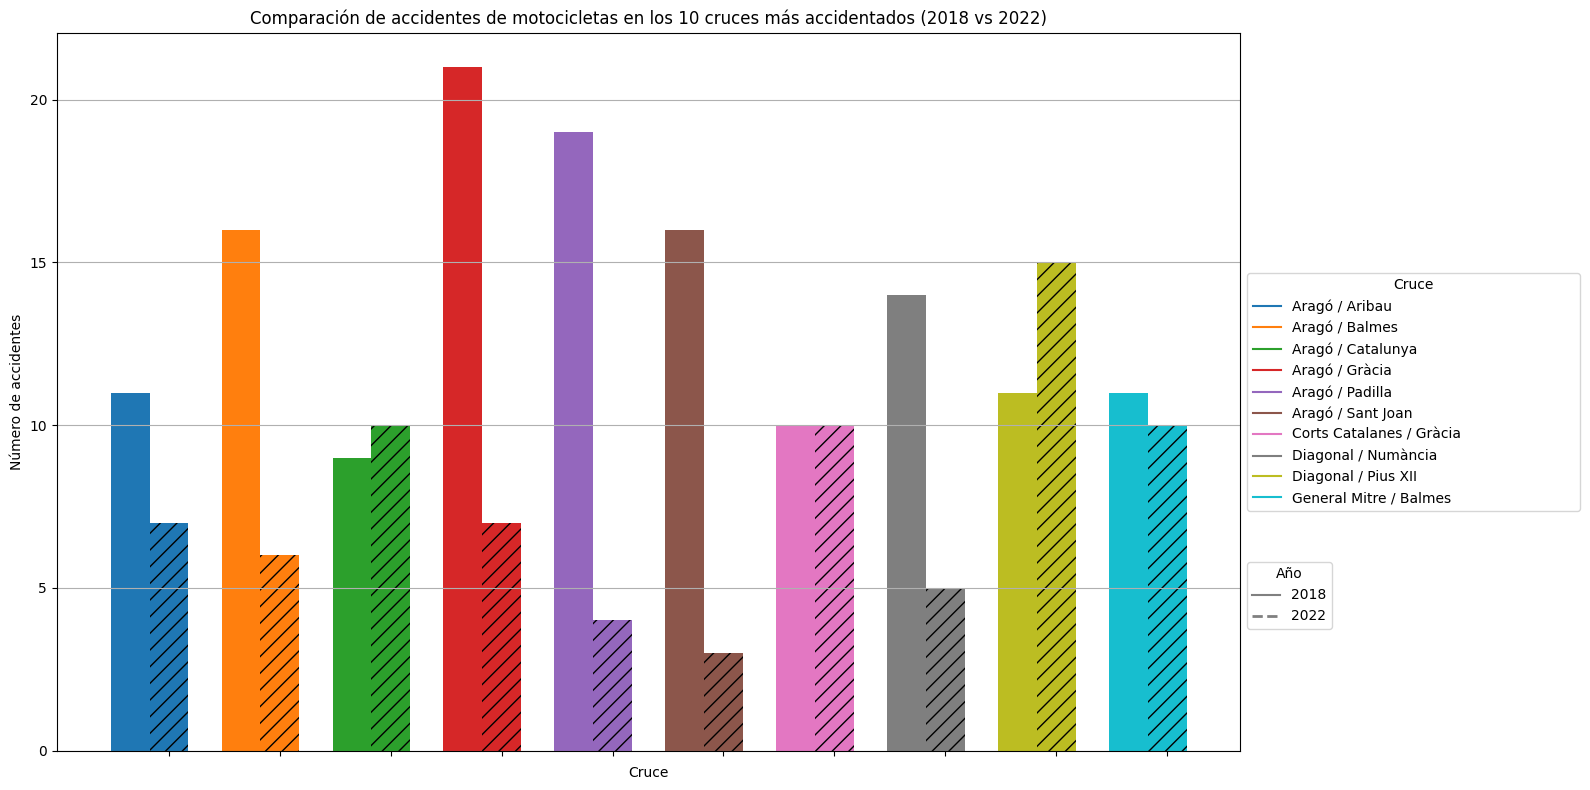

In [72]:
# Filtramos los datos para motocicletas
motorcycle_accidents = df_tipovehiculo[df_tipovehiculo['Descripcio_tipus_vehicle'].str.contains('Motocicleta', case=False, na=False)]

#Los cruces los definimos como las calles que contienen "/"
intersection_accidents = motorcycle_accidents[motorcycle_accidents['Nom_carrer'].str.contains('/', na=False)]

# obtenemoss los años disponibles en el df filtrado
available_years = intersection_accidents['Any'].unique()
available_years.sort()

top_intersections = intersection_accidents['Nom_carrer'].value_counts().head(10).index

#top 10 cruces
top_intersection_accidents = intersection_accidents[intersection_accidents['Nom_carrer'].isin(top_intersections)]

#Agrupamos por cruce y año para obtener el número de accidentes por año
intersection_accidents_per_year = top_intersection_accidents.groupby(['Nom_carrer', 'Any']).size().unstack(fill_value=0)

# Seleccionamos solo los años disponibles
selected_years = [year for year in [2018, 2022] if year in available_years]
intersection_accidents_per_year = intersection_accidents_per_year[selected_years]

colors = plt.get_cmap('tab10')

fig, ax = plt.subplots(figsize=(16, 8))
width = 0.35

#esto es para que las barras tengan colores únicos
for i, cruce in enumerate(intersection_accidents_per_year.index):
    for j, year in enumerate(selected_years):
        offset = (j - len(selected_years) / 2) * width
        ax.bar(i + offset, intersection_accidents_per_year.loc[cruce, year], width, color=colors(i), label=cruce if j == 0 else "", hatch='//' if year == 2022 else "")

plt.title('Comparación de accidentes de motocicletas en los 10 cruces más accidentados (2018 vs 2022)')
plt.xlabel('Cruce')
plt.ylabel('Número de accidentes')
plt.xticks(range(len(intersection_accidents_per_year)), [""] * len(intersection_accidents_per_year))  # Quitar etiquetas del eje X
plt.grid(axis='y')

ax.yaxis.get_major_locator().set_params(integer=True)

# leyenda para los cruces
handles_cruces = [plt.Line2D([0], [0], color=colors(i), label=cruce) for i, cruce in enumerate(intersection_accidents_per_year.index)]
leg_cruces = ax.legend(handles=handles_cruces, title='Cruce', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

#leyenda para los años
handles_anos = [plt.Line2D([0], [0], color='gray', label='2018'),
                plt.Line2D([0], [0], color='gray', label='2022', linestyle='--', linewidth=2)]
leg_anos = fig.legend(handles=handles_anos, title='Año', loc='upper right', bbox_to_anchor=(0.84, 0.3))

plt.tight_layout()
plt.show()

##*Bicicletas: Evolución por localización*

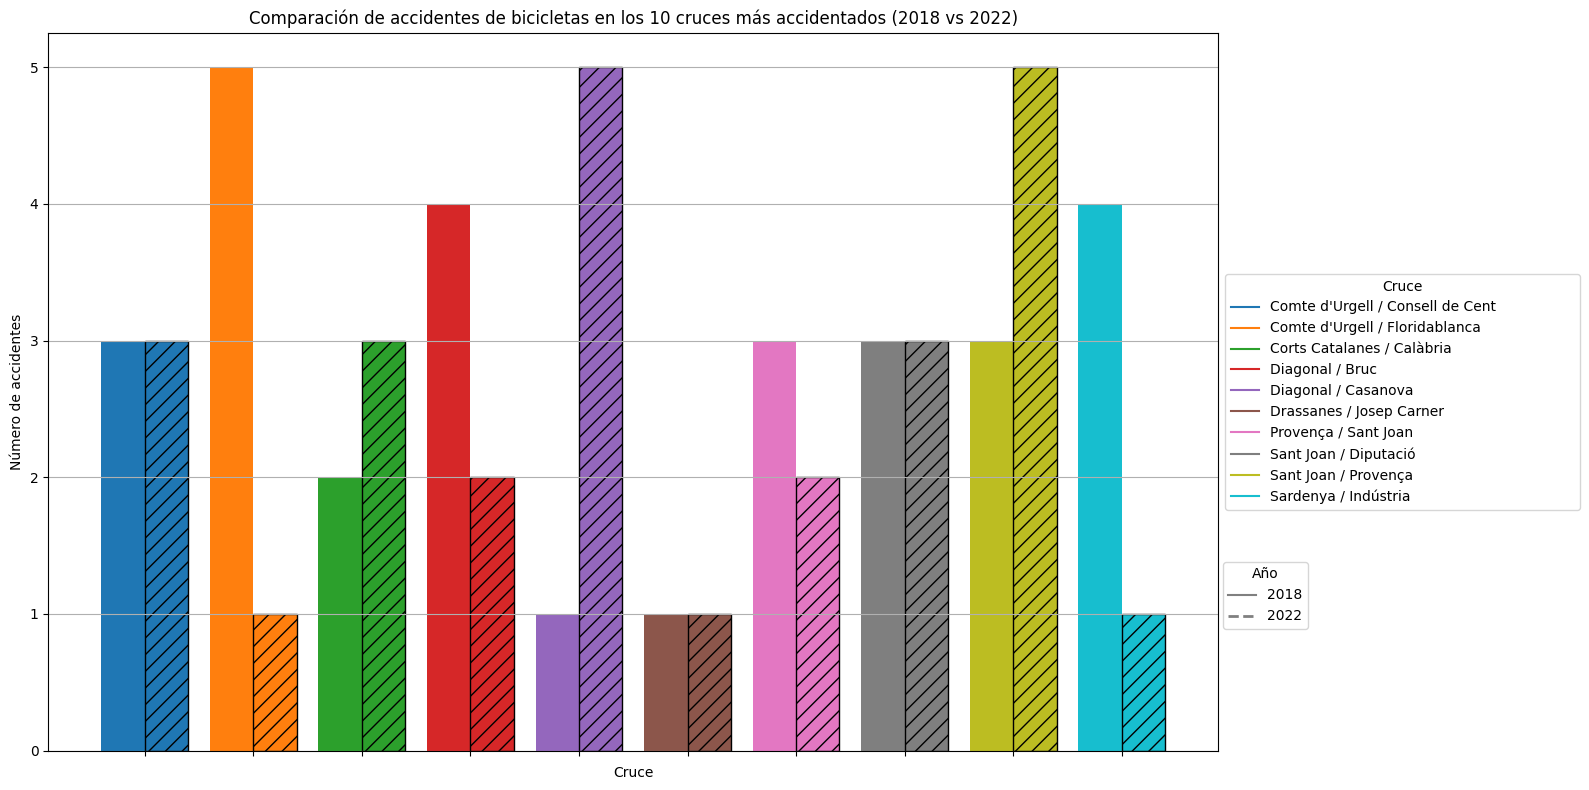

In [73]:
bicycle_accidents = df_tipovehiculo[df_tipovehiculo['Descripcio_tipus_vehicle'].str.contains('Bicicleta', case=False, na=False)]

intersection_accidents = bicycle_accidents[bicycle_accidents['Nom_carrer'].str.contains('/', na=False)]

top_intersections = intersection_accidents['Nom_carrer'].value_counts().head(10).index

top_intersection_accidents = intersection_accidents[intersection_accidents['Nom_carrer'].isin(top_intersections)]

intersection_accidents_per_year = top_intersection_accidents.groupby(['Nom_carrer', 'Any']).size().unstack(fill_value=0)

intersection_accidents_per_year = intersection_accidents_per_year.loc[:, [2018, 2022]]

colors = plt.get_cmap('tab10')

fig, ax = plt.subplots(figsize=(16, 8))
width = 0.4

for i, cruce in enumerate(intersection_accidents_per_year.index):
    ax.bar(i - width/2, intersection_accidents_per_year.loc[cruce, 2018], width, color=colors(i))
    ax.bar(i + width/2, intersection_accidents_per_year.loc[cruce, 2022], width, color=colors(i), hatch='//', edgecolor='black')

plt.title('Comparación de accidentes de bicicletas en los 10 cruces más accidentados (2018 vs 2022)')
plt.xlabel('Cruce')
plt.ylabel('Número de accidentes')
plt.xticks(range(len(intersection_accidents_per_year)), [""] * len(intersection_accidents_per_year))  # Quitar etiquetas del eje X
plt.grid(axis='y')

handles_cruces = [plt.Line2D([0], [0], color=colors(i), label=cruce) for i, cruce in enumerate(intersection_accidents_per_year.index)]
leg_cruces = ax.legend(handles=handles_cruces, title='Cruce', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

handles_anos = [plt.Line2D([0], [0], color='gray', label='2018'),
                plt.Line2D([0], [0], color='gray', label='2022', linestyle='--', linewidth=2)]
leg_anos = fig.legend(handles=handles_anos, title='Año', loc='upper right', bbox_to_anchor=(0.825, 0.3))

plt.tight_layout()
plt.show()


##*Patinetes: Evolución por localización*

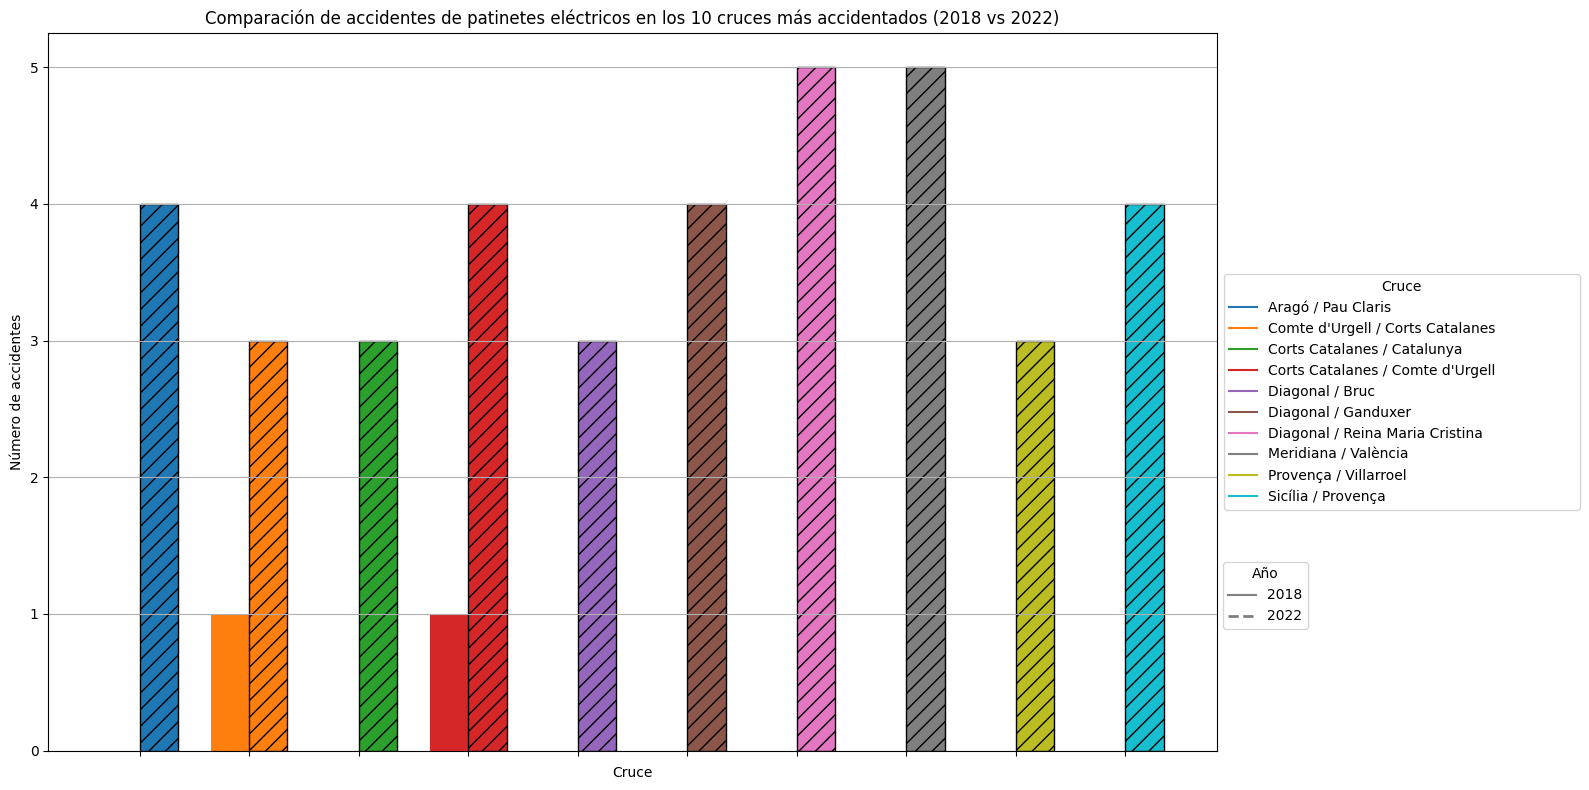

In [74]:

scooter_accidents = df_tipovehiculo[df_tipovehiculo['Descripcio_tipus_vehicle'].str.contains('Vehículo_Personal_Motorizado', case=False, na=False)]

intersection_accidents = scooter_accidents[scooter_accidents['Nom_carrer'].str.contains('/', na=False)]

top_intersections = intersection_accidents['Nom_carrer'].value_counts().head(10).index

top_intersection_accidents = intersection_accidents[intersection_accidents['Nom_carrer'].isin(top_intersections)]

intersection_accidents_per_year = top_intersection_accidents.groupby(['Nom_carrer', 'Any']).size().unstack(fill_value=0)
available_years = [2018, 2022]
intersection_accidents_per_year = intersection_accidents_per_year[available_years]

colors = plt.get_cmap('tab10')


fig, ax = plt.subplots(figsize=(16, 8))
width = 0.35

for i, cruce in enumerate(intersection_accidents_per_year.index):
    ax.bar(i - width/2, intersection_accidents_per_year.loc[cruce, 2018], width, color=colors(i), label=cruce if i == 0 else "")
    ax.bar(i + width/2, intersection_accidents_per_year.loc[cruce, 2022], width, color=colors(i), hatch='//', edgecolor='black')

plt.title('Comparación de accidentes de patinetes eléctricos en los 10 cruces más accidentados (2018 vs 2022)')
plt.xlabel('Cruce')
plt.ylabel('Número de accidentes')
plt.xticks(range(len(intersection_accidents_per_year)), [""] * len(intersection_accidents_per_year))  # Quitar etiquetas del eje X
plt.grid(axis='y')

handles_cruces = [plt.Line2D([0], [0], color=colors(i), label=cruce) for i, cruce in enumerate(intersection_accidents_per_year.index)]
leg_cruces = ax.legend(handles=handles_cruces, title='Cruce', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

handles_anos = [plt.Line2D([0], [0], color='gray', label='2018'),
                plt.Line2D([0], [0], color='gray', label='2022', linestyle='--', linewidth=2)]
leg_anos = fig.legend(handles=handles_anos, title='Año', loc='upper right', bbox_to_anchor=(0.825, 0.3))

plt.tight_layout()
plt.show()
